english version: https://bit.ly/2yWgCE7 

Dataset  disponibilizado por: [CSSEGISandData](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series)




---


**OBS**: Novos algoritmos de previsoes estao sendo constantemente testados


---



---
obs: a previsão da taxa de mortalidade para alguns paises apresentam inconscistencias, por isso nao foi apresentada no grafico



In [167]:
import datetime
# ULTIMA EXECUCAO:
print(f'ultima execucao: {datetime.datetime.now().strftime("%d/%m/%Y %H:%M:%S")}')


ultima execucao: 09/05/2020 05:40:45


# Changelog

controle de versões pelo GIT, clicar no numero da versao levara ao repositorio correspondente a ela

---


v1.0 

*   Versão inicial



[v1.0.1](https://github.com/Luscahm/covid_prediction/tree/V1.0.1)


*   Correção de bugs   

[v1.1](https://github.com/Luscahm/covid_prediction/tree/v1.1.x) 
*   Melhora na previsão de casos e mortes no Brasil
*   Textos traduzidos para o ingles(link acima)
*   Imports desnecessarios foram excluidos
*   Correção de bugs

[v2.0](https://github.com/Luscahm/covid_prediction/tree/v2.0.x)
*   Melhora em alguns graficos
*   Novos Graficos
*   Melhora nas tabelas de apresentação de resultado
*   Melhora na previsão de casos e mortes nos EUA
*   Adicionada seção "Sobre Mim"

[v3.0](https://github.com/Luscahm/covid_prediction/tree/v3.0.x)

* Melhoras em alguns graficos
* Visualizações do tipo "Bar Chart race"
* grafico em escala log para evolução de mortes e casos
* grafico de mortalidade 
* grafico de novos casos por dia
* grafico de novas mortes por dia 
* Troca do algoritmo de previsão para morte e casos em todos os paises
* Mais graficos
* Adicionado Introdução
* Correção de bugs


# Introdução

No inicio do mês de março o Brasil registrou seu primeiro caso de covid-19, o que muitos acharam ser apenas uma doença asiatica, finalmente chegou em meu territorio, e de la até hoje, a situação no Brasil só vem piorando, com recordes e recordes de mortes e casos.

Logo no inicio da pandemia no Brasil, universidades pararam, e venho a incerteza que paira no ar até hoje "com o que estamos lhe dando e até onde pode chegar?" é com essa duvida em mente, que resolvi analisar os dados disponiveis não só para o Brasil, mas também paises que sofreram muito com o virus e que eu julguei parecido com o Brasil, por isso aqui iremos analizar e comparar Brasil,EUA,Italia e Suecia,e apos essa pequena analise tentar prever os proximos numeros da doença para esses 4 paises, e comparar eles, para assim, tentar ao menos dar uma clareada na duvida que ja esta a meses pairando no ar.


---


Disclaimer/Aviso Legal: Essas informações devem servir aos interessados como uma primeira orientação. As informações gerais aqui contidas, no entanto, não fornecem qualquer garantia. Desse modo, está excluída a garantia ou responsabilidade de qualquer tipo, por exemplo, de precisão, confiabilidade, completude e atualidade das informaçõs


---



---




In [3]:
import numpy as np
import pandas as pd
import itertools    
import IPython

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib
import bokeh 
from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file
from bokeh.layouts import row, column
from bokeh.resources import INLINE
from bokeh.io import output_notebook
from bokeh.models import Span
from bokeh.io import output_notebook


plt.style.use('seaborn-darkgrid')
output_notebook(resources=INLINE)

Loading BokehJS ...

# Leitura de Dados

---



Nessa parte serão realizados os seguintes passos:


*   Transformar os csv disponivel no Git em um dataframe do pandas
*   Separar em  4 dataframes diferentes: 
      1.   Brasil
      2.   Estados Unidos
      3.   Suécia
      4.   Itália


*   Remover partes do dataframe que não serão usadas
*   iremos utilizar 3 dataframe para cada país: Confirmados, Mortes e Recuperados








In [0]:
url_confirmados = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
url_mortes = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
url_recuperados = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv"
df_confirmados = pd.read_csv(url_confirmados)
df_mortes = pd.read_csv(url_mortes)
df_recuperados = pd.read_csv(url_recuperados)

In [5]:
df_confirmados.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  1/24/20  \
0            NaN    Afghanistan  33.0000  65.0000        0        0        0   
1            NaN        Albania  41.1533  20.1683        0        0        0   
2            NaN        Algeria  28.0339   1.6596        0        0        0   
3            NaN        Andorra  42.5063   1.5218        0        0        0   
4            NaN         Angola -11.2027  17.8739        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  4/29/20  4/30/20  5/1/20  5/2/20  5/3/20  \
0        0        0        0  ...     1939     2171    2335    2469    2704   
1        0        0        0  ...      766      773     782     789     795   
2        0        0        0  ...     3848     4006    4154    4295    4474   
3        0        0        0  ...      743      745     745     747     748   
4        0        0        0  ...       27       27      30      35      35   

   5/4/20  5/5/20  5/6/20  5/7/20  5/8/20  
0    2894    3224    3392    3563    3778  
1     803     820     832     842     850  
2    4648    4838    4997    5182    5369  
3     750     751     751     752     752  
4      35      36      36      36      43  

[5 rows x 112 columns]

In [0]:
# Separing in locals dataframes

df_confirmados_brasil = df_confirmados.loc[df_confirmados['Country/Region'] == 'Brazil'].copy()
df_confirmados_italia = df_confirmados.loc[df_confirmados['Country/Region'] == 'Italy'].copy()
df_confirmados_eua = df_confirmados.loc[df_confirmados['Country/Region'] == 'US'].copy()
df_confirmados_suecia = df_confirmados.loc[df_confirmados['Country/Region'] == 'Sweden'].copy()
#-----------------------------------------------------------------------------------------------
df_mortes_brasil = df_mortes.loc[df_mortes['Country/Region'] == 'Brazil'].copy()
df_mortes_italia = df_mortes.loc[df_mortes['Country/Region'] == 'Italy'].copy()
df_mortes_eua = df_mortes.loc[df_mortes['Country/Region'] == 'US'].copy()
df_mortes_suecia = df_mortes.loc[df_mortes['Country/Region'] == 'Sweden'].copy()
#-----------------------------------------------------------------------------------------------
df_recuperados_brasil = df_recuperados.loc[df_recuperados['Country/Region'] == 'Brazil'].copy()
df_recuperados_italia = df_recuperados.loc[df_recuperados['Country/Region'] == 'Italy'].copy()
df_recuperados_eua = df_recuperados.loc[df_recuperados['Country/Region'] == 'US'].copy()
df_recuperados_suecia = df_recuperados.loc[df_recuperados['Country/Region'] == 'Sweden'].copy()

In [7]:
df_confirmados_brasil.head()

Province/State Country/Region     Lat     Long  1/22/20  1/23/20  1/24/20  \
28            NaN         Brazil -14.235 -51.9253        0        0        0   

    1/25/20  1/26/20  1/27/20  ...  4/29/20  4/30/20  5/1/20  5/2/20  5/3/20  \
28        0        0        0  ...    79685    87187   92202   97100  101826   

    5/4/20  5/5/20  5/6/20  5/7/20  5/8/20  
28  108620  115455  126611  135773  146894  

[1 rows x 112 columns]

In [8]:
df_confirmados_italia.head()

Province/State Country/Region   Lat  Long  1/22/20  1/23/20  1/24/20  \
137            NaN          Italy  43.0  12.0        0        0        0   

     1/25/20  1/26/20  1/27/20  ...  4/29/20  4/30/20  5/1/20  5/2/20  5/3/20  \
137        0        0        0  ...   203591   205463  207428  209328  210717   

     5/4/20  5/5/20  5/6/20  5/7/20  5/8/20  
137  211938  213013  214457  215858  217185  

[1 rows x 112 columns]

In [9]:
df_confirmados_eua.head()

Province/State Country/Region      Lat     Long  1/22/20  1/23/20  \
225            NaN             US  37.0902 -95.7129        1        1   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  4/29/20  4/30/20   5/1/20  \
225        2        2        5        5  ...  1039909  1069424  1103461   

      5/2/20   5/3/20   5/4/20   5/5/20   5/6/20   5/7/20   5/8/20  
225  1132539  1158040  1180375  1204351  1228603  1257023  1283929  

[1 rows x 112 columns]

In [10]:
df_confirmados_suecia.head()

Province/State Country/Region   Lat  Long  1/22/20  1/23/20  1/24/20  \
205            NaN         Sweden  63.0  16.0        0        0        0   

     1/25/20  1/26/20  1/27/20  ...  4/29/20  4/30/20  5/1/20  5/2/20  5/3/20  \
205        0        0        0  ...    20302    21092   21520   22082   22317   

     5/4/20  5/5/20  5/6/20  5/7/20  5/8/20  
205   22721   23216   23918   24623   25265  

[1 rows x 112 columns]

In [0]:
# Fazendo com que todos os df comecem apenas 1 dia antes do 1º casi de covid 
df_confirmados_brasil = df_confirmados_brasil.iloc[:,39:]
df_confirmados_eua = df_confirmados_eua.iloc[:,4:]
df_confirmados_italia = df_confirmados_italia.iloc[:,12:]
df_confirmados_suecia = df_confirmados_suecia.iloc[:,13:]
# -------------------------------------------------------------
df_mortes_brasil = df_mortes_brasil.iloc[:,39:]
df_mortes_eua = df_mortes_eua.iloc[:,4:]
df_mortes_italia = df_mortes_italia.iloc[:,12:]
df_mortes_suecia = df_mortes_suecia.iloc[:,13:]
# -------------------------------------------------------------
df_recuperados_brasil = df_recuperados_brasil.iloc[:,39:]
df_recuperados_eua = df_recuperados_eua.iloc[:,4:]
df_recuperados_italia = df_recuperados_italia.iloc[:,12:]
df_recuperados_suecia = df_recuperados_suecia.iloc[:,13:]

# Tratando os dados



Tendo em vista que o algoritmo de aprendizado de maquina não aceita datas no formato MM/DD/AA, nos iremos realizar alguns tratamentos nesses dataframes para conseguir o que queremos, realizaremos os seguinte passos:


*   Extrairemos os index das colunas
*   Extrairemos os numeros de casos de cada país
*   transformaremos as datas em dias corridos, 1º dia do covid = 0, segundo = 1,etc..
*   Escolheremos em quantos dias corridos no futuro queremos fazer a predição
*   transformaremos os dias corridos em datas mm/dd/yy
*   Transpor todos os dataframes









In [0]:
# pegando o indice das colunas:
index_brasil = list(df_confirmados_brasil.columns.values) 
index_italia = list(df_confirmados_italia.columns.values) 
index_eua = list(df_confirmados_eua.columns.values) 
index_suecia = list(df_confirmados_suecia.columns.values) 

In [0]:
# pegando os valores de todos df do brasil para auxiliar em construções de graficos:
casos_brasil = []
mortes_brasil = []
recuperados_brasil = []
for i in index_brasil:
    confirmados_brasil = df_confirmados_brasil[i].sum()
    casos_brasil.append(confirmados_brasil)
    
    mortos_brasil = df_mortes_brasil[i].sum()
    mortes_brasil.append(mortos_brasil)
    
    recupera_brasil = df_recuperados_brasil[i].sum()
    recuperados_brasil.append(recupera_brasil)

In [0]:
# realizando o mesmo processo anterior para o eua
casos_eua = []
mortes_eua = []
recuperados_eua = []

for i in index_eua:
    confirmados_eua = df_confirmados_eua[i].sum()
    casos_eua.append(confirmados_eua)
    
    mortos_eua = df_mortes_eua[i].sum()
    mortes_eua.append(mortos_eua)

    recupera_eua = df_recuperados_eua[i].sum()
    recuperados_eua.append(recupera_eua)


In [0]:
# realizando o mesmo processo anterior para a italia
casos_italia = []
mortes_italia = []
recuperados_italia = []

for i in index_italia:

    confirmados_italia = df_confirmados_italia[i].sum()
    casos_italia.append(confirmados_italia)
    
    mortos_italia = df_mortes_italia[i].sum()
    mortes_italia.append(mortos_italia)
    
    recupera_italia = df_recuperados_italia[i].sum()
    recuperados_italia.append(recupera_italia)
   
    
    

In [0]:
# realizando o mesmo processo anterior para a suecia
casos_suecia  = []
mortes_suecia  = []
recuperados_suecia  = []
for i in index_suecia:
    confirmados_suecia = df_confirmados_suecia[i].sum()
    casos_suecia.append(confirmados_suecia)
    
    mortos_suecia = df_mortes_suecia[i].sum()
    mortes_suecia.append(mortos_suecia)

    recupera_suecia = df_recuperados_suecia[i].sum()
    recuperados_suecia.append(recupera_suecia)

In [0]:
# transformando as datas em um numpy array de dias corridos:
dias_brasil = np.array([i for i in range(len(index_brasil))]).reshape(-1, 1)
dias_eua = np.array([i for i in range(len(index_eua))]).reshape(-1, 1)
dias_italia = np.array([i for i in range(len(index_italia))]).reshape(-1, 1)
dias_suecia = np.array([i for i in range(len(index_suecia))]).reshape(-1, 1)

In [0]:
futuro = 60 # essa variavel define quantos dias para frente a partir de hoje queremos prever.
# fazendo  datas futuras em numpy array de dias corridos 
futuro_brasil = np.array([i for i in range(len(index_brasil) + futuro)]).reshape(-1, 1)
futuro_eua = np.array([i for i in range(len(index_eua) + futuro)]).reshape(-1, 1)
futuro_italia = np.array([i for i in range(len(index_italia) + futuro)]).reshape(-1, 1)
futuro_suecia = np.array([i for i in range(len(index_suecia) + futuro)]).reshape(-1, 1)

In [0]:
# transformando datas futuras corridas em datas de formato mm/dd/yy
start_br = '2/26/20'
start_br = datetime.datetime.strptime(start_br,"%m/%d/%y")
datas_futuras_br = []
for i in range(len(futuro_brasil)):
    datas_futuras_br.append((start_br + datetime.timedelta(days=i)).strftime('%m/%d/%y'))
#---------------------------------------------------------------------------------------------------
start_us = '1/22/20'
start_us = datetime.datetime.strptime(start_us,"%m/%d/%y")
datas_futuras_us = []
for i in range(len(futuro_eua)):
    datas_futuras_us.append((start_us + datetime.timedelta(days=i)).strftime('%m/%d/%y'))
#---------------------------------------------------------------------------------------------------
start_it = '1/30/20'
start_it = datetime.datetime.strptime(start_it,"%m/%d/%y")
datas_futuras_it = []
for i in range(len(futuro_italia)):
    datas_futuras_it.append((start_it + datetime.timedelta(days=i)).strftime('%m/%d/%y'))
#---------------------------------------------------------------------------------------------------
start_su = '1/31/20'
start_su = datetime.datetime.strptime(start_su,"%m/%d/%y")
datas_futuras_su = []
for i in range(len(futuro_suecia)):
    datas_futuras_su.append((start_su + datetime.timedelta(days=i)).strftime('%m/%d/%y'))

In [0]:
# transpondo todos os dataframes
df_confirmados_brasil = df_confirmados_brasil.T
df_confirmados_brasil['dates'] = index_brasil

df_mortes_brasil = df_mortes_brasil.T
df_mortes_brasil['dates'] = index_brasil

df_recuperados_brasil = df_recuperados_brasil.T
df_recuperados_brasil['dates'] = index_brasil

new_index_br = [x for x in range(len(index_brasil))]
#----------------------------------------------------
df_confirmados_eua = df_confirmados_eua.T
df_confirmados_eua['dates'] = index_eua

df_mortes_eua = df_mortes_eua.T
df_mortes_eua['dates'] = index_eua

df_recuperados_eua = df_recuperados_eua.T
df_recuperados_eua['dates'] = index_eua

new_index_eua = [x for x in range(len(index_eua))]
#----------------------------------------------------
df_confirmados_italia = df_confirmados_italia.T
df_confirmados_italia['dates'] = index_italia

df_mortes_italia = df_mortes_italia.T
df_mortes_italia['dates'] = index_italia

df_recuperados_italia = df_recuperados_italia.T
df_recuperados_italia['dates'] = index_italia

new_index_it = [x for x in range(len(index_italia))]
#----------------------------------------------------
df_confirmados_suecia = df_confirmados_suecia.T
df_confirmados_suecia['dates'] = index_suecia

df_mortes_suecia = df_mortes_suecia.T
df_mortes_suecia['dates'] = index_suecia

df_recuperados_suecia = df_recuperados_suecia.T
df_recuperados_suecia['dates'] = index_suecia
new_index_su = [x for x in range(len(index_suecia))]


In [21]:
df_confirmados_brasil.head()


28    dates
2/26/20   1  2/26/20
2/27/20   1  2/27/20
2/28/20   1  2/28/20
2/29/20   2  2/29/20
3/1/20    2   3/1/20

In [0]:
# como vimos os index estão errados, iremos arrumar-los agora.
df_confirmados_brasil['index'] = new_index_br
df_confirmados_brasil = df_confirmados_brasil.set_index('index')
df_confirmados_brasil.rename(columns={28:'cases',
                   'dates':'dates'}, 
                 inplace=True)
df_confirmados_brasil.index.name = None
df_confirmados_brasil['dates'] = dias_brasil

df_mortes_brasil['index'] = new_index_br
df_mortes_brasil = df_mortes_brasil.set_index('index')
df_mortes_brasil.rename(columns={28:'deaths',
                   'dates':'dates'}, 
                 inplace=True)
df_mortes_brasil.index.name = None
df_mortes_brasil['dates'] = dias_brasil

df_recuperados_brasil['index'] = new_index_br
df_recuperados_brasil = df_recuperados_brasil.set_index('index')
df_recuperados_brasil.rename(columns={29:'recovery',
                   'dates':'dates'}, 
                 inplace=True)
df_recuperados_brasil.index.name = None
df_recuperados_brasil['dates'] = dias_brasil

#------------------------------------------------
df_confirmados_eua['index'] = new_index_eua
df_confirmados_eua = df_confirmados_eua.set_index('index')
df_confirmados_eua.rename(columns={225:'cases',
                   'dates':'dates'}, 
                 inplace=True)
df_confirmados_eua.index.name = None
df_confirmados_eua['dates'] = dias_eua

df_mortes_eua['index'] = new_index_eua
df_mortes_eua = df_mortes_eua.set_index('index')
df_mortes_eua.rename(columns={225:'deaths',
                   'dates':'dates'}, 
                 inplace=True)
df_mortes_eua.index.name = None
df_mortes_eua['dates'] = dias_eua

df_recuperados_eua['index'] = new_index_eua
df_recuperados_eua = df_recuperados_eua.set_index('index')
df_recuperados_eua.rename(columns={225:'recovery',
                   'dates':'dates'}, 
                 inplace=True)
df_recuperados_eua.index.name = None
df_recuperados_eua['dates'] = dias_eua
#------------------------------------------------
df_confirmados_italia['index'] = new_index_it
df_confirmados_italia = df_confirmados_italia.set_index('index')
df_confirmados_italia.rename(columns={137:'cases',
                   'dates':'dates'}, 
                 inplace=True)
df_confirmados_italia.index.name = None
df_confirmados_italia['dates'] = dias_italia

df_mortes_italia['index'] = new_index_it
df_mortes_italia = df_mortes_italia.set_index('index')
df_mortes_italia.rename(columns={137:'deaths',
                   'dates':'dates'}, 
                 inplace=True)
df_mortes_italia.index.name = None
df_mortes_italia['dates'] = dias_italia

df_recuperados_italia['index'] = new_index_it
df_recuperados_italia = df_recuperados_italia.set_index('index')
df_recuperados_italia.rename(columns={131:'recovery',
                   'dates':'dates'}, 
                 inplace=True)
df_recuperados_italia.index.name = None
df_recuperados_italia['dates'] = dias_italia
#------------------------------------------------
df_confirmados_suecia['index'] = new_index_su
df_confirmados_suecia = df_confirmados_suecia.set_index('index')
df_confirmados_suecia.rename(columns={205:'cases',
                   'dates':'dates'}, 
                 inplace=True)
df_confirmados_suecia.index.name = None
df_confirmados_suecia['dates'] = dias_suecia

df_mortes_suecia['index'] = new_index_su
df_mortes_suecia = df_mortes_suecia.set_index('index')
df_mortes_suecia.rename(columns={205:'deaths',
                   'dates':'dates'}, 
                 inplace=True)
df_mortes_suecia.index.name = None
df_mortes_suecia['dates'] = dias_suecia

df_recuperados_suecia['index'] = new_index_su
df_recuperados_suecia = df_recuperados_suecia.set_index('index')
df_recuperados_suecia.rename(columns={203:'recovery',
                   'dates':'dates'}, 
                 inplace=True)
df_recuperados_suecia.index.name = None
df_recuperados_suecia['dates'] = dias_suecia

abaixo, visualizaremos os dataframes transposto

In [23]:
df_confirmados_brasil.head()

cases  dates
0      1      0
1      1      1
2      1      2
3      2      3
4      2      4

In [24]:
df_mortes_eua.head()

deaths  dates
0       0      0
1       0      1
2       0      2
3       0      3
4       0      4

In [25]:
df_recuperados_suecia.head()

recovery  dates
0         0      0
1         0      1
2         0      2
3         0      3
4         0      4

In [26]:
df_mortes_italia.head()

deaths  dates
0       0      0
1       0      1
2       0      2
3       0      3
4       0      4

a parte de separar target de dados, e de separar em train e test será feita na secao de predicao



# Apresentação de Graficos

Nessa seção apenas sera apresentados alguns graficos que nos ajudara a entender como anda a situacao do covid-19 nos 4 paises selecionados

## Casos

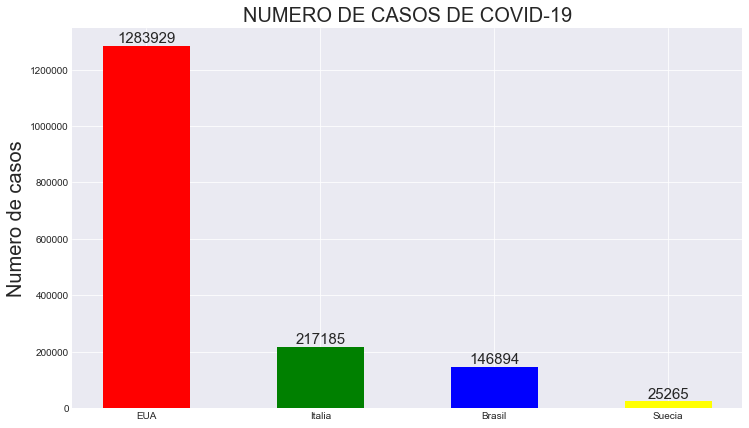

In [27]:

fig = plt.figure(figsize=(12, 7))
paises = ['EUA', 'Italia', 'Brasil', 'Suecia']
numeros = [confirmados_eua,confirmados_italia,confirmados_brasil,confirmados_suecia]
rects = plt.bar(paises,numeros, align='center', color=['red', 'green', 'blue', 'yellow'], width=0.5)

ax = rects.patches
for rect, label in zip(ax, numeros):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom', fontsize=15)
    
plt.ylabel('Numero de casos', size = 20)
plt.title('NUMERO DE CASOS DE COVID-19', size=20)
plt.show()

In [28]:
print('comparação casos nos 4 paises')
IPython.display.HTML('<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/2200988" data-url="https://flo.uri.sh/visualisation/2200988/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>')

comparação casos nos 4 paises


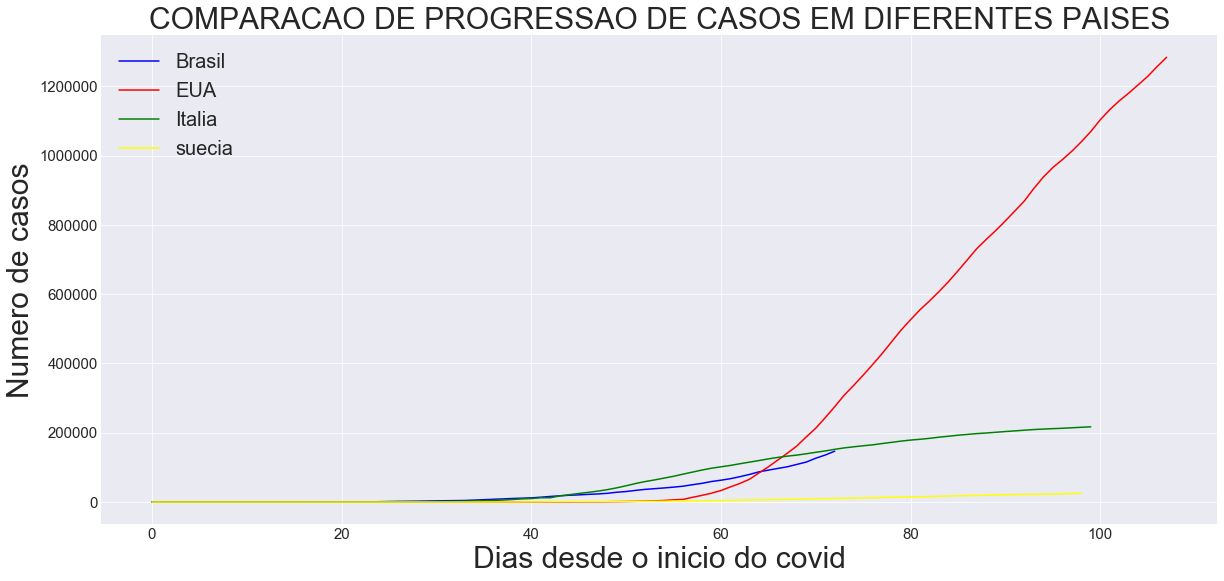

In [29]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, casos_brasil, color='blue')
plt.plot(dias_eua, casos_eua, color='red')
plt.plot(dias_italia, casos_italia, color='green')
plt.plot(dias_suecia, casos_suecia, color='yellow')
plt.title('COMPARACAO DE PROGRESSAO DE CASOS EM DIFERENTES PAISES', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['Brasil', 'EUA','Italia', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


A suecia parece quase que uma linha reta ao se comparar com EUA e italia, a frente iremos ver em log e  comparar esses paises 2 a 2

In [0]:
conf_eua1, conf_eua2 = itertools.tee(iter(list(casos_eua)))
next(conf_eua2)
conf_it1, conf_it2 = itertools.tee(iter(list(casos_italia)))
next(conf_it2)
conf_br1, conf_br2 = itertools.tee(iter(list(casos_brasil)))
next(conf_br2)
conf_su1, conf_su2 = itertools.tee(iter(list(casos_suecia)))
next(conf_su2)

diferenca_eua =[int(r) - int(p) for p,r in zip(conf_eua1, conf_eua2)]
diferenca_italia =[int(r) - int(p) for p,r in zip(conf_it1, conf_it2)]
diferenca_brasil =[int(r) - int(p) for p,r in zip(conf_br1, conf_br2)]
diferenca_suecia =[int(r) - int(p) for p,r in zip(conf_su1, conf_su2)]



antes_30_eua = []
for index,conteudo in enumerate(diferenca_eua):
    if conteudo >= 30:
        antes_30_eua.append(index)
eua_day = [i for i in range(len(antes_30_eua))]

antes_30_br = []
for index,conteudo in enumerate(diferenca_brasil):
    if conteudo >= 30:
        antes_30_br.append(index)
br_day = [i for i in range(len(antes_30_br))]

antes_30_su = []
for index,conteudo in enumerate(diferenca_suecia):
    if conteudo >= 30:
        antes_30_su.append(index)
su_day = [i for i in range(len(antes_30_su))]

antes_30_it = []
for index,conteudo in enumerate(diferenca_italia):
    if conteudo >= 30:
        antes_30_it.append(index)
it_day = [i for i in range(len(antes_30_it))]


In [31]:
p1 = figure(plot_width=800, plot_height=550, title="Tragetoria do covid-19 logaritmica",
             x_range=(0, 100), y_axis_type="log")
p1.grid.grid_line_alpha=1
p1.ygrid.band_fill_color = "#4682B4"
p1.ygrid.band_fill_alpha = 0.1
p1.xaxis.axis_label = 'Dias apos ter aumento de 30 casos diarios'
p1.yaxis.axis_label = 'Progressao casos(escala logaritmica)'
p1.xaxis.minor_tick_line_width = 0


p1.line(br_day, casos_brasil[18:], color='#3E4CC3', 
        legend_label='Brasil', line_width=1)
p1.circle(br_day[-1], casos_brasil[-1], fill_color="white", size=5)

p1.line(eua_day, casos_eua[41:], color='#F54138', 
        legend_label='Estados Unidos', line_width=1)
p1.circle(eua_day[-1], casos_eua[-1], fill_color="white", size=5)

p1.line(su_day, casos_suecia[35:], color='#DBAE23', 
        legend_label='Suecia', line_width=1)
p1.circle(su_day[-1], casos_suecia[-1], fill_color="white", size=5)


p1.line(it_day, casos_italia[24:], color='#3EC358', 
        legend_label='Italia', line_width=1)
p1.circle(it_day[-1], casos_italia[-1], fill_color="white", size=5)


p1.legend.location = "bottom_right"
output_notebook()
show(p1)



Loading BokehJS ...

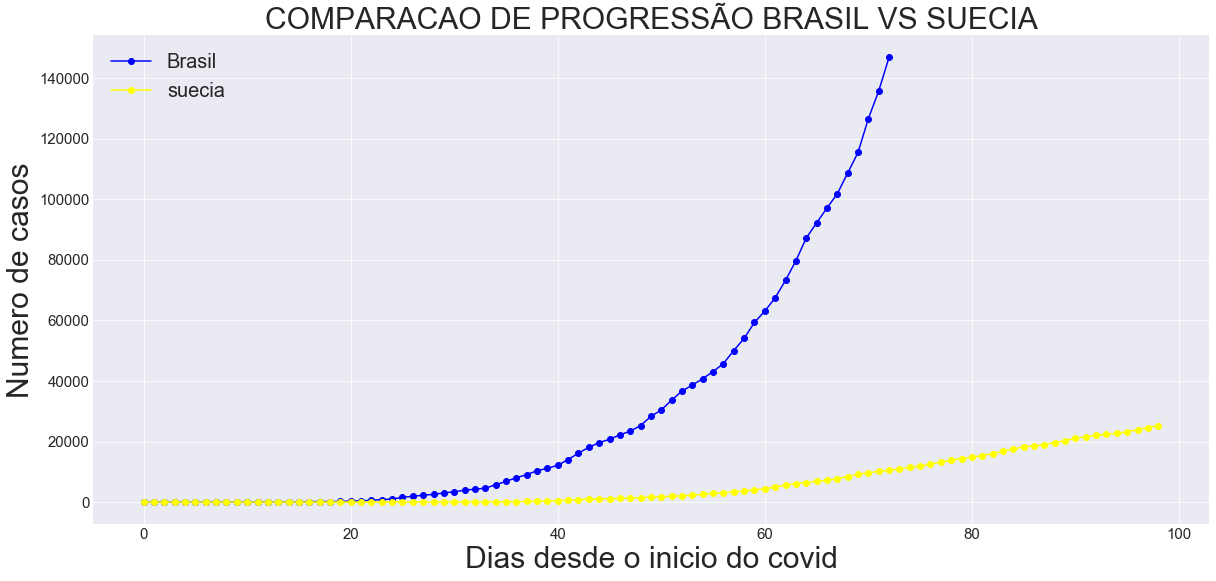

In [32]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, casos_brasil, marker='o', color='blue')
plt.plot(dias_suecia, casos_suecia, marker='o', color='yellow')


plt.title('COMPARACAO DE PROGRESSÃO BRASIL VS SUECIA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['Brasil', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


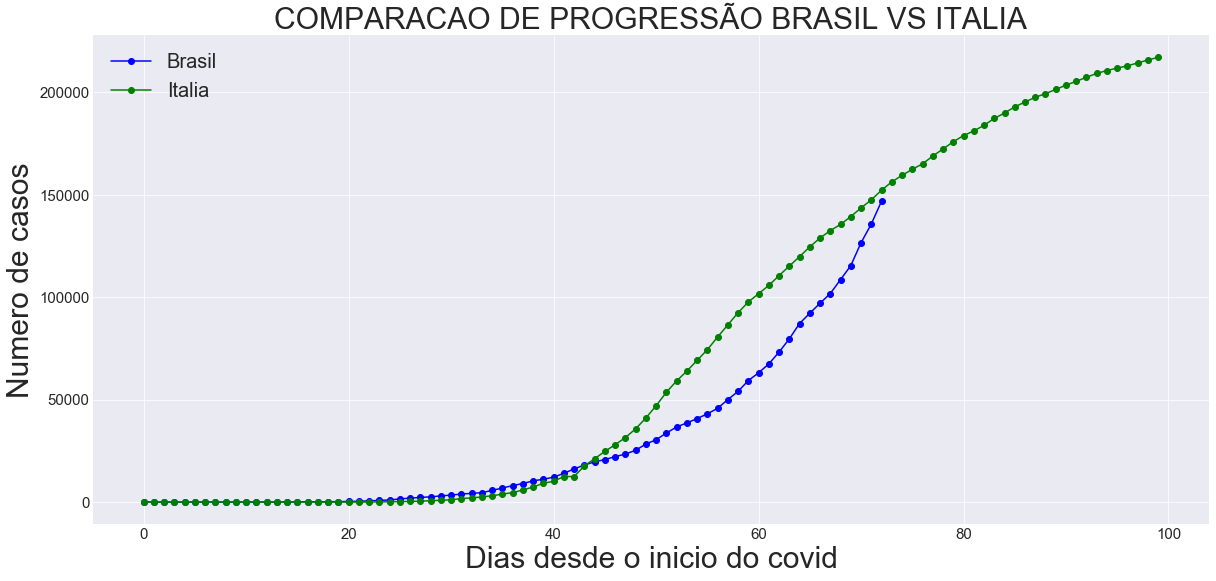

In [33]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, casos_brasil, marker='o', color='blue')
plt.plot(dias_italia, casos_italia, marker='o', color='green')


plt.title('COMPARACAO DE PROGRESSÃO BRASIL VS ITALIA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['Brasil', 'Italia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


Nao podemos esquecer que o brasil tem populacao maior que a da italia, para numeros reais precisariamos do percentual, que sera realizado mais para frente.

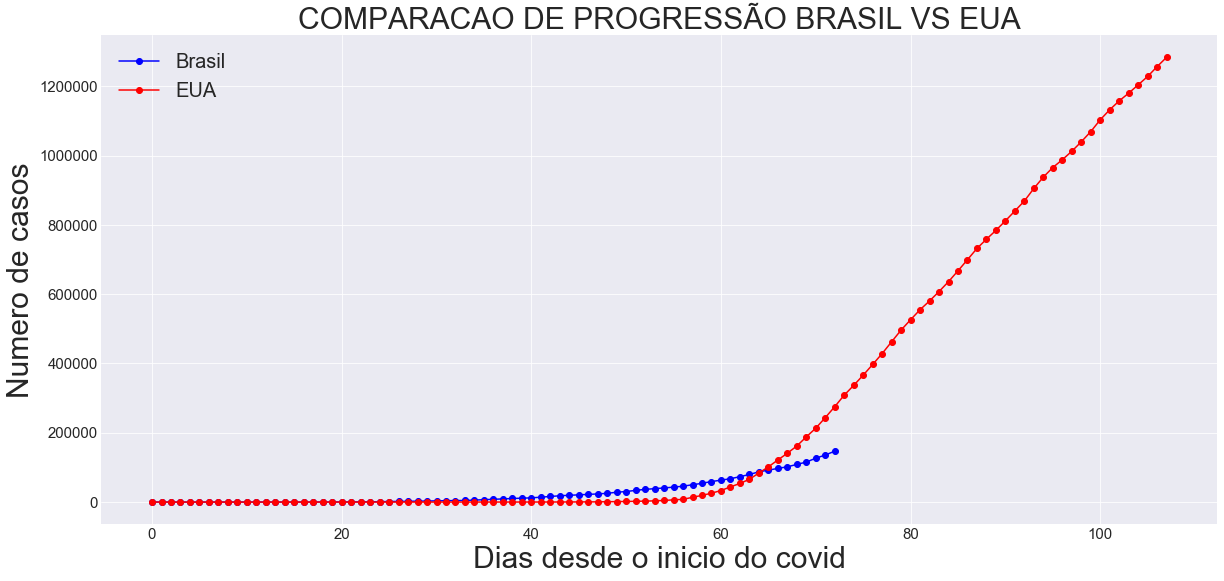

In [34]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, casos_brasil, marker='o',  color='blue')
plt.plot(dias_eua, casos_eua, marker='o',  color='red')

plt.title('COMPARACAO DE PROGRESSÃO BRASIL VS EUA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['Brasil', 'EUA'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


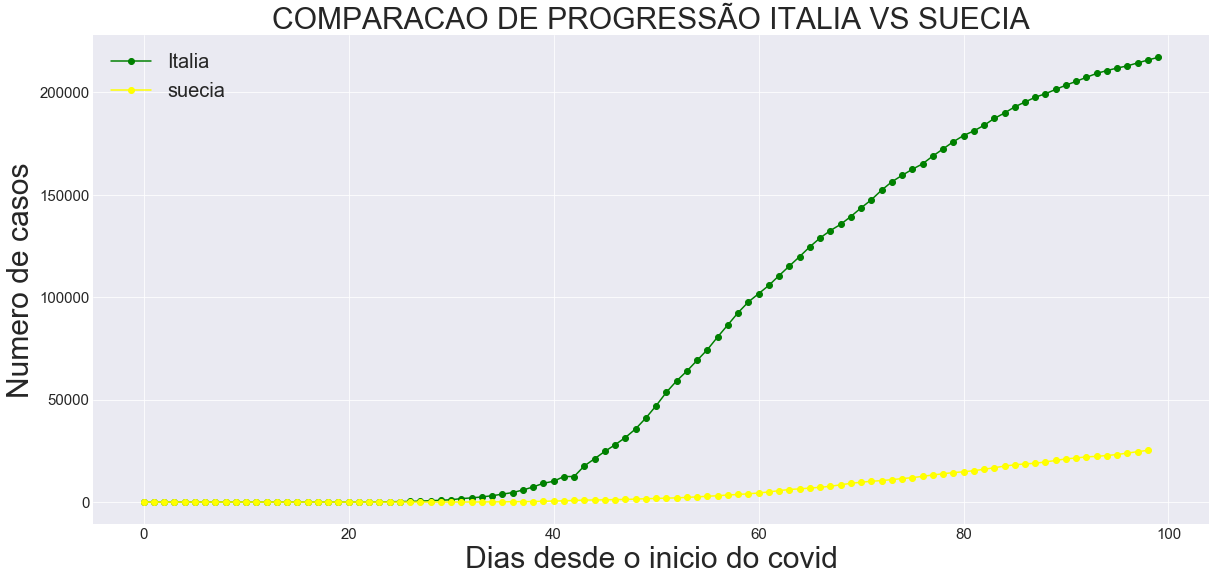

In [35]:
plt.figure(figsize=(20, 9))
plt.plot(dias_italia, casos_italia, marker='o', color='green')
plt.plot(dias_suecia, casos_suecia, marker='o',  color='yellow')


plt.title('COMPARACAO DE PROGRESSÃO ITALIA VS SUECIA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['Italia', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


mesmo caso da italia, precisamos de um percentual para saber como realmente esta

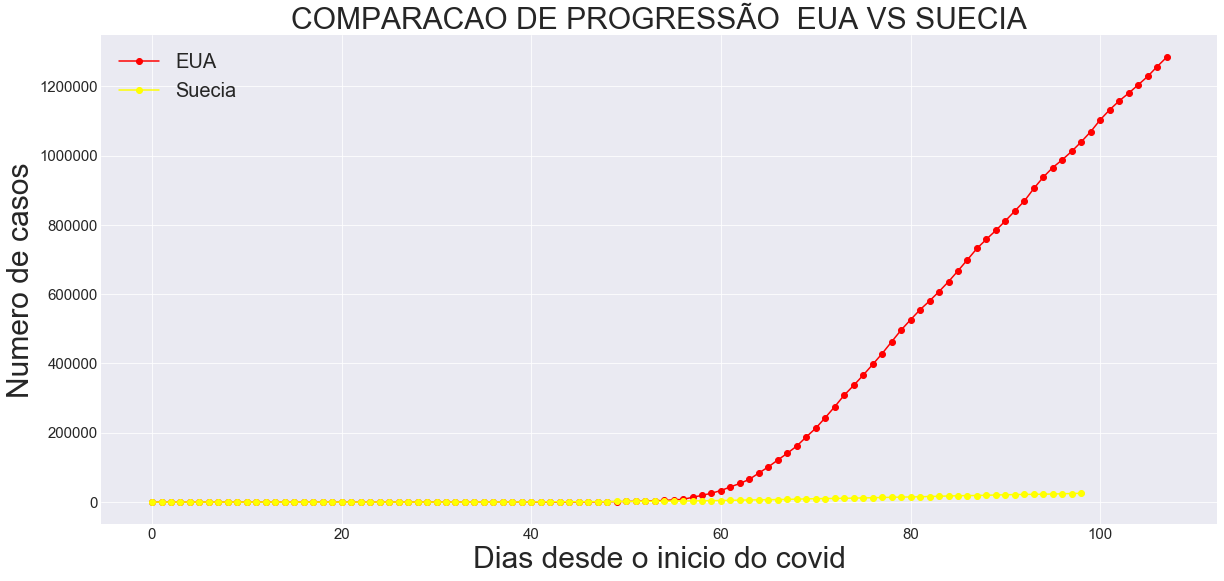

In [36]:
plt.figure(figsize=(20, 9))
plt.plot(dias_eua, casos_eua, marker='o', color='red')
plt.plot(dias_suecia, casos_suecia, marker='o',  color='yellow')


plt.title('COMPARACAO DE PROGRESSÃO  EUA VS SUECIA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['EUA', 'Suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


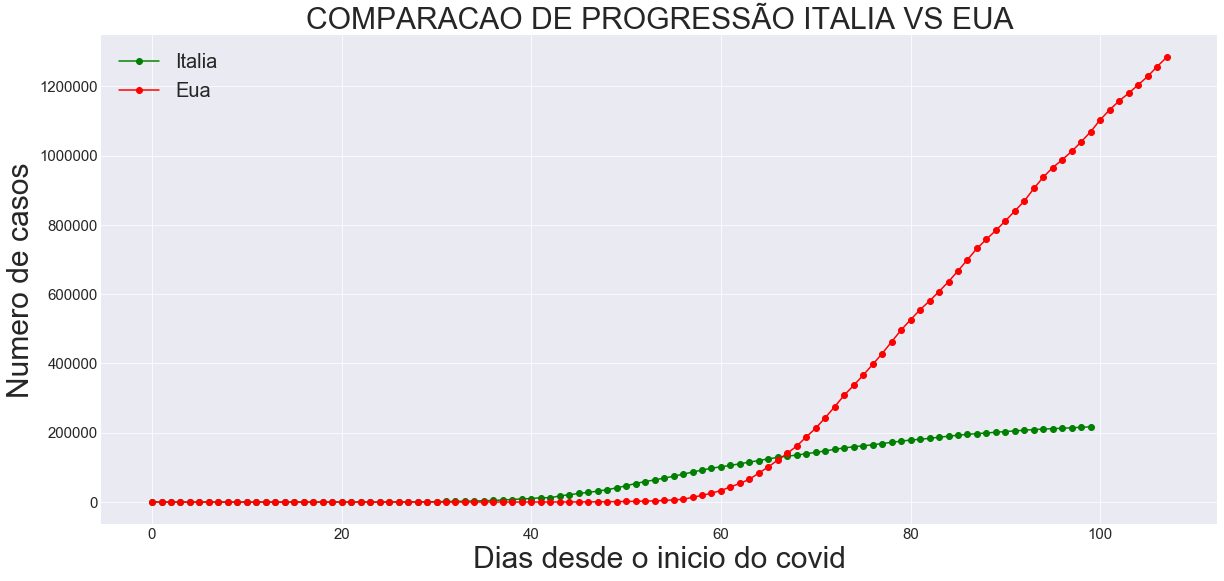

In [37]:
plt.figure(figsize=(20, 9))
plt.plot(dias_italia, casos_italia, marker='o',  color='green')
plt.plot(dias_eua, casos_eua, marker='o', color='red')


plt.title('COMPARACAO DE PROGRESSÃO ITALIA VS EUA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['Italia', 'Eua'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


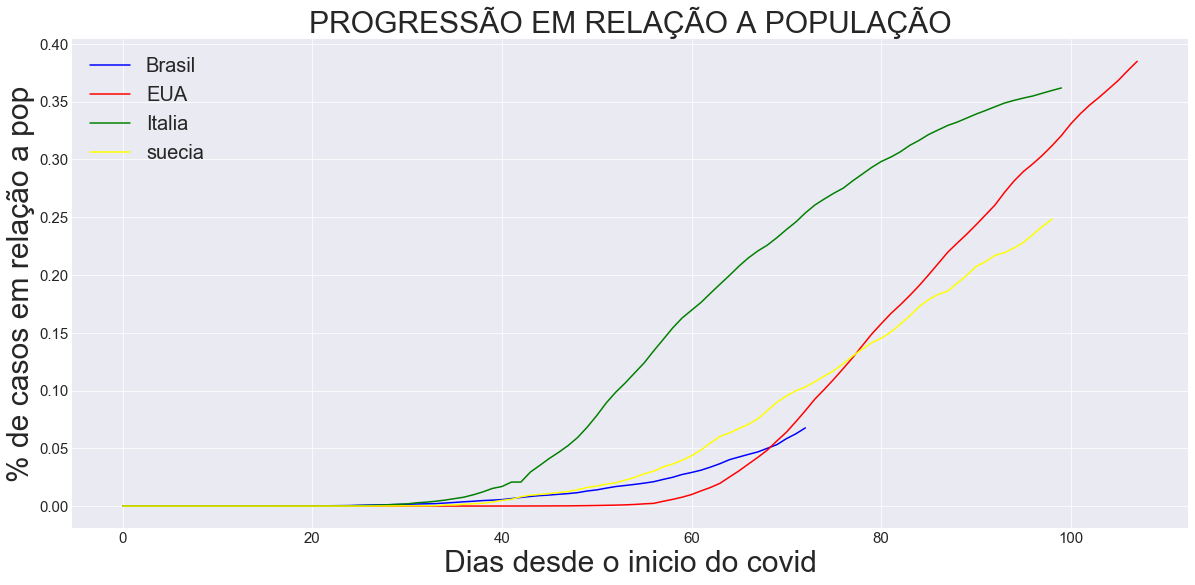

In [38]:
eua_porc = []
br_porc = []
it_porc = []
su_porc = []

for i in casos_eua:
  porc = (i / 333545145)*100
  eua_porc.append(porc)
for i in casos_brasil:
  porc = (i / 217089238)*100
  br_porc.append(porc)
for i in casos_italia:
  porc = (i / 60017348)*100
  it_porc.append(porc)
for i in casos_suecia:
  porc = (i / 10174790)*100
  su_porc.append(porc)

plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, br_porc, color='blue')
plt.plot(dias_eua, eua_porc, color='red')
plt.plot(dias_italia, it_porc, color='green')
plt.plot(dias_suecia, su_porc, color='yellow')

plt.title('PROGRESSÃO EM RELAÇÃO A POPULAÇÃO', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('% de casos em relação a pop', size = 30)
plt.legend(['Brasil', 'EUA','Italia', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


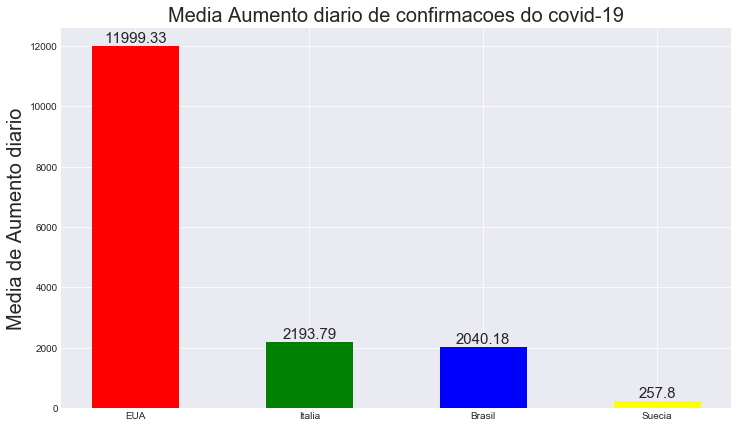

In [39]:
conf_eua1, conf_eua2 = itertools.tee(iter(list(casos_eua)))
next(conf_eua2)
conf_it1, conf_it2 = itertools.tee(iter(list(casos_italia)))
next(conf_it2)
conf_br1, conf_br2 = itertools.tee(iter(list(casos_brasil)))
next(conf_br2)
conf_su1, conf_su2 = itertools.tee(iter(list(casos_suecia)))
next(conf_su2)
diferenca_eua =[int(r) - int(p) for p,r in zip(conf_eua1, conf_eua2)]
diferenca_italia =[int(r) - int(p) for p,r in zip(conf_it1, conf_it2)]
diferenca_brasil =[int(r) - int(p) for p,r in zip(conf_br1, conf_br2)]
diferenca_suecia =[int(r) - int(p) for p,r in zip(conf_su1, conf_su2)]
diferenca_eua_media = np.array(diferenca_eua).mean()
diferenca_italia_media = np.array(diferenca_italia).mean()
diferenca_brasil_media = np.array(diferenca_brasil).mean()
diferenca_suecia_media = np.array(diferenca_suecia).mean()

paises = ['EUA', 'Italia', 'Brasil', 'Suecia']
numeros = [diferenca_eua_media, diferenca_italia_media, diferenca_brasil_media, diferenca_suecia_media]
numeros = [round(m, 2) for m in numeros]
fig = plt.figure(figsize=(12, 7))
rects = plt.bar(paises, numeros, align='center', color=['red', 'green', 'blue', 'yellow'], width=0.5)
ax = rects.patches

for rect, label in zip(ax, numeros):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom', fontsize=15)
    
plt.ylabel('Media de Aumento diario', size = 20)
plt.title('Media Aumento diario de confirmacoes do covid-19', size=20)
plt.show()

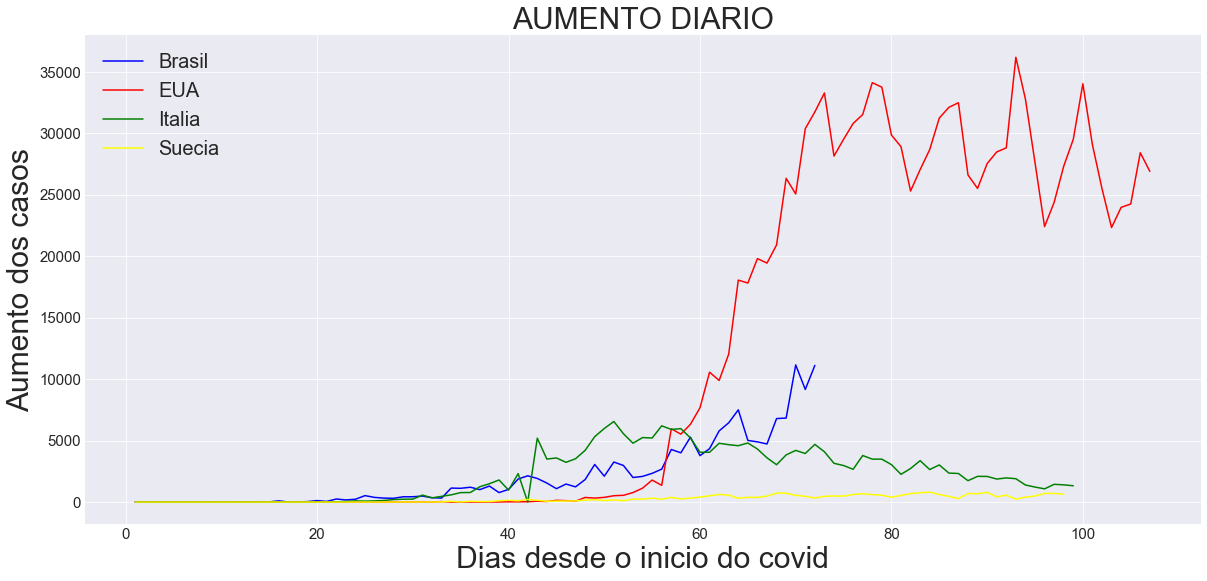

In [40]:
ax = plt.figure(figsize=(20, 9))
plt.plot(dias_brasil[1:], diferenca_brasil, color='blue')
plt.plot(dias_eua[1:], diferenca_eua, color='red')
plt.plot(dias_italia[1:], diferenca_italia, color='green')
plt.plot(dias_suecia[1:], diferenca_suecia, color='yellow')

plt.title('AUMENTO DIARIO', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Aumento dos casos', size = 30)
plt.legend(['Brasil', 'EUA','Italia', 'Suecia'],  prop={'size': 20}, loc="upper left")
plt.xticks(size=15)

plt.yticks(size=15)
plt.show()

In [0]:
diferenca_eua =[int(r) - int(p) for p,r in zip(casos_eua, mortes_eua)]
diferenca_italia =[int(r) - int(p) for p,r in zip(casos_italia, mortes_italia)]
diferenca_brasil =[int(r) - int(p) for p,r in zip(casos_brasil, mortes_brasil)]
diferenca_suecia =[int(r) - int(p) for p,r in zip(casos_suecia, mortes_suecia)]

diferenca_eua =[int(r) - int(p) for p,r in zip(diferenca_eua, recuperados_eua)]
diferenca_italia =[int(r) - int(p) for p,r in zip(diferenca_italia, recuperados_italia)]
diferenca_brasil =[int(r) - int(p) for p,r in zip(diferenca_brasil, recuperados_brasil)]
diferenca_suecia =[int(r) - int(p) for p,r in zip(diferenca_suecia, recuperados_suecia)]

antes_30_eua = []
for index,conteudo in enumerate(diferenca_eua):
    if conteudo >= 30:
        antes_30_eua.append(index)
eua_day = [i for i in range(len(antes_30_eua))]

antes_30_br = []
for index,conteudo in enumerate(diferenca_brasil):
    if conteudo >= 30:
        antes_30_br.append(index)
br_day = [i for i in range(len(antes_30_br))]

antes_30_su = []
for index,conteudo in enumerate(diferenca_suecia):
    if conteudo >= 30:
        antes_30_su.append(index)
su_day = [i for i in range(len(antes_30_su))]

antes_30_it = []
for index,conteudo in enumerate(diferenca_italia):
    if conteudo >= 30:
        antes_30_it.append(index)
it_day = [i for i in range(len(antes_30_it))]

In [42]:
p1 = figure(plot_width=800, plot_height=550, title="Casos ativos (Totais - (recuperados+ mortos))",
             x_range=(0, 100))
p1.grid.grid_line_alpha=1
p1.ygrid.band_fill_color = "#4682B4"
p1.ygrid.band_fill_alpha = 0.1
p1.xaxis.axis_label = 'Dias desde inicio covid'
p1.yaxis.axis_label = 'Casos ativos'
p1.xaxis.minor_tick_line_width = 10



p1.line(br_day, diferenca_brasil[13:], color='#3E4CC3', 
        legend_label='Brasil', line_width=1)
p1.circle(br_day[-1], diferenca_brasil[-1], fill_color="white", size=5)

p1.line(eua_day, diferenca_eua[33:], color='#F54138', 
        legend_label='Estados Unidos', line_width=1)
p1.circle(eua_day[-1], diferenca_eua[-1], fill_color="white", size=5)

p1.line(su_day, diferenca_suecia[33:], color='#DBAE23', 
        legend_label='Suecia', line_width=1)
p1.circle(su_day[-1], diferenca_suecia[-1], fill_color="white", size=5)


p1.line(it_day, diferenca_italia[23:], color='#3EC358', 
        legend_label='Italia', line_width=1)
p1.circle(it_day[-1], diferenca_italia[-1], fill_color="white", size=5)


p1.legend.location = "bottom_right"
output_notebook()
show(p1)



Loading BokehJS ...

In [43]:
p1 = figure(plot_width=800, plot_height=550, title="Casos ativos (Totais - (recuperados+ mortos))",
             x_range=(0, 100), y_axis_type="log")
p1.grid.grid_line_alpha=1
p1.ygrid.band_fill_color = "#4682B4"
p1.ygrid.band_fill_alpha = 0.1
p1.xaxis.axis_label = 'Dias desde inicio covid'
p1.yaxis.axis_label = 'Casos Ativos(escala logaritmica)'
p1.xaxis.minor_tick_line_width = 10



p1.line(br_day, diferenca_brasil[13:], color='#3E4CC3', 
        legend_label='Brasil', line_width=1)
p1.circle(br_day[-1], diferenca_brasil[-1], fill_color="white", size=5)

p1.line(eua_day, diferenca_eua[33:], color='#F54138', 
        legend_label='Estados Unidos', line_width=1)
p1.circle(eua_day[-1], diferenca_eua[-1], fill_color="white", size=5)

p1.line(su_day, diferenca_suecia[33:], color='#DBAE23', 
        legend_label='Suecia', line_width=1)
p1.circle(su_day[-1], diferenca_suecia[-1], fill_color="white", size=5)


p1.line(it_day, diferenca_italia[23:], color='#3EC358', 
        legend_label='Italia', line_width=1)
p1.circle(it_day[-1], diferenca_italia[-1], fill_color="white", size=5)


p1.legend.location = "bottom_right"
output_notebook()
show(p1)



Loading BokehJS ...

 **O QUE PODE-SE REPARAR ATRAVEZ DESSES GRAFICOS DE CASOS:**
*   A italia esta partindo para a estabilização
*   Estados unidos Parte para a estabilização
*   O Brasil assim como a suecia, tendem a ter mais casos percentuais doq os Estados Unidos
*   O Brasil se encaminha para ser o pais com mais casos
*   A Italia cresceu de forma muito grande percentualmente
*   Apesar do achatamento a Italia tem uma media de casos diarios muito grande





repetiremos os mesmos graficos para mortes, e depois faremos graficos de mortes vs recuperados

## Mortes

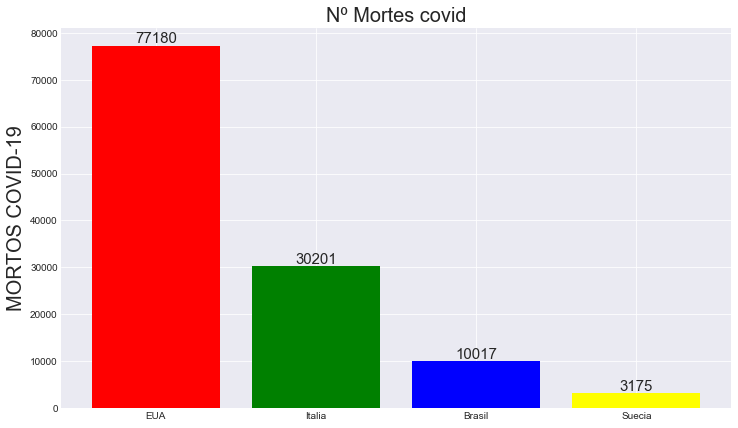

In [44]:
fig = plt.figure(figsize=(12, 7))
paises = ['EUA', 'Italia', 'Brasil', 'Suecia']
numeros = [mortos_eua, mortos_italia, mortos_brasil, mortos_suecia]
rects = plt.bar(paises,numeros, align='center', color=['red', 'green', 'blue', 'yellow'])

ax = rects.patches
for rect, label in zip(ax, numeros):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height , label,
            ha='center', va='bottom', fontsize=15)
    
plt.ylabel('MORTOS COVID-19', size = 20)
plt.title('Nº Mortes covid', size=20)
plt.show()

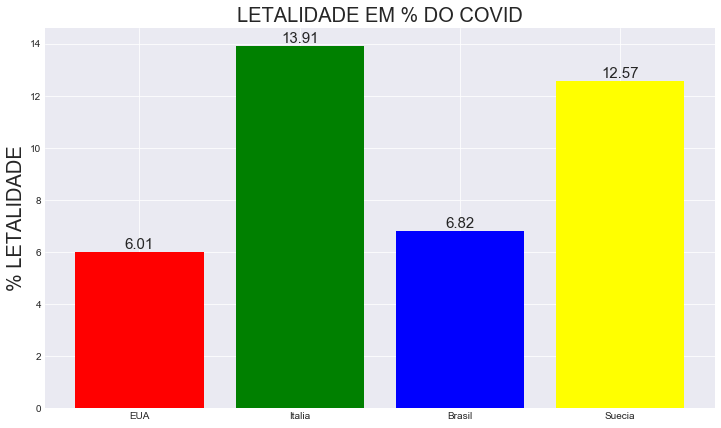

In [45]:
fig = plt.figure(figsize=(12, 7))
paises = ['EUA', 'Italia', 'Brasil', 'Suecia']
numeros = [(mortos_eua/confirmados_eua)*100, (mortos_italia/confirmados_italia) *100, 
           (mortos_brasil/confirmados_brasil)*100, (mortos_suecia/confirmados_suecia)*100]
numeros = [round(num, 2) for num in numeros]
rects = plt.bar(paises,numeros, align='center', color=['red', 'green', 'blue', 'yellow'])

ax = rects.patches
for rect, label in zip(ax, numeros):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height , label,
            ha='center', va='bottom', fontsize=15)
    
plt.ylabel('% LETALIDADE', size = 20)
plt.title('LETALIDADE EM % DO COVID', size=20)
plt.show()

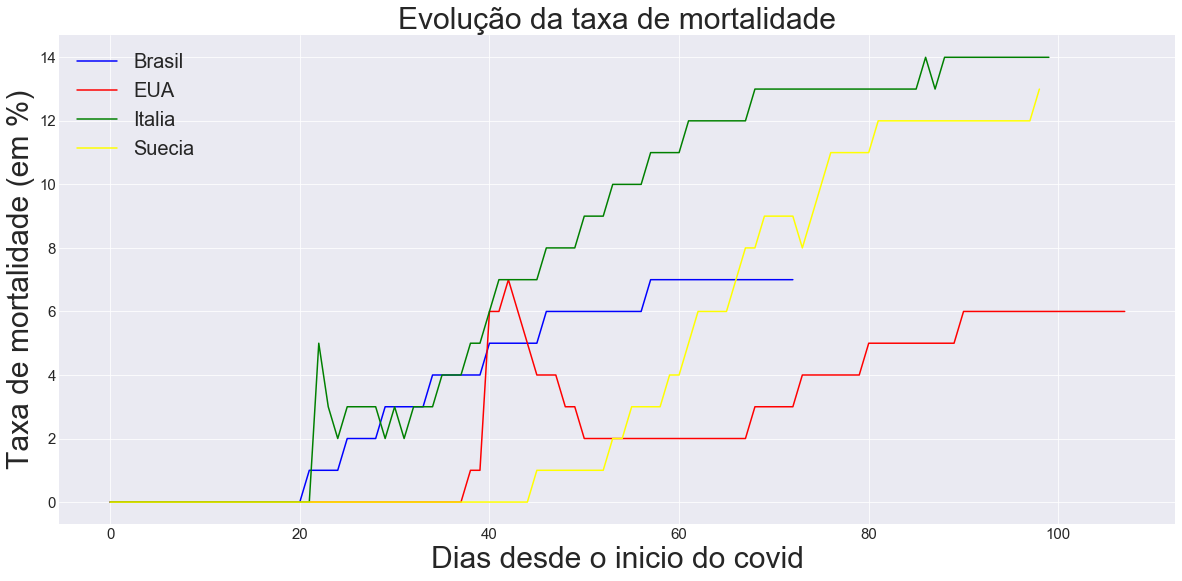

In [46]:
plt.figure(figsize=(20, 9))
mort_br = [round(abs((float(p) / float(r))), 2)*100 if p != 0 and r != 0 else 0 for p,r in zip(mortes_brasil, casos_brasil)]
mort_eua = [round(abs((float(p) / float(r))), 2)*100 if p != 0 and r != 0 else 0 for p,r in zip(mortes_eua, casos_eua)]
mort_it = [round(abs((float(p) / float(r))), 2)*100 if p != 0 and r != 0 else 0 for p,r in zip(mortes_italia, casos_italia)]
mort_su = [round(abs((float(p) / float(r))), 2)*100 if p != 0 and r != 0 else 0 for p,r in zip(mortes_suecia, casos_suecia)]


plt.plot(dias_brasil, mort_br, color='blue')
plt.plot(dias_eua, mort_eua, color='red')
plt.plot(dias_italia, mort_it, color='green')
plt.plot(dias_suecia, mort_su, color='yellow')


plt.title('Evolução da taxa de mortalidade', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Taxa de mortalidade (em %)', size = 30)
plt.legend(['Brasil', 'EUA','Italia','Suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [47]:
print('comparação morte 4 paises:')
IPython.display.HTML('<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/2201203" data-url="https://flo.uri.sh/visualisation/2201203/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>')

comparação morte 4 paises:


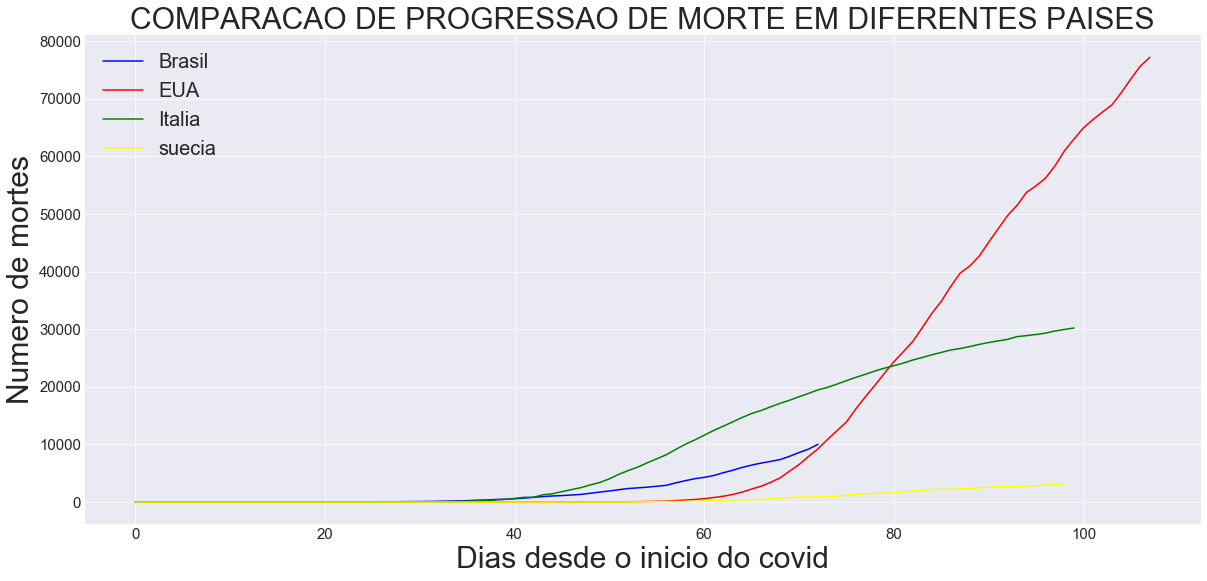

In [48]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, mortes_brasil, color='blue')
plt.plot(dias_eua, mortes_eua, color='red')
plt.plot(dias_italia, mortes_italia, color='green')
plt.plot(dias_suecia, mortes_suecia, color='yellow')

plt.title('COMPARACAO DE PROGRESSAO DE MORTE EM DIFERENTES PAISES', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de mortes', size = 30)
plt.legend(['Brasil', 'EUA','Italia', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [0]:
conf_eua1, conf_eua2 = itertools.tee(iter(list(mortes_eua)))
next(conf_eua2)
conf_it1, conf_it2 = itertools.tee(iter(list(mortes_eua)))
next(conf_it2)
conf_br1, conf_br2 = itertools.tee(iter(list(mortes_brasil)))
next(conf_br2)
conf_su1, conf_su2 = itertools.tee(iter(list(mortes_suecia)))
next(conf_su2)

diferenca_eua =[int(r) - int(p) for p,r in zip(conf_eua1, conf_eua2)]
diferenca_italia =[int(r) - int(p) for p,r in zip(conf_it1, conf_it2)]
diferenca_brasil =[int(r) - int(p) for p,r in zip(conf_br1, conf_br2)]
diferenca_suecia =[int(r) - int(p) for p,r in zip(conf_su1, conf_su2)]



antes_5_eua = []
for index,conteudo in enumerate(diferenca_eua):
    if conteudo >= 5:
        antes_5_eua.append(index)
eua_day = [i for i in range(len(antes_5_eua))]

antes_5_br = []
for index,conteudo in enumerate(diferenca_brasil):
    if conteudo >= 5:
        antes_5_br.append(index)
br_day = [i for i in range(len(antes_5_br))]

antes_5_su = []
for index,conteudo in enumerate(diferenca_suecia):
    if conteudo >= 5:
        antes_5_su.append(index)
su_day = [i for i in range(len(antes_5_su))]

antes_5_it = []
for index,conteudo in enumerate(diferenca_italia):
    if conteudo >= 5:
        antes_5_it.append(index)
it_day = [i for i in range(len(antes_5_it))]



In [50]:
p1 = figure(plot_width=800, plot_height=550, title="Tragetoria de mortes do  covid-19 logaritmica",
             x_range=(0, 100), y_axis_type="log")
p1.grid.grid_line_alpha=1
p1.ygrid.band_fill_color = "#4682B4"
p1.ygrid.band_fill_alpha = 0.1
p1.xaxis.axis_label = 'Dias apos ter aumento de 5 casos diarios'
p1.yaxis.axis_label = 'Progressao casos(escala logaritmica)'
p1.xaxis.minor_tick_line_width = 0


p1.line(br_day, mortes_brasil[24:], color='#3E4CC3', 
        legend_label='Brasil', line_width=1)
p1.circle(br_day[-1], mortes_brasil[-1], fill_color="white", size=5)

p1.line(eua_day, mortes_eua[47:], color='#F54138', 
        legend_label='Estados Unidos', line_width=1)
p1.circle(eua_day[-1], mortes_eua[-1], fill_color="white", size=5)

p1.line(su_day, mortes_suecia[54:], color='#DBAE23', 
        legend_label='Suecia', line_width=1)
p1.circle(su_day[-1], mortes_suecia[-1], fill_color="white", size=5)


p1.line(it_day, mortes_italia[39:], color='#3EC358', 
        legend_label='Italia', line_width=1)
p1.circle(it_day[-1], mortes_italia[-1], fill_color="white", size=5)


p1.legend.location = "bottom_right"
output_notebook()
show(p1)



Loading BokehJS ...

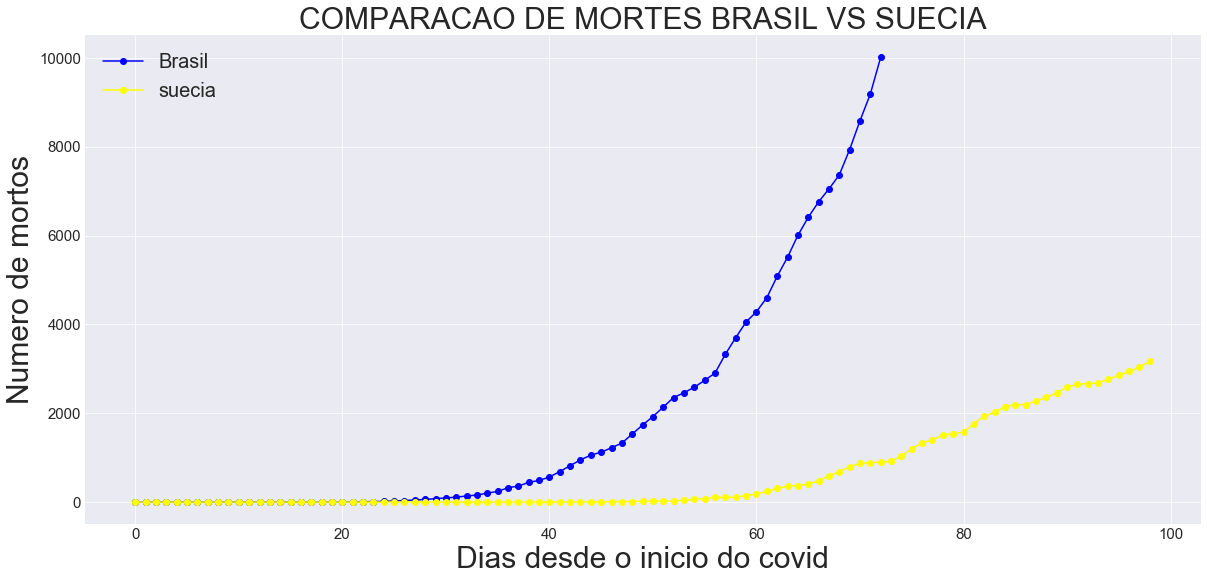

In [51]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, mortes_brasil, marker='o', color='blue')
plt.plot(dias_suecia, mortes_suecia, marker='o', color='yellow')


plt.title('COMPARACAO DE MORTES BRASIL VS SUECIA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de mortos', size = 30)
plt.legend(['Brasil', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


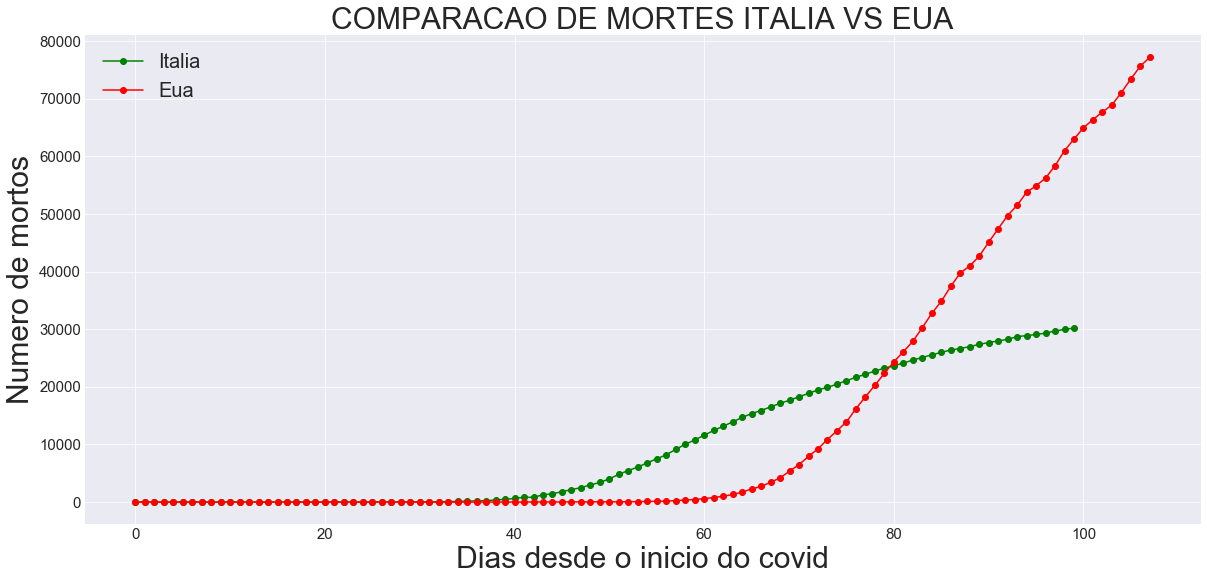

In [52]:
plt.figure(figsize=(20, 9))
plt.plot(dias_italia, mortes_italia, marker='o', color='green')
plt.plot(dias_eua, mortes_eua, marker='o', color='red')

plt.title('COMPARACAO DE MORTES ITALIA VS EUA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de mortos', size = 30)
plt.legend(['Italia', 'Eua'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


vemos que a italia esta diminuindo os casos de morte, sua curva esta sendo "achatada", enquanto os eua estao so aumentando

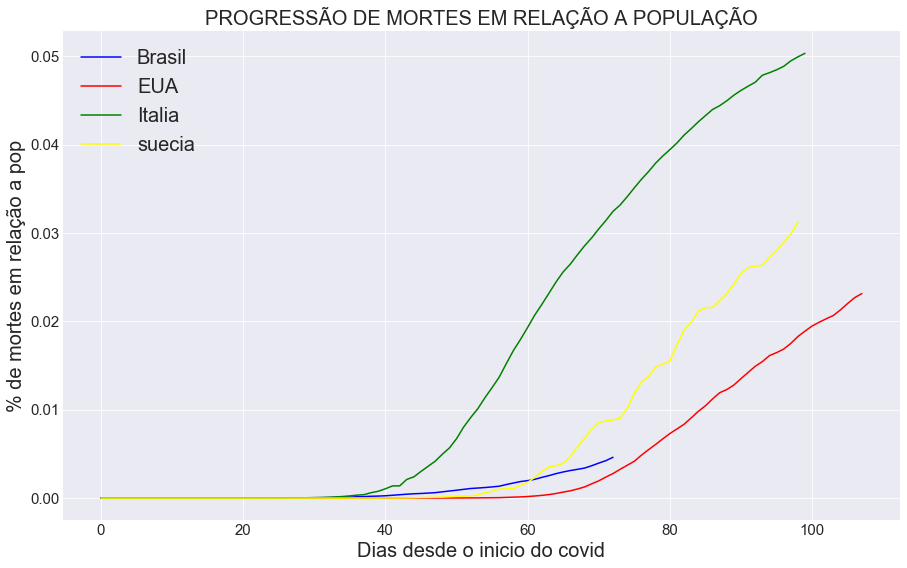

In [53]:
eua_porc = []
br_porc = []
it_porc = []
su_porc = []

for i in mortes_eua:
  porc = (i / 333545145)*100
  eua_porc.append(porc)
for i in mortes_brasil:
  porc = (i / 217089238)*100
  br_porc.append(porc)
for i in mortes_italia:
  porc = (i / 60017348)*100
  it_porc.append(porc)
for i in mortes_suecia:
  porc = (i / 10174790)*100
  su_porc.append(porc)

plt.figure(figsize=(15, 9))
plt.plot(dias_brasil, br_porc, color='blue')
plt.plot(dias_eua, eua_porc, color='red')
plt.plot(dias_italia, it_porc, color='green')
plt.plot(dias_suecia, su_porc, color='yellow')

plt.title('PROGRESSÃO DE MORTES EM RELAÇÃO A POPULAÇÃO', size=20)
plt.xlabel('Dias desde o inicio do covid', size = 20)
plt.ylabel('% de mortes em relação a pop', size = 20)
plt.legend(['Brasil', 'EUA','Italia', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


Quando vemos as mortes em relacao a % de populacao reparamos algumas coisas


*   A italia ainda eh disparada na frente com mais numeros de mortes
*   A italia esta indo ao achatamento da curva, enquanto os outros paises estao na subida da curva
*   A suecia e maior que o dos  EUA
*   O Brasil esta crescendo de forma mais rapida que os EUA e a Suecia






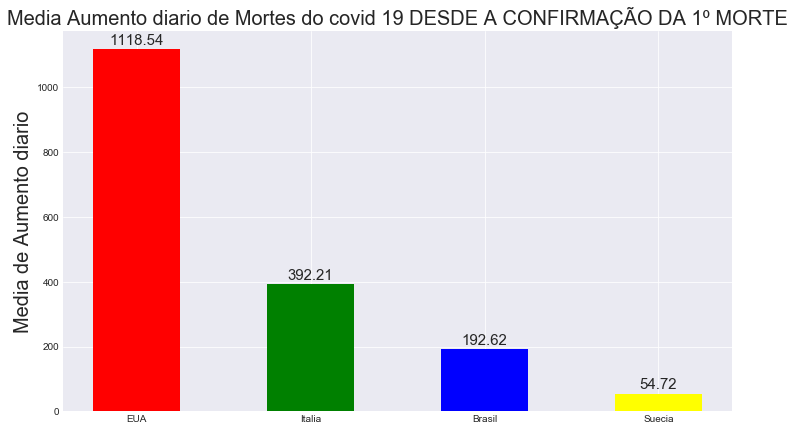

In [54]:
conf_eua1, conf_eua2 = itertools.tee(iter(list(mortes_eua[38:])))
next(conf_eua2)
conf_it1, conf_it2 = itertools.tee(iter(list(mortes_italia[22:])))
next(conf_it2)
conf_br1, conf_br2 = itertools.tee(iter(list(mortes_brasil[20:])))
next(conf_br2)
conf_su1, conf_su2 = itertools.tee(iter(list(mortes_suecia[40:])))
next(conf_su2)
diferenca_eua =[int(r) - int(p) for p,r in zip(conf_eua1, conf_eua2)]
diferenca_italia =[int(r) - int(p) for p,r in zip(conf_it1, conf_it2)]
diferenca_brasil =[int(r) - int(p) for p,r in zip(conf_br1, conf_br2)]
diferenca_suecia =[int(r) - int(p) for p,r in zip(conf_su1, conf_su2)]
diferenca_eua_media = np.array(diferenca_eua).mean()
diferenca_italia_media = np.array(diferenca_italia).mean()
diferenca_brasil_media = np.array(diferenca_brasil).mean()
diferenca_suecia_media = np.array(diferenca_suecia).mean()

paises = ['EUA', 'Italia', 'Brasil', 'Suecia']
numeros = [diferenca_eua_media, diferenca_italia_media, diferenca_brasil_media, diferenca_suecia_media]
numeros = [round(m, 2) for m in numeros]
fig = plt.figure(figsize=(12, 7))
rects = plt.bar(paises, numeros, align='center', color=['red', 'green', 'blue', 'yellow'], width=0.5)
ax = rects.patches

for rect, label in zip(ax, numeros):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom', fontsize=15)
    
plt.ylabel('Media de Aumento diario', size = 20)
plt.title('Media Aumento diario de Mortes do covid 19 DESDE A CONFIRMAÇÃO DA 1º MORTE', size=20)
plt.show()

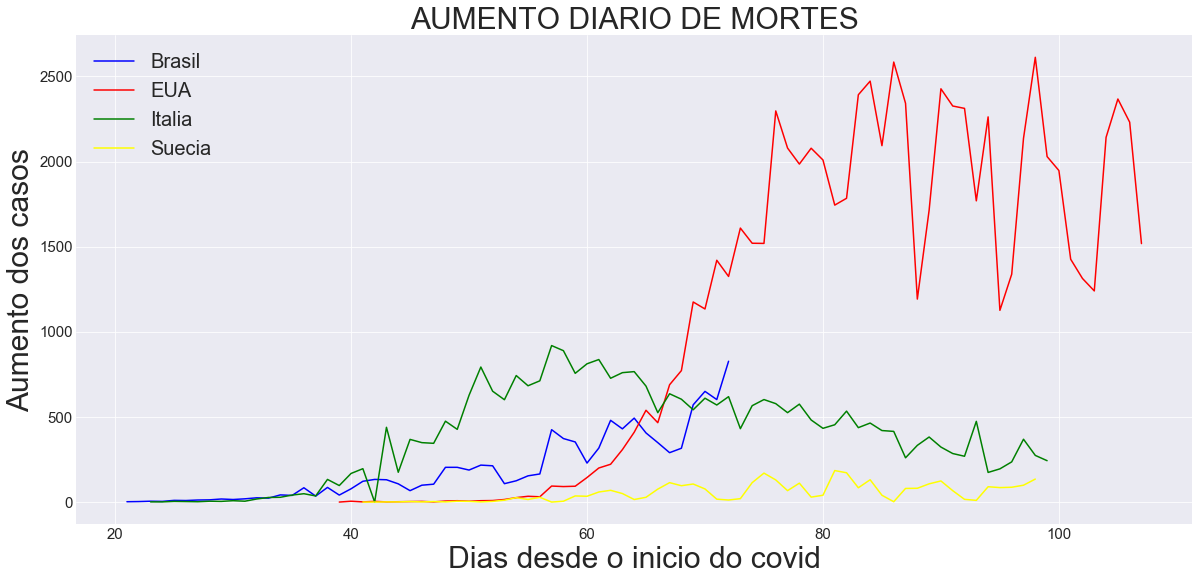

In [55]:
ax = plt.figure(figsize=(20, 9))
plt.plot(dias_brasil[21:], diferenca_brasil, color='blue')
plt.plot(dias_eua[39:], diferenca_eua, color='red')
plt.plot(dias_italia[23:], diferenca_italia, color='green')
plt.plot(dias_suecia[41:], diferenca_suecia, color='yellow')

plt.title('AUMENTO DIARIO DE MORTES', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Aumento dos casos', size = 30)
plt.legend(['Brasil', 'EUA','Italia', 'Suecia'],  prop={'size': 20}, loc="upper left")
plt.xticks(size=15)

plt.yticks(size=15)
plt.show()

### Estamos conseguindo achatar a curva?

In [0]:
#@markdown Codigo mto grande, dois cliques para abrir-lo
#@markdown ---
conf_eua1, conf_eua2 = itertools.tee(iter(mortes_eua))
next(conf_eua2)
conf_it1, conf_it2 = itertools.tee(iter(mortes_italia))
next(conf_it2)
conf_br1, conf_br2 = itertools.tee(iter(mortes_brasil))
next(conf_br2)
conf_su1, conf_su2 = itertools.tee(iter(mortes_suecia))
next(conf_su2)

diferenca_eua =[int(r) - int(p) for p,r in zip(conf_eua1,
                                            conf_eua2)]
diferenca_italia =[int(r) - int(p) for p,r in zip(conf_it1
                                              ,conf_it2)]
diferenca_brasil =[int(r) - int(p) for p,r in zip(conf_br1,
                                              conf_br2)]
diferenca_suecia =[int(r) - int(p) for p,r in zip(conf_su1,
                                              conf_su2)]

depois_5_eua = []
for index,conteudo in enumerate(diferenca_eua):
    if conteudo >= 5:
        depois_5_eua.append(index)
eua_day = [i for i in range(len(depois_5_eua))]

depois_5_br = []
for index,conteudo in enumerate(diferenca_brasil):
    if conteudo >= 5:
        depois_5_br.append(index)
br_day = [i for i in range(len(depois_5_br))]

depois_5_su = []
for index,conteudo in enumerate(diferenca_suecia):
    if conteudo >= 5:
        depois_5_su.append(index)
su_day = [i for i in range(len(depois_5_su))]

depois_5_it = []
for index,conteudo in enumerate(diferenca_italia):
    if conteudo >= 5:
        depois_5_it.append(index)
it_day = [i for i in range(len(depois_5_it))]

def moving_average(a, n=7) :
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n
moving_eua = moving_average(diferenca_eua[47:])
moving_br = moving_average(diferenca_brasil[24:])
moving_it = moving_average(diferenca_italia[29:])
moving_su = moving_average(diferenca_suecia[52:])

In [171]:
p1 = figure(plot_width=800, plot_height=550, title="Tragetoria do covid-19 logaritmica",
             x_range=(0, 100), y_axis_type="log")
p1.grid.grid_line_alpha=1
p1.ygrid.band_fill_color = "#4682B4"
p1.ygrid.band_fill_alpha = 0.1
p1.xaxis.axis_label = 'Dias apos ter aumento de 30 casos diarios'
p1.yaxis.axis_label = 'Progressao casos(escala logaritmica)'
p1.xaxis.minor_tick_line_width = 10



p1.line(br_day[7:], moving_br, color='#3E4CC3', 
        legend_label='Brasil', line_width=1)
p1.circle(br_day[-1], moving_br[-1], fill_color="white", size=5)

p1.line(eua_day[7:], moving_eua, color='#F54138', 
        legend_label='Estados Unidos', line_width=1)
p1.circle(eua_day[-1], moving_eua[-1], fill_color="white", size=5)

p1.line(su_day[5:], moving_su, color='#DBAE23', 
        legend_label='Suecia', line_width=1)
p1.circle(su_day[-1], moving_su[-1], fill_color="white", size=5)


p1.line(it_day[6:], moving_it, color='#3EC358', 
        legend_label='Italia', line_width=1)
p1.circle(it_day[-1], moving_it[-1], fill_color="white", size=5)


p1.legend.location = "bottom_right"
output_notebook()
show(p1)



Loading BokehJS ...

In [57]:
p1 = figure(plot_width=800, plot_height=550, title="media movel de 7 dias de aumento de mortes",
             x_range=(0, 100), y_axis_type="log")
p1.grid.grid_line_alpha=1
p1.ygrid.band_fill_color = "#4682B4"
p1.ygrid.band_fill_alpha = 0.1
p1.xaxis.axis_label = 'Dias apos ter aumento de 5 Mortes diarios'
p1.yaxis.axis_label = 'Progressao casos(escala logaritmica)'
p1.xaxis.minor_tick_line_width = 10



p1.line(br_day[7:], moving_br, color='#3E4CC3', 
        legend_label='Brasil', line_width=1)
p1.circle(br_day[-1], moving_br[-1], fill_color="white", size=5)

p1.line(eua_day[7:], moving_eua, color='#F54138', 
        legend_label='Estados Unidos', line_width=1)
p1.circle(eua_day[-1], moving_eua[-1], fill_color="white", size=5)

p1.line(su_day[5:], moving_su, color='#DBAE23', 
        legend_label='Suecia', line_width=1)
p1.circle(su_day[-1], moving_su[-1], fill_color="white", size=5)


p1.line(it_day[6:], moving_it, color='#3EC358', 
        legend_label='Italia', line_width=1)
p1.circle(it_day[-1], moving_it[-1], fill_color="white", size=5)


p1.legend.location = "bottom_right"
output_notebook()
show(p1)



Loading BokehJS ...

## Mortes vs confirmados bar chart 

In [85]:
dias = index_brasil
colunas = ["mortes","casos"]
colors = ["red", "blue"]

data = {'dias' : dias,
        'mortes'   : mortes_brasil,
        'casos'   : casos_brasil}

p1 = figure(x_range=dias, plot_width=900, plot_height=550, title="casos vs morte brasil",)
p1.vbar_stack(colunas, x='dias', width=0.9, color=colors, source=data,
             legend_label=colunas)
p1.legend.location = "top_left"

output_notebook()
show(p1)

Loading BokehJS ...

In [86]:
dias = index_eua
colunas = ["mortes","casos"]
colors = ["red", "blue"]

data = {'dias' : dias,
        'mortes'   : mortes_eua,
        'casos'   : casos_eua}

p1 = figure(x_range=dias, plot_width=930, plot_height=550, title="casos vs morte EUA",)
p1.vbar_stack(colunas, x='dias', width=0.9, color=colors, source=data,
             legend_label=colunas)
p1.legend.location = "top_left"

output_notebook()
show(p1)

Loading BokehJS ...

In [173]:
dias = index_italia
colunas = ["mortes","casos"]
colors = ["red", "blue"]

data = {'dias' : dias,
        'mortes'   : mortes_italia,
        'casos'   : casos_italia}

p1 = figure(x_range=dias, plot_width=930, plot_height=550, title="casos vs morte Italia",)
p1.vbar_stack(colunas, x='dias', width=0.9, color=colors, source=data,
             legend_label=colunas)
p1.legend.location = "top_left"

output_notebook()
show(p1)

Loading BokehJS ...

In [89]:
dias = index_suecia
colunas = ["mortes","casos"]
colors = ["red", "blue"]

data = {'dias' : dias,
        'mortes'   : mortes_suecia,
        'casos'   : casos_suecia}

p1 = figure(x_range=dias, plot_width=930, plot_height=550, title="casos vs morte suecia",)
p1.vbar_stack(colunas, x='dias', width=0.9, color=colors, source=data,
             legend_label=colunas)
p1.legend.location = "top_left"

output_notebook()
show(p1)

Loading BokehJS ...

## Recuperados vs mortos

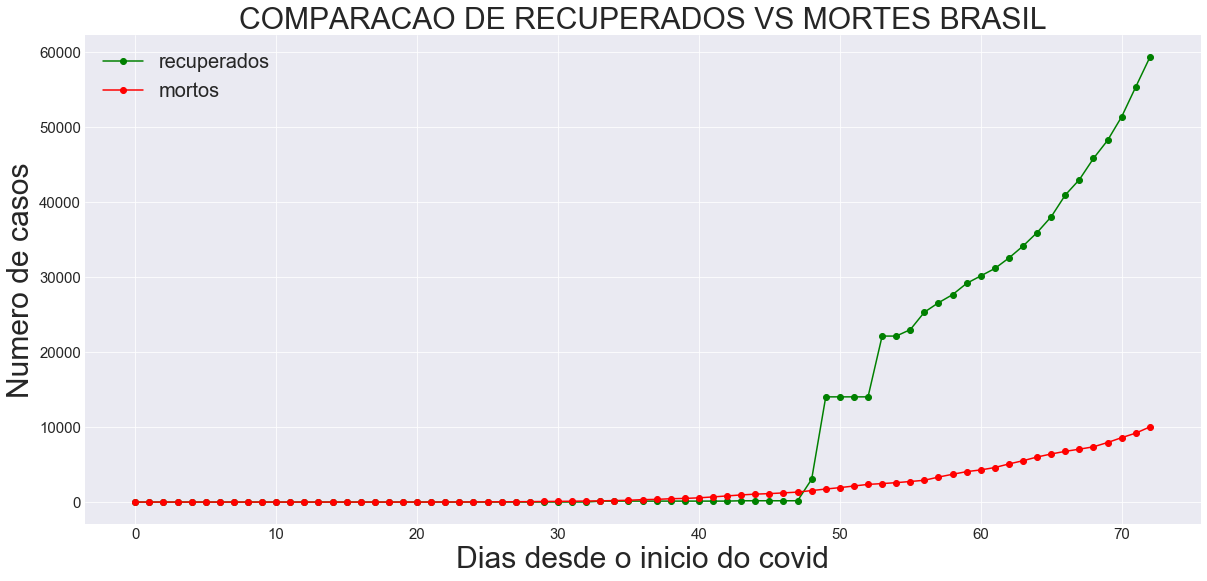

In [90]:
plt.figure(figsize=(20, 9))
plt.plot(dias_brasil, recuperados_brasil, marker='o', color='green')
plt.plot(dias_brasil, mortes_brasil, marker='o', color='red')


plt.title('COMPARACAO DE RECUPERADOS VS MORTES BRASIL', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['recuperados', 'mortos'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


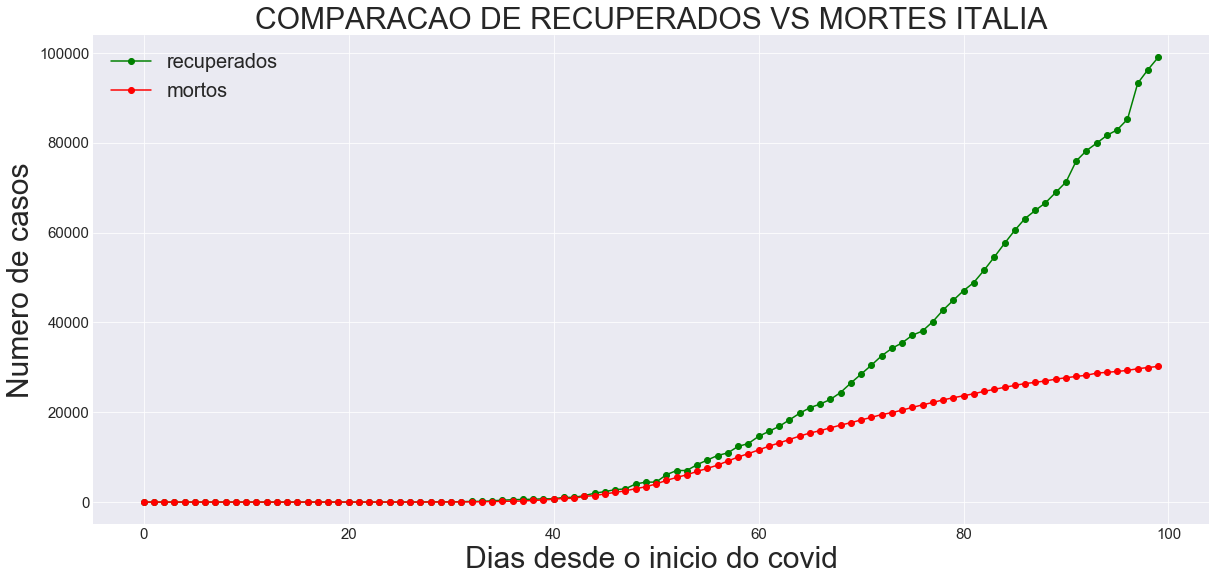

In [91]:
plt.figure(figsize=(20, 9))
plt.plot(dias_italia, recuperados_italia, marker='o', color='green')
plt.plot(dias_italia, mortes_italia, marker='o', color='red')


plt.title('COMPARACAO DE RECUPERADOS VS MORTES ITALIA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['recuperados', 'mortos'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


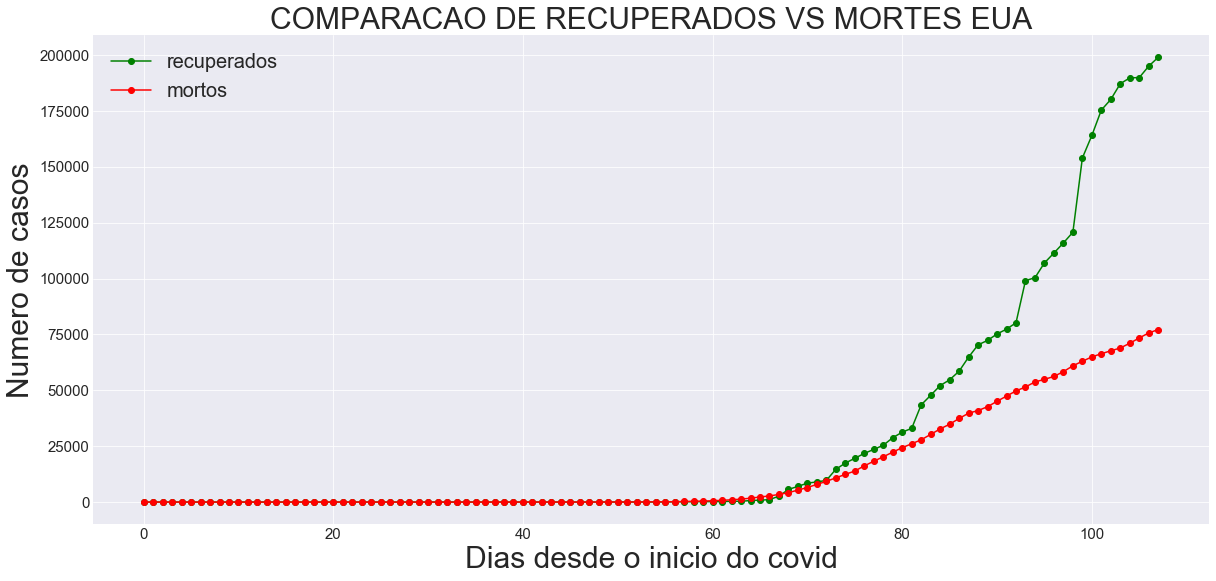

In [92]:
plt.figure(figsize=(20, 9))
plt.plot(dias_eua, recuperados_eua, marker='o', color='green')
plt.plot(dias_eua, mortes_eua, marker='o', color='red')


plt.title('COMPARACAO DE RECUPERADOS VS MORTES EUA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['recuperados', 'mortos'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


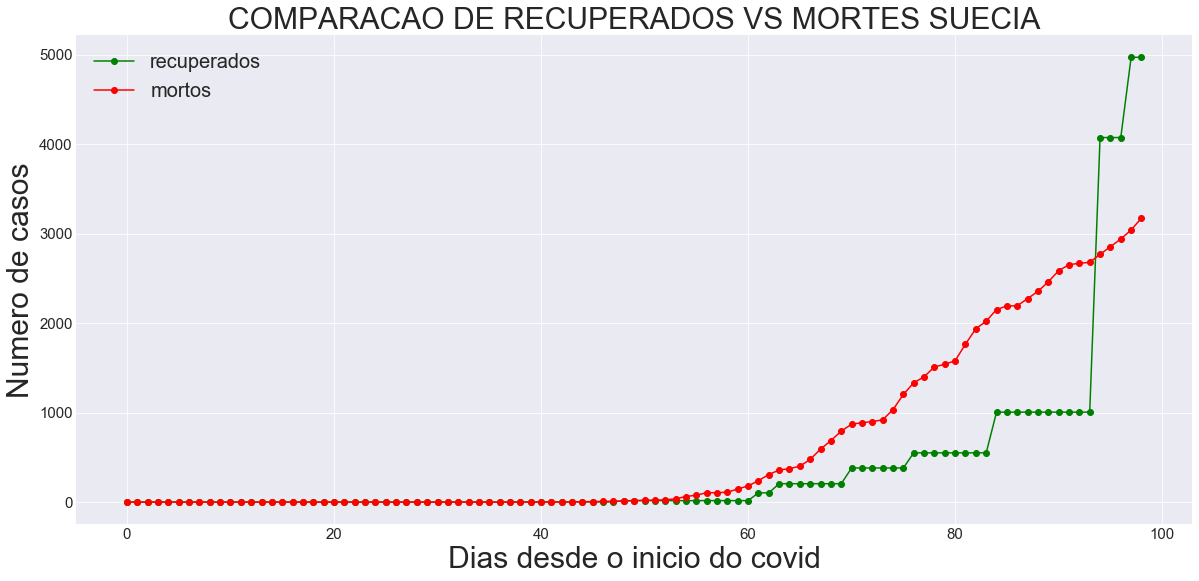

In [93]:
plt.figure(figsize=(20, 9))
plt.plot(dias_suecia, recuperados_suecia, marker='o', color='green')
plt.plot(dias_suecia, mortes_suecia, marker='o', color='red')


plt.title('COMPARACAO DE RECUPERADOS VS MORTES SUECIA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['recuperados', 'mortos'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


# Previsões

Nesta secao nos aplicaremos o algoritmo SVR do sklearn para tentar prever o numero de mortes, casos e recuperados dos 4 paises nos proximos 40 dias.


---

OBS: 
Otimizações serão feitas conforme o passar do tempo

In [0]:
#separando o target(valor a ser previsto) das datas
target_confirmado_br = df_confirmados_brasil['cases'].copy()
df_confirmados_brasil.drop('cases', axis = 1, inplace= True)

target_mortos_br = df_mortes_brasil['deaths'].copy()
df_mortes_brasil.drop('deaths', axis = 1, inplace= True)

target_recuperado_br = df_recuperados_brasil['recovery']
df_recuperados_brasil.drop('recovery', axis = 1, inplace= True)
#-------------------------------------------------------------------------
target_confirmado_eua = df_confirmados_eua['cases'].copy()
df_confirmados_eua.drop('cases', axis = 1, inplace= True)

target_mortos_eua = df_mortes_eua['deaths'].copy()
df_mortes_eua.drop('deaths', axis = 1, inplace= True)

target_recuperado_eua = df_recuperados_eua['recovery']
df_recuperados_eua.drop('recovery', axis = 1, inplace= True)
#-------------------------------------------------------------------------
target_confirmado_italia = df_confirmados_italia['cases'].copy()
df_confirmados_italia.drop('cases', axis = 1, inplace= True)

target_mortos_italia = df_mortes_italia['deaths'].copy()
df_mortes_italia.drop('deaths', axis = 1, inplace= True)

target_recuperado_italia = df_recuperados_italia['recovery']
df_recuperados_italia.drop('recovery', axis = 1, inplace= True)
#-------------------------------------------------------------------------
target_confirmado_suecia = df_confirmados_suecia['cases'].copy()
df_confirmados_suecia.drop('cases', axis = 1, inplace= True)

target_mortos_suecia = df_mortes_suecia['deaths'].copy()
df_mortes_suecia.drop('deaths', axis = 1, inplace= True)

target_recuperado_suecia = df_recuperados_suecia['recovery']
df_recuperados_suecia.drop('recovery', axis = 1, inplace= True)

In [0]:
#COMECAREMOS PELO BRASIL:

In [96]:
#Casos Brasil
X_train, X_test, y_train, y_test = train_test_split(df_confirmados_brasil, target_confirmado_br, test_size=0.1, random_state=42)
poly = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly.fit_transform(X_train)
svm = LinearRegression()
print("fitting..")
svm.fit(X_poly,y_train)

fitting..


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
pred_caso_br = svm.predict(poly.fit_transform(futuro_brasil))

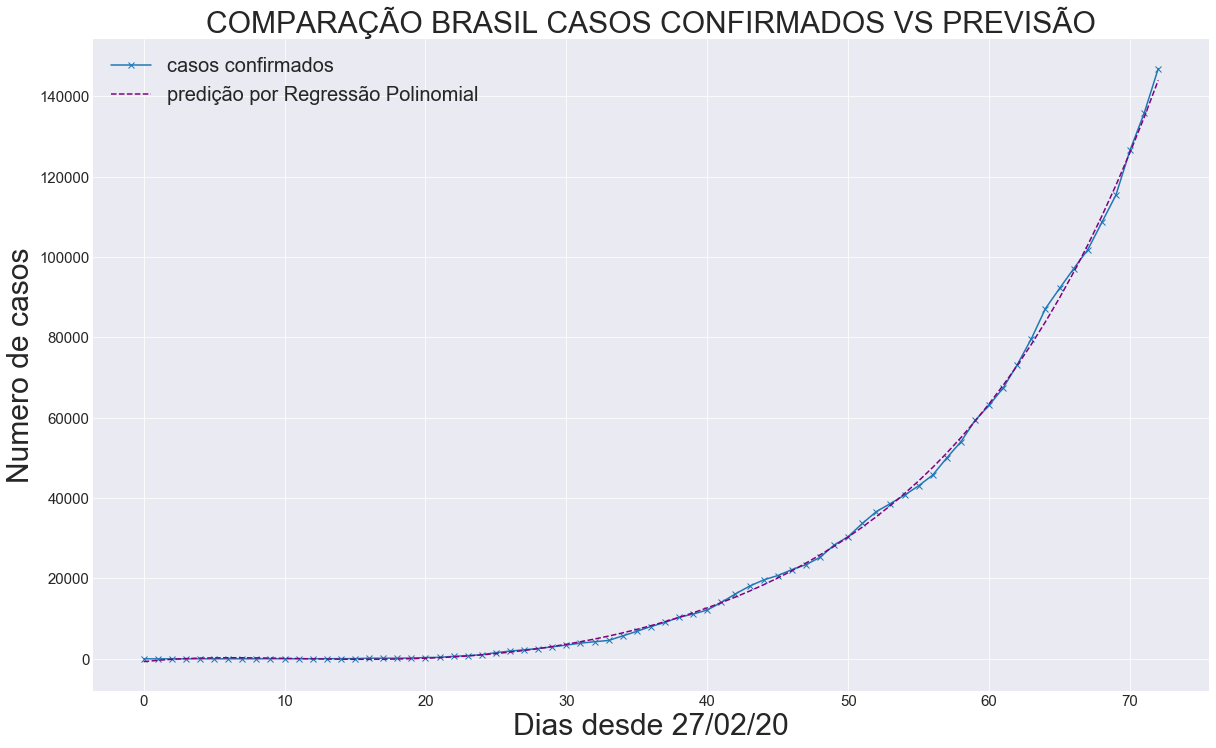

In [98]:
plt.figure(figsize=(20, 12))
plt.plot(dias_brasil, casos_brasil, marker='x')
plt.plot(futuro_brasil[0:len(dias_brasil)],pred_caso_br[0:len(casos_brasil)], linestyle = 'dashed', color='purple')
plt.title('COMPARAÇÃO BRASIL CASOS CONFIRMADOS VS PREVISÃO', size=30)
plt.xlabel('Dias desde 27/02/20', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['casos confirmados', 'predição por Regressão Polinomial'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [99]:
# predicao mortes brasil
X_train, X_test, y_train, y_test = train_test_split(df_mortes_brasil, target_mortos_br, test_size=0.1, random_state=42)
poly = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly.fit_transform(X_train)
svm = LinearRegression()
print('fitting...')
svm.fit(X_poly,y_train)

fitting...


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
pred_mortes_br = svm.predict(poly.fit_transform(futuro_brasil))

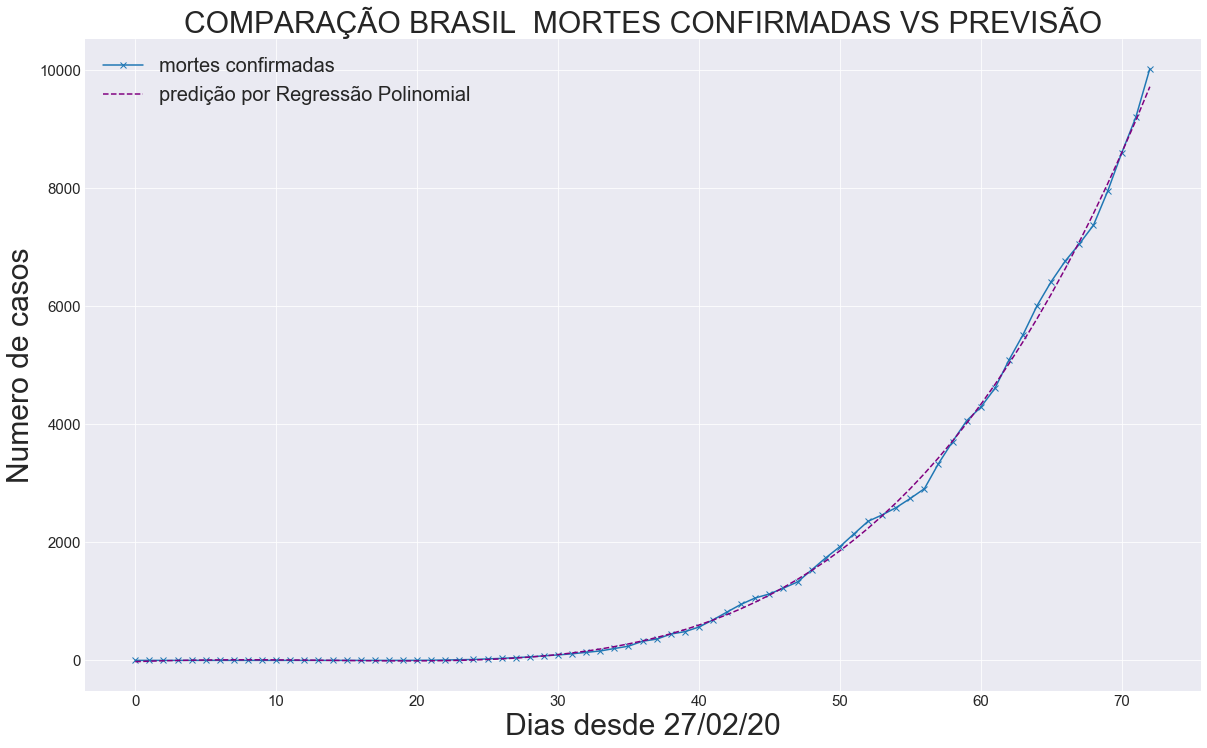

In [101]:
plt.figure(figsize=(20, 12))
plt.plot(dias_brasil, mortes_brasil, marker='x')
plt.plot(futuro_brasil[0:len(dias_brasil)], pred_mortes_br[0:len(mortes_brasil)], linestyle = 'dashed', color='purple')
plt.title('COMPARAÇÃO BRASIL  MORTES CONFIRMADAS VS PREVISÃO', size=30)
plt.xlabel('Dias desde 27/02/20', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['mortes confirmadas', 'predição por Regressão Polinomial'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [102]:
# predicao casos EUA
mlp = MLPRegressor(hidden_layer_sizes=(1000,1000,1000,1000),activation='relu',solver='lbfgs',max_iter=3000, shuffle=True)
print('fitting...')
mlp.fit(df_confirmados_eua, target_confirmado_eua)

fitting...


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(1000, 1000, 1000, 1000),
             learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
             max_iter=3000, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=None,
             shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
             verbose=False, warm_start=False)

In [0]:
pred_caso_eua = mlp.predict(futuro_eua)

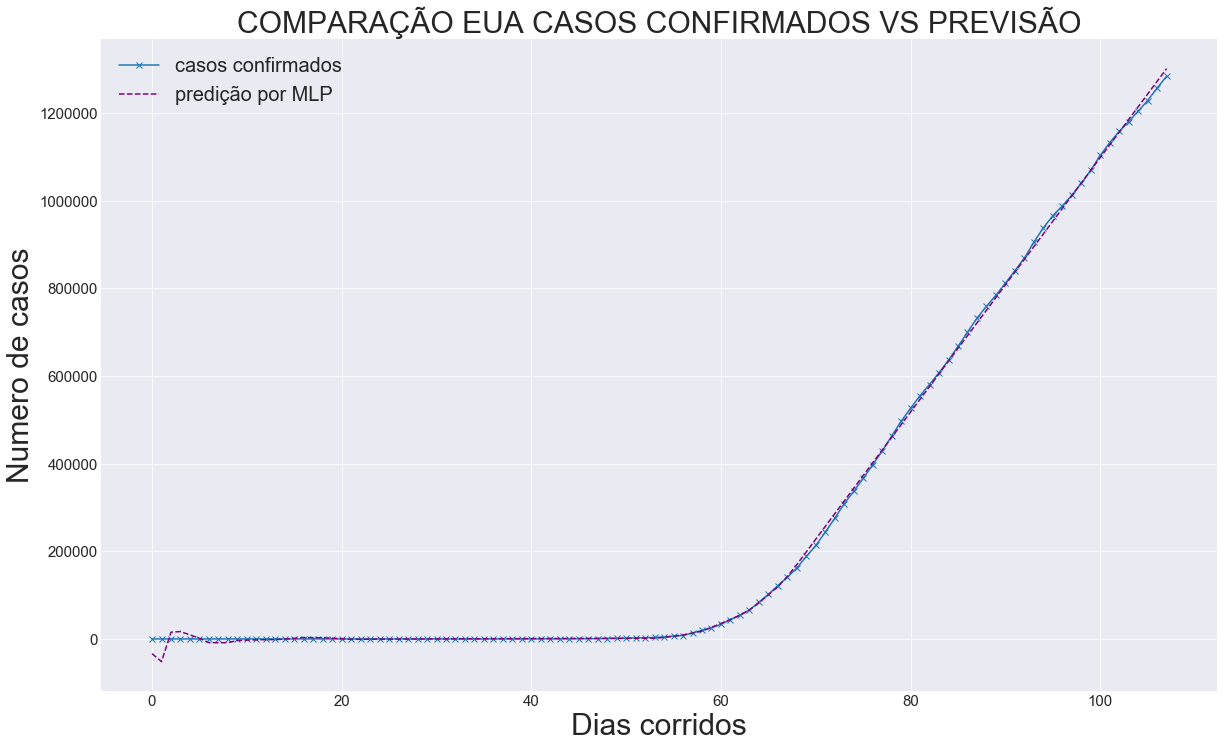

In [104]:
plt.figure(figsize=(20, 12))
plt.plot(dias_eua, casos_eua, marker='x')
plt.plot(futuro_eua[0:len(dias_eua)],pred_caso_eua[0:len(casos_eua)], linestyle = 'dashed', color='purple')
plt.title('COMPARAÇÃO EUA CASOS CONFIRMADOS VS PREVISÃO', size=30)
plt.xlabel('Dias corridos', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['casos confirmados', 'predição por MLP'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [105]:
mlp = MLPRegressor(hidden_layer_sizes=(1000,1000,1000,1000),activation='relu',solver='lbfgs',max_iter=3000, shuffle=True)
print('fitting...')
mlp.fit(df_mortes_eua, target_mortos_eua)

fitting...


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(1000, 1000, 1000, 1000),
             learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
             max_iter=3000, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=None,
             shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
             verbose=False, warm_start=False)

In [0]:
pred_mortes_eua = mlp.predict(futuro_eua)

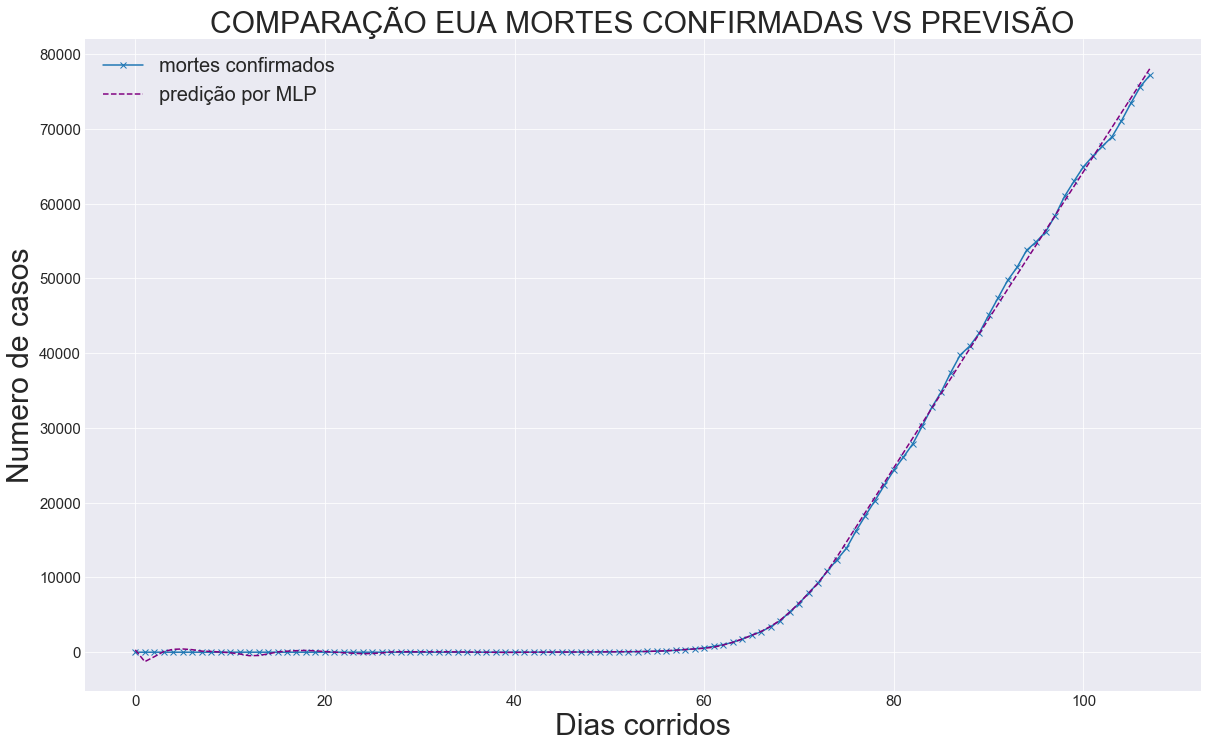

In [107]:
plt.figure(figsize=(20, 12))
plt.plot(dias_eua, mortes_eua, marker='x')
plt.plot(futuro_eua[0:len(dias_eua)],pred_mortes_eua[0:len(mortes_eua)], linestyle = 'dashed', color='purple')
plt.title('COMPARAÇÃO EUA MORTES CONFIRMADAS VS PREVISÃO', size=30)
plt.xlabel('Dias corridos', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['mortes confirmados', 'predição por MLP'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [108]:
# predicao casos ITALIA
mlp = MLPRegressor(hidden_layer_sizes=(1000,1000,1000,1000),activation='relu',solver='lbfgs',max_iter=30000, shuffle=True)
print('fitting...')
mlp.fit(df_confirmados_italia, target_confirmado_italia)

fitting...


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(1000, 1000, 1000, 1000),
             learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
             max_iter=30000, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=None,
             shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
             verbose=False, warm_start=False)

In [0]:
pred_caso_italia = mlp.predict(futuro_italia)

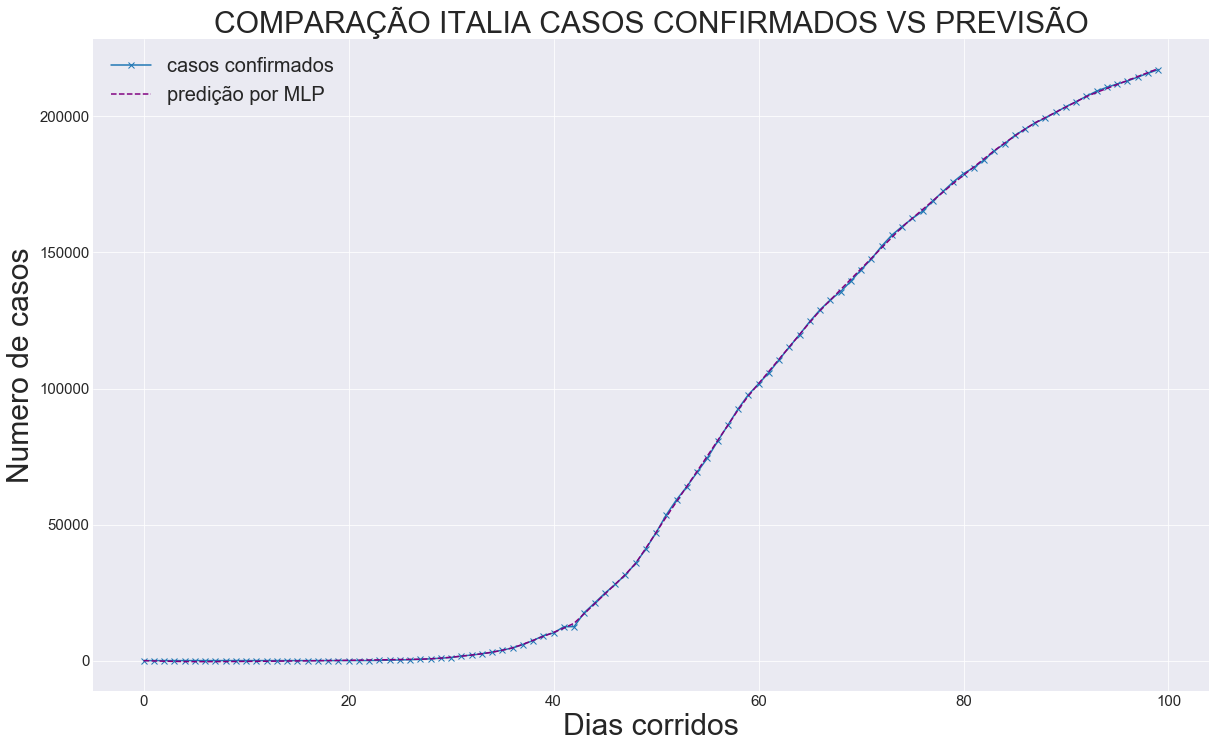

In [110]:
plt.figure(figsize=(20, 12))
plt.plot(dias_italia, casos_italia, marker='x')
plt.plot(futuro_italia[0:len(casos_italia)],pred_caso_italia[0:len(casos_italia)], linestyle = 'dashed', color='purple')
plt.title('COMPARAÇÃO ITALIA CASOS CONFIRMADOS VS PREVISÃO', size=30)
plt.xlabel('Dias corridos', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['casos confirmados', 'predição por MLP'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [111]:
#previsao morte italia
mlp = MLPRegressor(hidden_layer_sizes=(1000,1000,1000,1000),activation='relu',solver='lbfgs',max_iter=30000, shuffle=True)
print('fitting...')
mlp.fit(df_mortes_italia, target_mortos_italia)

fitting...


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(1000, 1000, 1000, 1000),
             learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
             max_iter=30000, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=None,
             shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
             verbose=False, warm_start=False)

In [0]:
pred_mortes_italia = mlp.predict(futuro_italia)

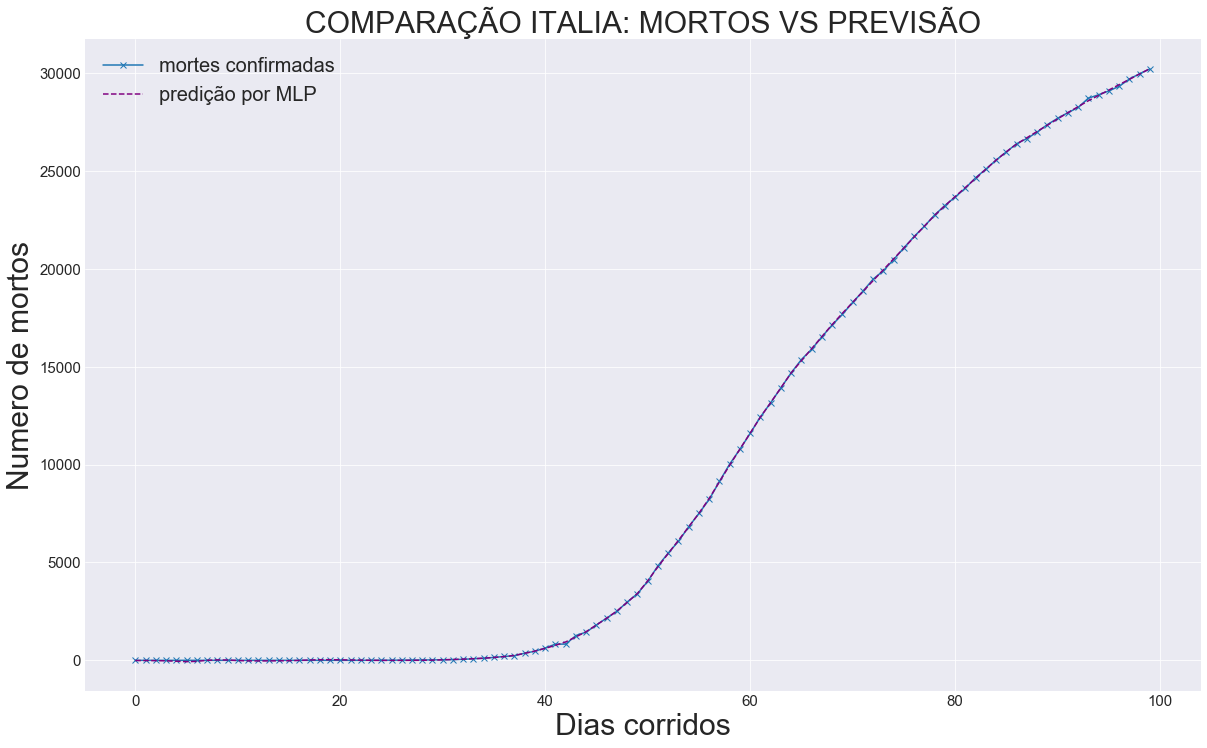

In [113]:
plt.figure(figsize=(20, 12))
plt.plot(dias_italia, mortes_italia, marker='x')
plt.plot(futuro_italia[0:len(mortes_italia)],pred_mortes_italia[0:len(mortes_italia)], linestyle = 'dashed', color='purple')
plt.title('COMPARAÇÃO ITALIA: MORTOS VS PREVISÃO', size=30)
plt.xlabel('Dias corridos', size = 30)
plt.ylabel('Numero de mortos', size = 30)
plt.legend(['mortes confirmadas', 'predição por MLP'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [114]:
mlp = MLPRegressor(hidden_layer_sizes=(1000,1000,1000,1000),activation='relu',solver='lbfgs',max_iter=3000, shuffle=True)
print('fitting...')
mlp.fit(df_confirmados_suecia, target_confirmado_suecia)

fitting...


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(1000, 1000, 1000, 1000),
             learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
             max_iter=3000, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=None,
             shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
             verbose=False, warm_start=False)

In [0]:
pred_caso_suecia = mlp.predict(futuro_suecia)

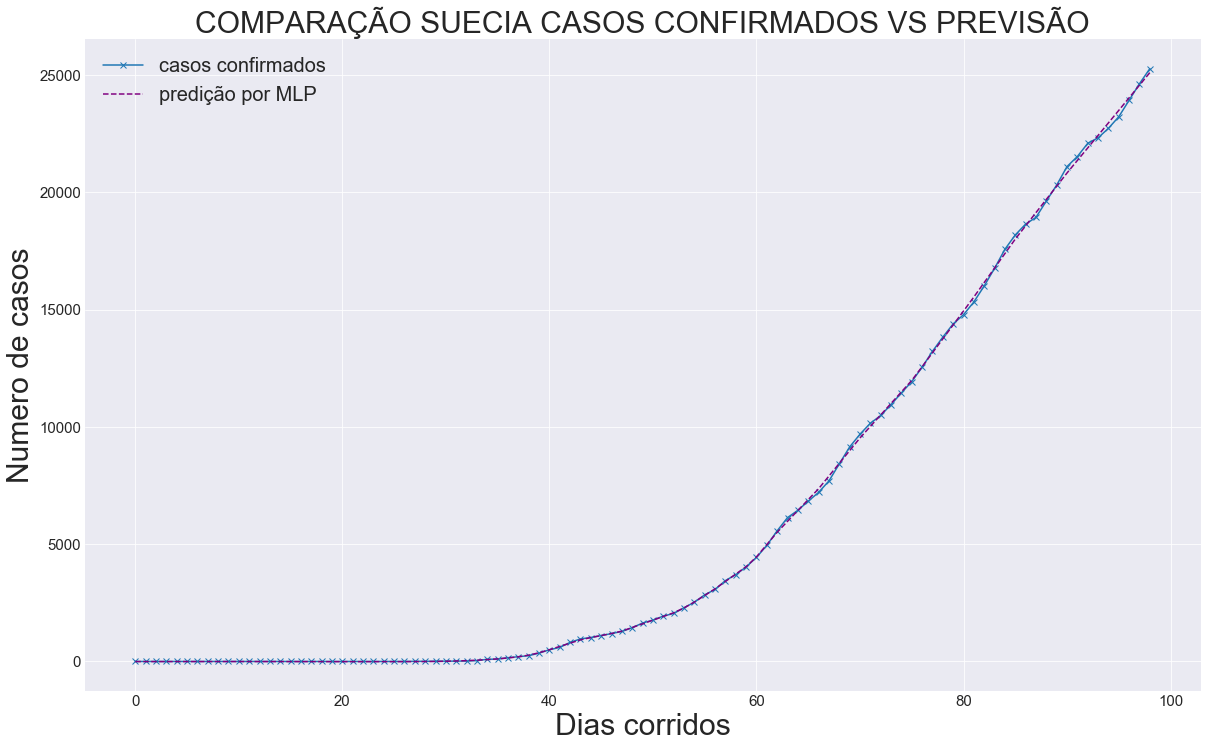

In [116]:
plt.figure(figsize=(20, 12))
plt.plot(dias_suecia, casos_suecia, marker='x')
plt.plot(futuro_suecia[0:len(dias_suecia)], pred_caso_suecia[0:len(casos_suecia)], linestyle = 'dashed', color='purple')
plt.title('COMPARAÇÃO SUECIA CASOS CONFIRMADOS VS PREVISÃO', size=30)
plt.xlabel('Dias corridos', size = 30)
plt.ylabel('Numero de casos', size = 30)
plt.legend(['casos confirmados', 'predição por MLP'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


In [117]:
mlp = MLPRegressor(hidden_layer_sizes=(1000,1000,1000,1000),activation='relu',solver='lbfgs',max_iter=3000, shuffle=True)
print('fitting...')
mlp.fit(df_mortes_suecia, target_mortos_suecia)

fitting...


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(1000, 1000, 1000, 1000),
             learning_rate='constant', learning_rate_init=0.001, max_fun=15000,
             max_iter=3000, momentum=0.9, n_iter_no_change=10,
             nesterovs_momentum=True, power_t=0.5, random_state=None,
             shuffle=True, solver='lbfgs', tol=0.0001, validation_fraction=0.1,
             verbose=False, warm_start=False)

In [0]:
pred_mortes_suecia = mlp.predict(futuro_suecia)

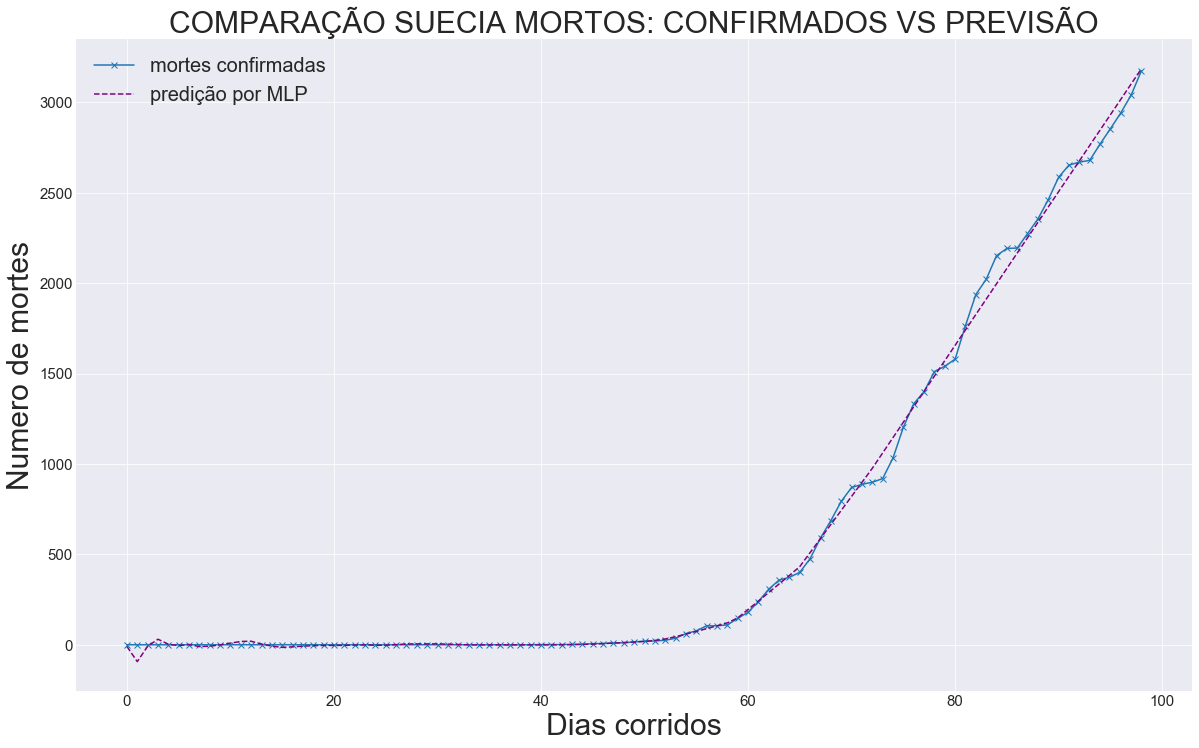

In [119]:
plt.figure(figsize=(20, 12))
plt.plot(dias_suecia, mortes_suecia,marker='x')
plt.plot(futuro_suecia[0:len(dias_suecia)],pred_mortes_suecia[0:len(mortes_suecia)], linestyle = 'dashed', color='purple')
plt.title('COMPARAÇÃO SUECIA MORTOS: CONFIRMADOS VS PREVISÃO', size=30)
plt.xlabel('Dias corridos', size = 30)
plt.ylabel('Numero de mortes', size = 30)
plt.legend(['mortes confirmadas', 'predição por MLP'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


# Apresentação dos resultados das previsões

Nesta secao construiremos 8 dataframes(tabelas), um de casos confirmados e um de mortes para cada pais. Nesses dataframes nos teremos os casos oficiais e os que nosso programa previu, e ele sera atualizado diretamente.
Alem desses dataframes iremos refazer os graficos feitos na secao de graficos, porem agora com as previsoes, para ver se o cenario dos paises mudam em relaçao um ao outro 

Abaixo a media de erro de nossa previsao para os casos 
confirmados do  brasil e a tabela com as previsoes, casos reais e a diferenca entre os dois.
por se tratar de previsoes, ha tabelas que nao ha diferencas ainda, pois nosso programa preve 40 dias a frente. 
ordem das tabelas:


1.  Confirmados Brasil
2.  Mortos Brasil
3.  Confirmados EUA
4.  Mortos EUA
5.  Confirmados Italia
6.  Mortos Italia
7.  Confirmados Suecia
8.  Mortos Suecia











In [0]:
index = ['previsoes', 'real', 'diferenca percentual', 'diferenca bruta']
pd.set_option('display.max_columns', 250)

In [0]:
colunas =[i for i in datas_futuras_br]
previsto = [round(i, 0) for i in pred_caso_br]
diferenca =[int(p) - int(r) for p,r in zip(pred_caso_br, casos_brasil)]
diferenca_percentual = [(int(p) / int(r))*100 if r != 0 else 0 for p,r in zip(diferenca, casos_brasil) ]
diferenca_percentual = [round(m, 2) for m in diferenca_percentual]
diferenca_percentual_formatada = [f'{i}%' for i in diferenca_percentual]
df_caso_br = pd.DataFrame([previsto[40:], casos_brasil[40:], diferenca_percentual_formatada[40:], diferenca[40:]],
                          columns=colunas[40:], index = index)


In [122]:
diferenca = np.array(diferenca[40:])
diferenca_percentual = np.array(diferenca_percentual[40:])
print(f"A media de erro bruto para casos confirmados no Brasil eh: {round(np.absolute(diferenca).mean(), 0 )}")
print(f'A media de erro percentual para casos confirmados no Brasil eh: {round(np.absolute(diferenca_percentual).mean(), 2)}%')

A media de erro bruto para casos confirmados no Brasil eh: 1013.0
A media de erro percentual para casos confirmados no Brasil eh: 2.14%


In [123]:
print('CASOS CONFIRMADOS PARA O BRASIL: ')
pd.set_option('display.max_columns', 250)
df_caso_br

CASOS CONFIRMADOS PARA O BRASIL: 


04/06/20 04/07/20 04/08/20 04/09/20 04/10/20 04/11/20  \
previsoes               12687    13992    15383    16866    18447    20130   
real                    12161    14034    16170    18092    19638    20727   
diferenca percentual    4.33%   -0.31%   -4.87%   -6.78%   -6.07%   -2.89%   
diferenca bruta           526      -43     -787    -1226    -1192     -598   

                     04/12/20 04/13/20 04/14/20 04/15/20 04/16/20 04/17/20  \
previsoes               21922    23830    25862    28025    30328    32781   
real                    22192    23430    25262    28320    30425    33682   
diferenca percentual   -1.22%    1.71%    2.37%   -1.05%   -0.32%   -2.68%   
diferenca bruta          -271      400      599     -296      -97     -902   

                     04/18/20 04/19/20 04/20/20 04/21/20 04/22/20 04/23/20  \
previsoes               35393    38175    41138    44296    47660    51246   
real                    36658    38654    40743    43079    45757    50036   
diferenca percentual   -3.45%   -1.24%    0.97%    2.82%    4.16%    2.42%   
diferenca bruta         -1266     -480      395     1216     1903     1209   

                     04/24/20 04/25/20 04/26/20 04/27/20 04/28/20 04/29/20  \
previsoes               55067    59140    63481    68108    73040    78296   
real                    54043    59324    63100    67446    73235    79685   
diferenca percentual    1.89%   -0.31%     0.6%    0.98%   -0.27%   -1.74%   
diferenca bruta          1024     -184      381      662     -196    -1390   

                     04/30/20 05/01/20 05/02/20 05/03/20 05/04/20 05/05/20  \
previsoes               83896    89864    96221   102993   110203   117880   
real                    87187    92202    97100   101826   108620   115455   
diferenca percentual   -3.77%   -2.54%   -0.91%    1.15%    1.46%     2.1%   
diferenca bruta         -3291    -2338     -879     1166     1583     2424   

                     05/06/20 05/07/20 05/08/20  05/09/20  05/10/20  05/11/20  \
previsoes              126050   134742   143987  153817.0  164265.0  175365.0   
real                   126611   135773   146894       NaN       NaN       NaN   
diferenca percentual   -0.44%   -0.76%   -1.98%       NaN       NaN       NaN   
diferenca bruta          -562    -1031    -2907       NaN       NaN       NaN   

                      05/12/20  05/13/20  05/14/20  05/15/20  05/16/20  \
previsoes             187152.0  199665.0  212942.0  227023.0  241951.0   
real                       NaN       NaN       NaN       NaN       NaN   
diferenca percentual       NaN       NaN       NaN       NaN       NaN   
diferenca bruta            NaN       NaN       NaN       NaN       NaN   

                      05/17/20  05/18/20  05/19/20  05/20/20  05/21/20  \
previsoes             257769.0  274521.0  292255.0  311019.0  330863.0   
real                       NaN       NaN       NaN       NaN       NaN   
diferenca percentual       NaN       NaN       NaN       NaN       NaN   
diferenca bruta            NaN       NaN       NaN       NaN       NaN   

                      05/22/20  05/23/20  05/24/20  05/25/20  05/26/20  \
previsoes             351839.0  374000.0  397402.0  422103.0  448160.0   
real                       NaN       NaN       NaN       NaN       NaN   
diferenca percentual       NaN       NaN       NaN       NaN       NaN   
diferenca bruta            NaN       NaN       NaN       NaN       NaN   

                      05/27/20  05/28/20  05/29/20  05/30/20  05/31/20  \
previsoes             475635.0  504591.0  535093.0  567207.0  601003.0   
real                       NaN       NaN       NaN       NaN       NaN   
diferenca percentual       NaN       NaN       NaN       NaN       NaN   
diferenca bruta            NaN       NaN       NaN       NaN       NaN   

                      06/01/20  06/02/20  06/03/20  06/04/20  06/05/20  \
previsoes             636550.0  673922.0  713194.0  754443.0  797749.0   
real                       N

In [0]:
colunas =[i for i in datas_futuras_br]
previsto = [round(i, 0)  for i in pred_mortes_br]
diferenca =[int(p) - int(r) for p,r in zip(pred_mortes_br, mortes_brasil)]
diferenca_percentual = [(int(p) / int(r))*100 if r != 0 else 0 for p,r in zip(diferenca, mortes_brasil)]
diferenca_percentual = [round(m, 2) for m in diferenca_percentual]
diferenca_percentual_formatada = [f'{i}%' for i in diferenca_percentual]
df_morto_br = pd.DataFrame([previsto[40:], mortes_brasil[40:], diferenca_percentual_formatada[40:], diferenca[40:]], columns=colunas[40:], index = index)


In [125]:
diferenca = np.array(diferenca[40:])
diferenca_percentual = np.array(diferenca_percentual[40:])
print(f'A media de erro bruto para mortes no Brasil eh: {round(np.absolute(diferenca).mean(), 0)}')
print(f'A media de erro percentual mortes no Brasil eh: {round (np.absolute(diferenca_percentual).mean() , 2)}%')

A media de erro bruto para mortes no Brasil eh: 88.0
A media de erro percentual mortes no Brasil eh: 2.9%


In [126]:
print('MORTES PARA O BRASIL: ')
df_morto_br

MORTES PARA O BRASIL: 


04/06/20 04/07/20 04/08/20 04/09/20 04/10/20 04/11/20  \
previsoes                 598      682      775      876      986     1105   
real                      564      686      819      950     1057     1124   
diferenca percentual    5.85%   -0.58%   -5.37%   -7.79%   -6.81%   -1.78%   
diferenca bruta            33       -4      -44      -74      -72      -20   

                     04/12/20 04/13/20 04/14/20 04/15/20 04/16/20 04/17/20  \
previsoes                1234     1372     1522     1682     1855     2039   
real                     1223     1328     1532     1736     1924     2141   
diferenca percentual    0.82%    3.31%   -0.72%   -3.11%   -3.64%   -4.81%   
diferenca bruta            10       44      -11      -54      -70     -103   

                     04/18/20 04/19/20 04/20/20 04/21/20 04/22/20 04/23/20  \
previsoes                2236     2446     2670     2908     3161     3429   
real                     2354     2462     2587     2741     2906     3331   
diferenca percentual   -5.06%   -0.69%    3.17%    6.06%    8.74%    2.94%   
diferenca bruta          -119      -17       82      166      254       98   

                     04/24/20 04/25/20 04/26/20 04/27/20 04/28/20 04/29/20  \
previsoes                3713     4014     4332     4667     5021     5394   
real                     3704     4057     4286     4603     5083     5513   
diferenca percentual    0.24%   -1.08%    1.05%    1.39%   -1.22%   -2.16%   
diferenca bruta             9      -44       45       64      -62     -119   

                     04/30/20 05/01/20 05/02/20 05/03/20 05/04/20 05/05/20  \
previsoes                5787     6199     6633     7088     7565     8066   
real                     6006     6412     6761     7051     7367     7938   
diferenca percentual   -3.66%   -3.32%   -1.91%    0.52%    2.69%     1.6%   
diferenca bruta          -220     -213     -129       37      198      127   

                     05/06/20 05/07/20 05/08/20  05/09/20  05/10/20  05/11/20  \
previsoes                8590     9138     9711   10310.0   10935.0   11588.0   
real                     8588     9190    10017       NaN       NaN       NaN   
diferenca percentual    0.01%   -0.58%   -3.06%       NaN       NaN       NaN   
diferenca bruta             1      -53     -307       NaN       NaN       NaN   

                      05/12/20  05/13/20  05/14/20  05/15/20  05/16/20  \
previsoes              12268.0   12978.0   13716.0   14485.0   15285.0   
real                       NaN       NaN       NaN       NaN       NaN   
diferenca percentual       NaN       NaN       NaN       NaN       NaN   
diferenca bruta            NaN       NaN       NaN       NaN       NaN   

                      05/17/20  05/18/20  05/19/20  05/20/20  05/21/20  \
previsoes              16117.0   16982.0   17880.0   18812.0   19779.0   
real                       NaN       NaN       NaN       NaN       NaN   
diferenca percentual       NaN       NaN       NaN       NaN       NaN   
diferenca bruta            NaN       NaN       NaN       NaN       NaN   

                      05/22/20  05/23/20  05/24/20  05/25/20  05/26/20  \
previsoes              20783.0   21823.0   22901.0   24018.0   25174.0   
real                       NaN       NaN       NaN       NaN       NaN   
diferenca percentual       NaN       NaN       NaN       NaN       NaN   
diferenca bruta            NaN       NaN       NaN       NaN       NaN   

                      05/27/20  05/28/20  05/29/20  05/30/20  05/31/20  \
previsoes              26370.0   27608.0   28888.0   30211.0   31578.0   
real                       NaN       NaN       NaN       NaN       NaN   
diferenca percentual       NaN       NaN       NaN       NaN       NaN   
diferenca bruta            NaN       NaN       NaN       NaN       NaN   

                      06/01/20  06/02/20  06/03/20  06/04/20  06/05/20  \
previsoes              32990.0   34448.0   35953.0   37506.0   39107.0   
real                       N

In [0]:
colunas =[i for i in datas_futuras_us]
previsto = [round(i, 0) for i in pred_caso_eua]
diferenca =[int(p) - int(r) for p,r in zip(pred_caso_eua, casos_eua)]
diferenca_percentual = [(int(p) / int(r))*100 if r !=0 else 0 for p,r in zip(diferenca, casos_eua)]
diferenca_percentual = [round(m, 2) for m in diferenca_percentual]
diferenca_percentual_formatada = [f'{i}%' for i in diferenca_percentual]
df_caso_eua = pd.DataFrame([previsto[75:], casos_eua[75:], diferenca_percentual_formatada[75:], diferenca[75:]],
                           columns=colunas[75:], index = index)


In [128]:
diferenca = np.array(diferenca[75:])
diferenca_percentual = np.array(diferenca_percentual[75:])
print(f'A media de erro bruto para casos confirmados nos EUA eh: {round(np.absolute(diferenca).mean(), 0 )}')
print(f'A media de erro percentual para casos confirmados nos EUA eh: {round(np.absolute(diferenca_percentual).mean(), 2)}%')

A media de erro bruto para casos confirmados nos EUA eh: 6600.0
A media de erro percentual para casos confirmados nos EUA eh: 0.84%


In [129]:
print('CASOS CONFIRMADOS PARA OS ESTADOS UNIDOS: ')
df_caso_eua

CASOS CONFIRMADOS PARA OS ESTADOS UNIDOS: 


04/06/20 04/07/20 04/08/20 04/09/20 04/10/20 04/11/20  \
previsoes              372758   401780   430801   459822   488844   517865   
real                   366317   397121   428654   462780   496535   526396   
diferenca percentual    1.76%    1.17%     0.5%   -0.64%   -1.55%   -1.62%   
diferenca bruta          6441     4658     2146    -2958    -7692    -8531   

                     04/12/20 04/13/20 04/14/20 04/15/20 04/16/20 04/17/20  \
previsoes              546886   575908   604929   633951   662972   691993   
real                   555313   580619   607670   636350   667592   699706   
diferenca percentual   -1.52%   -0.81%   -0.45%   -0.38%   -0.69%    -1.1%   
diferenca bruta         -8427    -4712    -2741    -2400    -4620    -7713   

                     04/18/20 04/19/20 04/20/20 04/21/20 04/22/20 04/23/20  \
previsoes              721015   750036   779058   808079   837100   866122   
real                   732197   758809   784326   811865   840351   869170   
diferenca percentual   -1.53%   -1.16%   -0.67%   -0.47%   -0.39%   -0.35%   
diferenca bruta        -11183    -8773    -5269    -3787    -3251    -3049   

                     04/24/20 04/25/20 04/26/20 04/27/20     04/28/20  \
previsoes              895143   924164   953186   982207  1.01123e+06   
real                   905358   938154   965785   988197      1012582   
diferenca percentual   -1.13%   -1.49%    -1.3%   -0.61%       -0.13%   
diferenca bruta        -10215   -13990   -12600    -5990        -1354   

                         04/29/20     04/30/20     05/01/20     05/02/20  \
previsoes             1.04025e+06  1.06927e+06  1.09829e+06  1.12731e+06   
real                      1039909      1069424      1103461      1132539   
diferenca percentual        0.03%       -0.01%       -0.47%       -0.46%   
diferenca bruta               341         -153        -5169        -5225   

                         05/03/20     05/04/20     05/05/20    05/06/20  \
previsoes             1.15634e+06  1.18536e+06  1.21438e+06  1.2434e+06   
real                      1158040      1180375      1204351     1228603   
diferenca percentual       -0.15%        0.42%        0.83%        1.2%   
diferenca bruta             -1705         4981        10027       14796   

                         05/07/20     05/08/20   05/09/20   05/10/20  \
previsoes             1.27242e+06  1.30144e+06  1330480.0  1359612.0   
real                      1257023      1283929        NaN        NaN   
diferenca percentual        1.22%        1.36%        NaN        NaN   
diferenca bruta             15398        17513        NaN        NaN   

                       05/11/20   05/12/20   05/13/20   05/14/20   05/15/20  \
previsoes             1388745.0  1417877.0  1447009.0  1476141.0  1505273.0   
real                        NaN        NaN        NaN        NaN        NaN   
diferenca percentual        NaN        NaN        NaN        NaN        NaN   
diferenca bruta             NaN        NaN        NaN        NaN        NaN   

                       05/16/20   05/17/20   05/18/20   05/19/20   05/20/20  \
previsoes             1534406.0  1563538.0  1592670.0  1621802.0  1650934.0   
real                        NaN        NaN        NaN        NaN        NaN   
diferenca percentual        NaN        NaN        NaN        NaN        NaN   
diferenca bruta             NaN        NaN        NaN        NaN        NaN   

                       05/21/20   05/22/20   05/23/20   05/24/20   05/25/20  \
previsoes             1680067.0  1709199.0  1738331.0  1767463.0  1796595.0   
real                        NaN        NaN        NaN        NaN        NaN   
diferenca percentual        NaN        NaN        NaN        NaN        NaN   
diferenca bruta             NaN        NaN        NaN        NaN        NaN   

                       05/26/20   05/27/20   05/28/20   05/29/20   05/30/20  \
previsoes             1825728.0  1854860.0  1883992.0  1913124.0  1942256.0   
real              

In [0]:
colunas =[i for i in datas_futuras_us]
previsto = [round(i, 0) for i in pred_mortes_eua]
diferenca =[int(p) - int(r) for p,r in zip(pred_mortes_eua, mortes_eua)]
diferenca_percentual = [(int(p) / int(r))*100 if r !=0 else 0 for p,r in zip(diferenca, mortes_eua)]
diferenca_percentual = [round(m, 2) for m in diferenca_percentual]
diferenca_percentual_formatada = [f'{i}%' for i in diferenca_percentual]
df_morto_eua = pd.DataFrame([previsto[75:], mortes_eua[75:], diferenca_percentual_formatada[75:], diferenca[75:]], 
                            columns=colunas[75:], index = index)


In [131]:
diferenca = np.array(diferenca[75:])
diferenca_percentual = np.array(diferenca_percentual[75:])
print(f'A media de erro bruto para mortes nos EUA eh: {round(np.absolute(diferenca).mean(), 0)}')
print(f'A media de erro percentual mortes nos EUA eh: {round(np.absolute(diferenca_percentual).mean(), 2)}%')

A media de erro bruto para mortes nos EUA eh: 601.0
A media de erro percentual mortes nos EUA eh: 1.55%


In [132]:
print('MORTES PARA OS ESTADOS UNIDOS: ')
df_morto_eua

MORTES PARA OS ESTADOS UNIDOS: 


04/06/20 04/07/20 04/08/20 04/09/20 04/10/20 04/11/20  \
previsoes               14732    16721    18710    20699    22688    24677   
real                    13894    16191    18270    20255    22333    24342   
diferenca percentual    6.03%    3.27%    2.41%    2.19%    1.59%    1.38%   
diferenca bruta           838      530      440      444      355      335   

                     04/12/20 04/13/20 04/14/20 04/15/20 04/16/20 04/17/20  \
previsoes               26666    28655    30644    32633    34622    36611   
real                    26086    27870    30262    32734    34827    37411   
diferenca percentual    2.22%    2.82%    1.26%   -0.31%   -0.59%   -2.14%   
diferenca bruta           580      785      381     -102     -206     -801   

                     04/18/20 04/19/20 04/20/20 04/21/20 04/22/20 04/23/20  \
previsoes               38600    40589    42578    44567    46556    48544   
real                    39753    40945    42659    45086    47412    49724   
diferenca percentual    -2.9%   -0.87%   -0.19%   -1.15%   -1.81%   -2.37%   
diferenca bruta         -1154     -357      -82     -520     -857    -1180   

                     04/24/20 04/25/20 04/26/20 04/27/20 04/28/20 04/29/20  \
previsoes               50513    52480    54448    56415    58383    60350   
real                    51493    53755    54881    56219    58355    60967   
diferenca percentual   -1.91%   -2.37%   -0.79%    0.35%    0.05%   -1.01%   
diferenca bruta          -981    -1275     -434      196       27     -617   

                     04/30/20 05/01/20 05/02/20 05/03/20 05/04/20 05/05/20  \
previsoes               62318    64285    66253    68220    70188    72155   
real                    62996    64943    66369    67682    68922    71064   
diferenca percentual   -1.08%   -1.01%   -0.18%    0.79%    1.84%    1.54%   
diferenca bruta          -679     -658     -117      538     1265     1091   

                     05/06/20 05/07/20 05/08/20  05/09/20  05/10/20  05/11/20  \
previsoes               74123    76091    78058   80044.0   82046.0   84048.0   
real                    73431    75662    77180       NaN       NaN       NaN   
diferenca percentual    0.94%    0.57%    1.14%       NaN       NaN       NaN   
diferenca bruta           692      428      878       NaN       NaN       NaN   

                      05/12/20  05/13/20  05/14/20  05/15/20  05/16/20  \
previsoes              86109.0   88179.0   90250.0   92320.0   94390.0   
real                       NaN       NaN       NaN       NaN       NaN   
diferenca percentual       NaN       NaN       NaN       NaN       NaN   
diferenca bruta            NaN       NaN       NaN       NaN       NaN   

                      05/17/20  05/18/20  05/19/20  05/20/20  05/21/20  \
previsoes              96461.0   98531.0  100602.0  102672.0  104742.0   
real                       NaN       NaN       NaN       NaN       NaN   
diferenca percentual       NaN       NaN       NaN       NaN       NaN   
diferenca bruta            NaN       NaN       NaN       NaN       NaN   

                      05/22/20  05/23/20  05/24/20  05/25/20  05/26/20  \
previsoes             106813.0  108883.0  110954.0  113024.0  115095.0   
real                       NaN       NaN       NaN       NaN       NaN   
diferenca percentual       NaN       NaN       NaN       NaN       NaN   
diferenca bruta            NaN       NaN       NaN       NaN       NaN   

                      05/27/20  05/28/20  05/29/20  05/30/20  05/31/20  \
previsoes             117165.0  119236.0  121326.0  123424.0  125523.0   
real                       NaN       NaN       NaN       NaN       NaN   
diferenca percentual       NaN       NaN       NaN       NaN       NaN   
diferenca bruta            NaN       NaN       NaN       NaN       NaN   

                      06/01/20  06/02/20  06/03/20  06/04/20  06/05/20  \
previsoes             127621.0  129719.0  131817.0  133915.0  136020.0   
real                       N

In [0]:
colunas =[i for i in datas_futuras_it]
previsto = [round(i, 0) for i in pred_caso_italia]
diferenca =[int(p) - int(r) for p,r in zip(pred_caso_italia, casos_italia)]
diferenca_percentual = [(int(p) / int(r))*100 if r !=0 else 0 for p,r in zip(diferenca, casos_italia)]
diferenca_percentual = [round(m, 2) for m in diferenca_percentual]
diferenca_percentual_formatada = [f'{i}%' for i in diferenca_percentual]
df_caso_italia = pd.DataFrame([previsto[67:], casos_italia[67:], diferenca_percentual_formatada[67:], diferenca[67:]], 
                              columns=colunas[67:], index = index)

In [134]:
diferenca = np.array(diferenca[67:])
diferenca_percentual = np.array(diferenca_percentual[67:])
print(f'A media de erro bruto para casos confirmados na Italia eh: {round(np.absolute(diferenca).mean(), 0)}')
print(f'A media de erro percentual para casos confirmados na Italia eh: {round(np.absolute(diferenca_percentual).mean(), 2)}%')

A media de erro bruto para casos confirmados na Italia eh: 293.0
A media de erro percentual para casos confirmados na Italia eh: 0.17%


In [135]:
print('CASOS CONFIRMADOS PARA A ITALIA: ')
df_caso_italia

CASOS CONFIRMADOS PARA A ITALIA: 


04/06/20 04/07/20 04/08/20 04/09/20 04/10/20 04/11/20  \
previsoes              132487   136317   140153   143990   147827   151664   
real                   132547   135586   139422   143626   147577   152271   
diferenca percentual   -0.05%    0.54%    0.52%    0.25%    0.17%    -0.4%   
diferenca bruta           -61      730      731      364      250     -608   

                     04/12/20 04/13/20 04/14/20 04/15/20 04/16/20 04/17/20  \
previsoes              155501   159338   162558   165761   168964   172167   
real                   156363   159516   162488   165155   168941   172434   
diferenca percentual   -0.55%   -0.11%    0.04%    0.37%    0.01%   -0.15%   
diferenca bruta          -863     -179       69      605       23     -267   

                     04/18/20 04/19/20 04/20/20 04/21/20 04/22/20 04/23/20  \
previsoes              175370   178384   181398   184411   187425   190174   
real                   175925   178972   181228   183957   187327   189973   
diferenca percentual   -0.32%   -0.33%    0.09%    0.25%    0.05%    0.11%   
diferenca bruta          -555     -589      169      454       98      201   

                     04/24/20 04/25/20 04/26/20 04/27/20 04/28/20 04/29/20  \
previsoes              192791   195350   197693   199620   201548   203476   
real                   192994   195351   197675   199414   201505   203591   
diferenca percentual   -0.11%    -0.0%    0.01%     0.1%    0.02%   -0.06%   
diferenca bruta          -203       -2       17      206       43     -116   

                     04/30/20 05/01/20 05/02/20 05/03/20 05/04/20 05/05/20  \
previsoes              205403   207331   208849   210302   211755   213208   
real                   205463   207428   209328   210717   211938   213013   
diferenca percentual   -0.03%   -0.05%   -0.23%    -0.2%   -0.09%    0.09%   
diferenca bruta           -60      -97     -480     -415     -183      195   

                     05/06/20 05/07/20 05/08/20  05/09/20  05/10/20  05/11/20  \
previsoes              214662   216115   217568  219022.0  220482.0  221941.0   
real                   214457   215858   217185       NaN       NaN       NaN   
diferenca percentual     0.1%    0.12%    0.18%       NaN       NaN       NaN   
diferenca bruta           204      256      382       NaN       NaN       NaN   

                      05/12/20  05/13/20  05/14/20  05/15/20  05/16/20  \
previsoes             223400.0  224850.0  226299.0  227748.0  229198.0   
real                       NaN       NaN       NaN       NaN       NaN   
diferenca percentual       NaN       NaN       NaN       NaN       NaN   
diferenca bruta            NaN       NaN       NaN       NaN       NaN   

                      05/17/20  05/18/20  05/19/20  05/20/20  05/21/20  \
previsoes             230648.0  232098.0  233555.0  235018.0  236481.0   
real                       NaN       NaN       NaN       NaN       NaN   
diferenca percentual       NaN       NaN       NaN       NaN       NaN   
diferenca bruta            NaN       NaN       NaN       NaN       NaN   

                      05/22/20  05/23/20  05/24/20  05/25/20  05/26/20  \
previsoes             237944.0  239407.0  240870.0  242333.0  243798.0   
real                       NaN       NaN       NaN       NaN       NaN   
diferenca percentual       NaN       NaN       NaN       NaN       NaN   
diferenca bruta            NaN       NaN       NaN       NaN       NaN   

                      05/27/20  05/28/20  05/29/20  05/30/20  05/31/20  \
previsoes             245262.0  246727.0  248193.0  249658.0  251124.0   
real                       NaN       NaN       NaN       NaN       NaN   
diferenca percentual       NaN       NaN       NaN       NaN       NaN   
diferenca bruta            NaN       NaN       NaN       NaN       NaN   

                      06/01/20  06/02/20  06/03/20  06/04/20  06/05/20  \
previsoes             252590.0  254056.0  255526.0  256997.0  258470.0   
real                       N

In [0]:
colunas =[i for i in datas_futuras_it]
previsto = [round(i, 0) for i in pred_mortes_italia]
diferenca =[int(p) - int(r) for p,r in zip(pred_mortes_italia, mortes_italia)]
diferenca_percentual = [(int(p) / int(r))*100 if r !=0 else 0 for p,r in zip(diferenca, mortes_italia)]
diferenca_percentual = [round(m, 2) for m in diferenca_percentual]
diferenca_percentual_formatada = [f'{i}%' for i in diferenca_percentual]
df_morto_italia = pd.DataFrame([previsto[67:], mortes_italia[67:], diferenca_percentual_formatada[67:], diferenca[67:]], 
                               columns=colunas[67:], index = index)

In [137]:
diferenca = np.array(diferenca[67:])
diferenca_percentual = np.array(diferenca_percentual[67:])
print(f'A media de erro bruto para mortes na Italia eh: {round(np.absolute(diferenca).mean() ,0)}')
print(f'A media de erro percentual mortes na Italia eh: {round(np.absolute(diferenca_percentual).mean(),2)}%')

A media de erro bruto para mortes na Italia eh: 29.0
A media de erro percentual mortes na Italia eh: 0.12%


In [138]:
print('MORTES CONFIRMADOS DA ITALIA: ')
df_morto_italia

MORTES CONFIRMADOS DA ITALIA: 


04/06/20 04/07/20 04/08/20 04/09/20 04/10/20 04/11/20  \
previsoes               16531    17146    17724    18280    18836    19392   
real                    16523    17127    17669    18279    18849    19468   
diferenca percentual    0.05%    0.11%    0.31%    0.01%   -0.07%    -0.4%   
diferenca bruta             8       18       55        1      -14      -77   

                     04/12/20 04/13/20 04/14/20 04/15/20 04/16/20 04/17/20  \
previsoes               19948    20504    21060    21616    22171    22727   
real                    19899    20465    21067    21645    22170    22745   
diferenca percentual    0.24%    0.19%   -0.04%   -0.14%     0.0%   -0.08%   
diferenca bruta            48       38       -8      -30        1      -18   

                     04/18/20 04/19/20 04/20/20 04/21/20 04/22/20 04/23/20  \
previsoes               23214    23681    24148    24615    25082    25548   
real                    23227    23660    24114    24648    25085    25549   
diferenca percentual   -0.06%    0.08%    0.14%   -0.13%   -0.01%   -0.01%   
diferenca bruta           -14       20       33      -33       -3       -2   

                     04/24/20 04/25/20 04/26/20 04/27/20 04/28/20 04/29/20  \
previsoes               25971    26365    26688    27009    27330    27650   
real                    25969    26384    26644    26977    27359    27682   
diferenca percentual     0.0%   -0.07%    0.16%    0.11%   -0.11%   -0.12%   
diferenca bruta             1      -19       43       31      -30      -33   

                     04/30/20 05/01/20 05/02/20 05/03/20 05/04/20 05/05/20  \
previsoes               27970    28275    28578    28851    29125    29398   
real                    27967    28236    28710    28884    29079    29315   
diferenca percentual    0.01%    0.14%   -0.46%   -0.11%    0.15%    0.28%   
diferenca bruta             2       39     -133      -33       45       83   

                     05/06/20 05/07/20 05/08/20  05/09/20  05/10/20  05/11/20  \
previsoes               29671    29945    30218   30492.0   30766.0   31042.0   
real                    29684    29958    30201       NaN       NaN       NaN   
diferenca percentual   -0.04%   -0.05%    0.06%       NaN       NaN       NaN   
diferenca bruta           -13      -14       17       NaN       NaN       NaN   

                      05/12/20  05/13/20  05/14/20  05/15/20  05/16/20  \
previsoes              31319.0   31596.0   31872.0   32147.0   32422.0   
real                       NaN       NaN       NaN       NaN       NaN   
diferenca percentual       NaN       NaN       NaN       NaN       NaN   
diferenca bruta            NaN       NaN       NaN       NaN       NaN   

                      05/17/20  05/18/20  05/19/20  05/20/20  05/21/20  \
previsoes              32697.0   32972.0   33247.0   33522.0   33798.0   
real                       NaN       NaN       NaN       NaN       NaN   
diferenca percentual       NaN       NaN       NaN       NaN       NaN   
diferenca bruta            NaN       NaN       NaN       NaN       NaN   

                      05/22/20  05/23/20  05/24/20  05/25/20  05/26/20  \
previsoes              34073.0   34348.0   34622.0   34897.0   35170.0   
real                       NaN       NaN       NaN       NaN       NaN   
diferenca percentual       NaN       NaN       NaN       NaN       NaN   
diferenca bruta            NaN       NaN       NaN       NaN       NaN   

                      05/27/20  05/28/20  05/29/20  05/30/20  05/31/20  \
previsoes              35444.0   35719.0   35993.0   36268.0   36543.0   
real                       NaN       NaN       NaN       NaN       NaN   
diferenca percentual       NaN       NaN       NaN       NaN       NaN   
diferenca bruta            NaN       NaN       NaN       NaN       NaN   

                      06/01/20  06/02/20  06/03/20  06/04/20  06/05/20  \
previsoes              36818.0   37092.0   37367.0   37642.0   37917.0   
real                       N

In [0]:
colunas =[i for i in datas_futuras_su]
previsto = [round(i, 0) for i in pred_caso_suecia]
diferenca =[int(p) - int(r) for p,r in zip(pred_caso_suecia, casos_suecia)]
diferenca_percentual = [(int(p) / int(r))*100 if r !=0 else 0 for p,r in zip(diferenca, casos_suecia)]
diferenca_percentual = [round(m, 2) for m in diferenca_percentual]
diferenca_percentual_formatada = [f'{i}%' for i in diferenca_percentual]
df_caso_suecia = pd.DataFrame([previsto[66:], casos_suecia[66:], diferenca_percentual_formatada[66:], diferenca[66:]],
                              columns=colunas[66:],  index = index)

In [140]:
diferenca = np.array(diferenca[66:])
diferenca_percentual = np.array(diferenca_percentual[66:])
print(f'A media de erro bruto para casos confirmados na Suecia eh: {round(np.absolute(diferenca).mean(), 0)}')
print(f'A media de erro percentual para casos confirmados na Suecia eh: {round(np.absolute(diferenca_percentual).mean(), 2)}%')

A media de erro bruto para casos confirmados na Suecia eh: 123.0
A media de erro percentual para casos confirmados na Suecia eh: 0.83%


In [141]:
print('CASOS CONFIRMADOS PARA A SUECIA: ')
df_caso_suecia

CASOS CONFIRMADOS PARA A SUECIA: 


04/06/20 04/07/20 04/08/20 04/09/20 04/10/20 04/11/20  \
previsoes                7361     7902     8443     8984     9525    10017   
real                     7206     7693     8419     9141     9685    10151   
diferenca percentual    2.15%     2.7%    0.29%   -1.72%   -1.65%   -1.33%   
diferenca bruta           155      208       24     -157     -160     -135   

                     04/12/20 04/13/20 04/14/20 04/15/20 04/16/20 04/17/20  \
previsoes               10507    10997    11487    11977    12560    13154   
real                    10483    10948    11445    11927    12540    13216   
diferenca percentual    0.22%    0.45%    0.37%    0.42%    0.15%   -0.48%   
diferenca bruta            23       49       42       50       19      -63   

                     04/18/20 04/19/20 04/20/20 04/21/20 04/22/20 04/23/20  \
previsoes               13747    14341    14935    15532    16149    16767   
real                    13822    14385    14777    15322    16004    16755   
diferenca percentual   -0.54%   -0.31%    1.06%    1.37%    0.91%    0.07%   
diferenca bruta           -75      -44      157      210      145       11   

                     04/24/20 04/25/20 04/26/20 04/27/20 04/28/20 04/29/20  \
previsoes               17384    18001    18566    19129    19692    20255   
real                    17567    18177    18640    18926    19621    20302   
diferenca percentual   -1.05%   -0.97%    -0.4%    1.07%    0.36%   -0.23%   
diferenca bruta          -184     -177      -74      203       71      -47   

                     04/30/20 05/01/20 05/02/20 05/03/20 05/04/20 05/05/20  \
previsoes               20818    21352    21886    22420    22954    23487   
real                    21092    21520    22082    22317    22721    23216   
diferenca percentual    -1.3%   -0.78%   -0.89%    0.46%    1.02%    1.17%   
diferenca bruta          -274     -168     -197      102      232      271   

                     05/06/20 05/07/20 05/08/20  05/09/20  05/10/20  05/11/20  \
previsoes               24024    24560    25097   25633.0   26169.0   26706.0   
real                    23918    24623    25265       NaN       NaN       NaN   
diferenca percentual    0.44%   -0.26%   -0.67%       NaN       NaN       NaN   
diferenca bruta           105      -63     -169       NaN       NaN       NaN   

                      05/12/20  05/13/20  05/14/20  05/15/20  05/16/20  \
previsoes              27242.0   27778.0   28315.0   28851.0   29384.0   
real                       NaN       NaN       NaN       NaN       NaN   
diferenca percentual       NaN       NaN       NaN       NaN       NaN   
diferenca bruta            NaN       NaN       NaN       NaN       NaN   

                      05/17/20  05/18/20  05/19/20  05/20/20  05/21/20  \
previsoes              29918.0   30451.0   30985.0   31519.0   32053.0   
real                       NaN       NaN       NaN       NaN       NaN   
diferenca percentual       NaN       NaN       NaN       NaN       NaN   
diferenca bruta            NaN       NaN       NaN       NaN       NaN   

                      05/22/20  05/23/20  05/24/20  05/25/20  05/26/20  \
previsoes              32587.0   33120.0   33653.0   34184.0   34712.0   
real                       NaN       NaN       NaN       NaN       NaN   
diferenca percentual       NaN       NaN       NaN       NaN       NaN   
diferenca bruta            NaN       NaN       NaN       NaN       NaN   

                      05/27/20  05/28/20  05/29/20  05/30/20  05/31/20  \
previsoes              35239.0   35766.0   36293.0   36821.0   37348.0   
real                       NaN       NaN       NaN       NaN       NaN   
diferenca percentual       NaN       NaN       NaN       NaN       NaN   
diferenca bruta            NaN       NaN       NaN       NaN       NaN   

                      06/01/20  06/02/20  06/03/20  06/04/20  06/05/20  \
previsoes              37875.0   38403.0   38930.0   39457.0   39985.0   
real                       N

In [0]:
colunas =[i for i in datas_futuras_su]
previsto = [round(i, 0) for i in pred_mortes_suecia]
diferenca =[int(p) - int(r) for p,r in zip(pred_mortes_suecia, mortes_suecia)]
diferenca_percentual = [(int(p) / int(r))*100 if r !=0 else 0 for p,r in zip(diferenca, mortes_suecia)]
diferenca_percentual = [round(m, 2) for m in diferenca_percentual]
diferenca_percentual_formatada = [f'{i}%' for i in diferenca_percentual]
df_morto_suecia = pd.DataFrame([previsto[66:], mortes_suecia[66:],  diferenca_percentual_formatada[66:], diferenca[66:]],
                               columns=colunas[66:], index = index)

In [143]:
diferenca = np.array(diferenca[66:])
diferenca_percentual = np.array(diferenca_percentual[66:])
print(f'A media de erro bruto para mortes na Suecia eh: {round(np.absolute(diferenca).mean(),0)}')
print(f'A media de erro percentual mortes na Suecia eh: {round(np.absolute(diferenca_percentual).mean(),2)}%')

A media de erro bruto para mortes na Suecia eh: 56.0
A media de erro percentual mortes na Suecia eh: 3.62%


In [144]:
print('MORTES SUECIA: ')
df_morto_suecia

MORTES SUECIA: 


04/06/20 04/07/20 04/08/20 04/09/20 04/10/20 04/11/20  \
previsoes                 510      588      666      743      821      898   
real                      477      591      687      793      870      887   
diferenca percentual    6.92%   -0.68%    -3.2%   -6.31%   -5.75%    1.24%   
diferenca bruta            33       -4      -22      -50      -50       11   

                     04/12/20 04/13/20 04/14/20 04/15/20 04/16/20 04/17/20  \
previsoes                 976     1061     1146     1231     1316     1401   
real                      899      919     1033     1203     1333     1400   
diferenca percentual    8.45%   15.34%   10.84%    2.24%   -1.35%    0.07%   
diferenca bruta            76      141      112       27      -18        1   

                     04/18/20 04/19/20 04/20/20 04/21/20 04/22/20 04/23/20  \
previsoes                1486     1571     1656     1741     1826     1911   
real                     1511     1540     1580     1765     1937     2021   
diferenca percentual   -1.65%    2.01%    4.81%   -1.36%   -5.73%   -5.44%   
diferenca bruta           -25       31       76      -24     -111     -110   

                     04/24/20 04/25/20 04/26/20 04/27/20 04/28/20 04/29/20  \
previsoes                1996     2081     2166     2251     2336     2421   
real                     2152     2192     2194     2274     2355     2462   
diferenca percentual   -7.25%   -5.06%   -1.28%   -1.01%   -0.81%   -1.67%   
diferenca bruta          -156     -111      -28      -23      -19      -41   

                     04/30/20 05/01/20 05/02/20 05/03/20 05/04/20 05/05/20  \
previsoes                2506     2591     2676     2761     2846     2931   
real                     2586     2653     2669     2679     2769     2854   
diferenca percentual   -3.09%   -2.34%    0.26%    3.06%    2.78%     2.7%   
diferenca bruta           -80      -62        7       82       77       77   

                     05/06/20 05/07/20 05/08/20  05/09/20  05/10/20  05/11/20  \
previsoes                3016     3101     3186    3271.0    3356.0    3441.0   
real                     2941     3040     3175       NaN       NaN       NaN   
diferenca percentual    2.55%    2.01%    0.35%       NaN       NaN       NaN   
diferenca bruta            75       61       11       NaN       NaN       NaN   

                      05/12/20  05/13/20  05/14/20  05/15/20  05/16/20  \
previsoes               3526.0    3611.0    3696.0    3781.0    3866.0   
real                       NaN       NaN       NaN       NaN       NaN   
diferenca percentual       NaN       NaN       NaN       NaN       NaN   
diferenca bruta            NaN       NaN       NaN       NaN       NaN   

                      05/17/20  05/18/20  05/19/20  05/20/20  05/21/20  \
previsoes               3951.0    4036.0    4121.0    4206.0    4291.0   
real                       NaN       NaN       NaN       NaN       NaN   
diferenca percentual       NaN       NaN       NaN       NaN       NaN   
diferenca bruta            NaN       NaN       NaN       NaN       NaN   

                      05/22/20  05/23/20  05/24/20  05/25/20  05/26/20  \
previsoes               4376.0    4461.0    4546.0    4632.0    4718.0   
real                       NaN       NaN       NaN       NaN       NaN   
diferenca percentual       NaN       NaN       NaN       NaN       NaN   
diferenca bruta            NaN       NaN       NaN       NaN       NaN   

                      05/27/20  05/28/20  05/29/20  05/30/20  05/31/20  \
previsoes               4804.0    4889.0    4975.0    5061.0    5147.0   
real                       NaN       NaN       NaN       NaN       NaN   
diferenca percentual       NaN       NaN       NaN       NaN       NaN   
diferenca bruta            NaN       NaN       NaN       NaN       NaN   

                      06/01/20  06/02/20  06/03/20  06/04/20  06/05/20  \
previsoes               5233.0    5319.0    5405.0    5491.0    5576.0   
real                       N

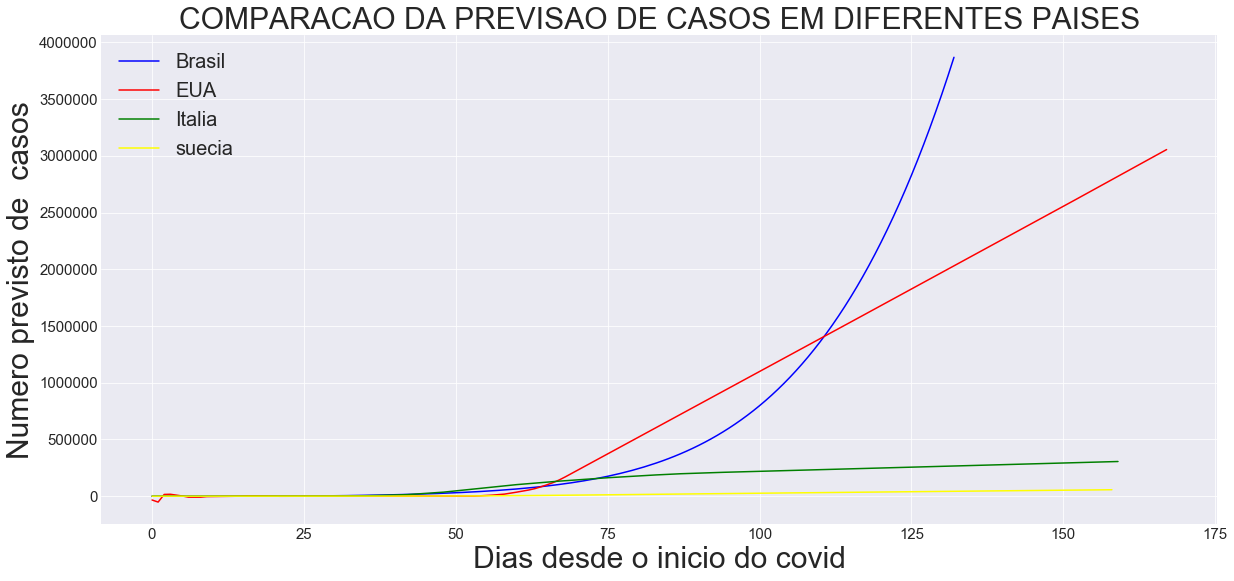

In [145]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_caso_br, color='blue')
plt.plot(futuro_eua, pred_caso_eua, color='red')
plt.plot(futuro_italia, pred_caso_italia, color='green')
plt.plot(futuro_suecia, pred_caso_suecia, color='yellow')

plt.title('COMPARACAO DA PREVISAO DE CASOS EM DIFERENTES PAISES', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero previsto de  casos', size = 30)
plt.legend(['Brasil', 'EUA','Italia', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


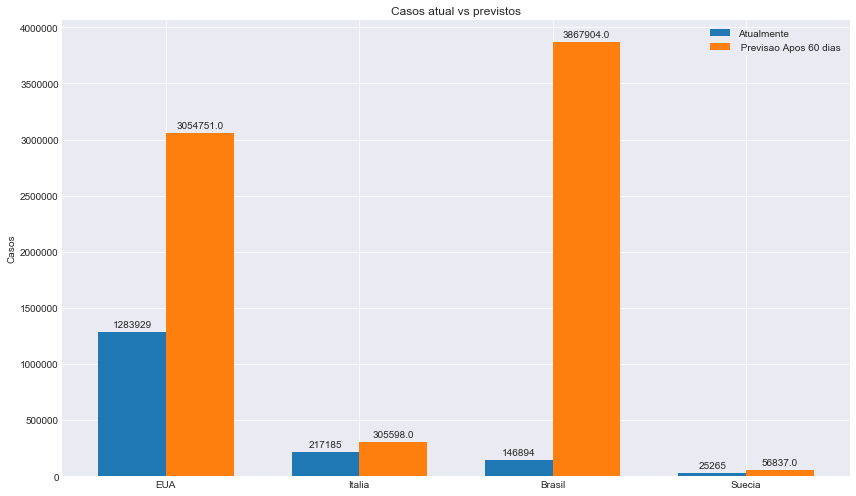

In [146]:
labels = ['EUA', 'Italia', 'Brasil', 'Suecia']
atualmente = [confirmados_eua,confirmados_italia,confirmados_brasil,confirmados_suecia]
apos_40 = [pred_caso_eua[-1], pred_caso_italia[-1], pred_caso_br[-1],  pred_caso_suecia[-1]]
apos_40 = [round(m, 0) for m in apos_40]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width/2, atualmente, width, label='Atualmente')
rects2 = ax.bar(x + width/2, apos_40, width, label=' Previsao Apos 60 dias')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Casos')
ax.set_title('Casos atual vs previstos')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

In [147]:
print('comparação previsao de casos nos 4 paises')
IPython.display.HTML('<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/2208057" data-url="https://flo.uri.sh/visualisation/2208057/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>')

comparação previsao de casos nos 4 paises


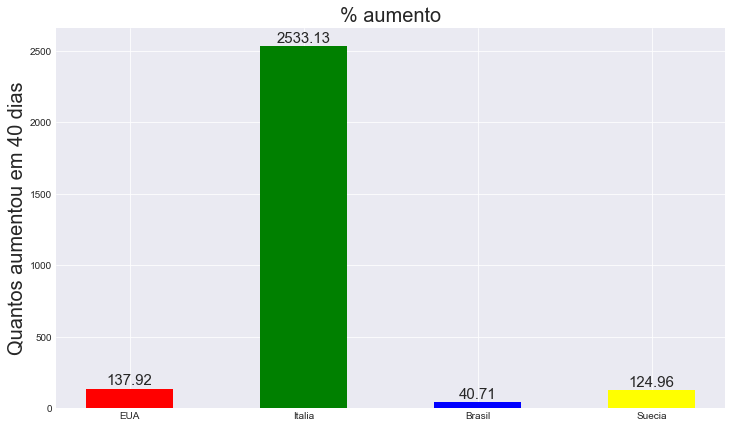

In [148]:
eua_porc = round(((pred_caso_eua[-1] - confirmados_eua)/ confirmados_eua)*100 , 2)
br_porc =  round(((pred_caso_br[-1] - confirmados_brasil)/ confirmados_brasil)*100, 2)
it_porc =  round(((pred_caso_italia[-1] - confirmados_italia)/ confirmados_italia)*100, 2)
su_porc =  round(((pred_caso_suecia[-1] - confirmados_suecia)/ confirmados_suecia)*100, 2)


fig = plt.figure(figsize=(12, 7))
paises = ['EUA', 'Italia', 'Brasil', 'Suecia']
numeros = [eua_porc,br_porc,it_porc,su_porc]
rects = plt.bar(paises,numeros, align='center', color=['red', 'green', 'blue', 'yellow'], width=0.5)

ax = rects.patches
for rect, label in zip(ax, numeros):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom', fontsize=15)
    
plt.ylabel('Quantos aumentou em 40 dias', size = 20)
plt.title('% aumento', size=20)
plt.show()


In [149]:
p1 = figure(plot_width=800, plot_height=550, title="Tragetoria Prevista para covid-19 logaritmica",
             y_axis_type="linear", x_range=(80,190))
p1.grid.grid_line_alpha=1
p1.ygrid.band_fill_color = "#4682B4"
p1.ygrid.band_fill_alpha = 0.1
p1.xaxis.axis_label = 'Dias Previstos'
p1.yaxis.axis_label = 'Progressao casos(escala logaritmica)'
p1.xaxis.minor_tick_line_width = 0


p1.line(np.squeeze(futuro_brasil)[40:], pred_caso_br[40:], color='#3E4CC3', 
        legend_label='Brasil', line_width=1)
p1.circle(futuro_brasil[-1], pred_caso_br[-1], fill_color="white", size=5)

p1.line(np.squeeze(futuro_eua)[75:], pred_caso_eua[75:], color='#F54138', 
        legend_label='Estados Unidos', line_width=1)
p1.circle(futuro_eua[-1], pred_caso_eua[-1], fill_color="white", size=5)


p1.line(np.squeeze(futuro_suecia)[66:], pred_caso_suecia[66:], color='#DBAE23', 
        legend_label='Suecia', line_width=1)
p1.circle(futuro_suecia[-1], pred_caso_suecia[-1], fill_color="white", size=5)


p1.line(np.squeeze(futuro_italia)[67:], pred_caso_italia[67:], color='#3EC358', 
        legend_label='Italia', line_width=1)
p1.circle(futuro_italia[-1], pred_caso_italia[-1], fill_color="white", size=5)



p1.legend.location = "bottom_right"
output_notebook()
show(p1)



Loading BokehJS ...

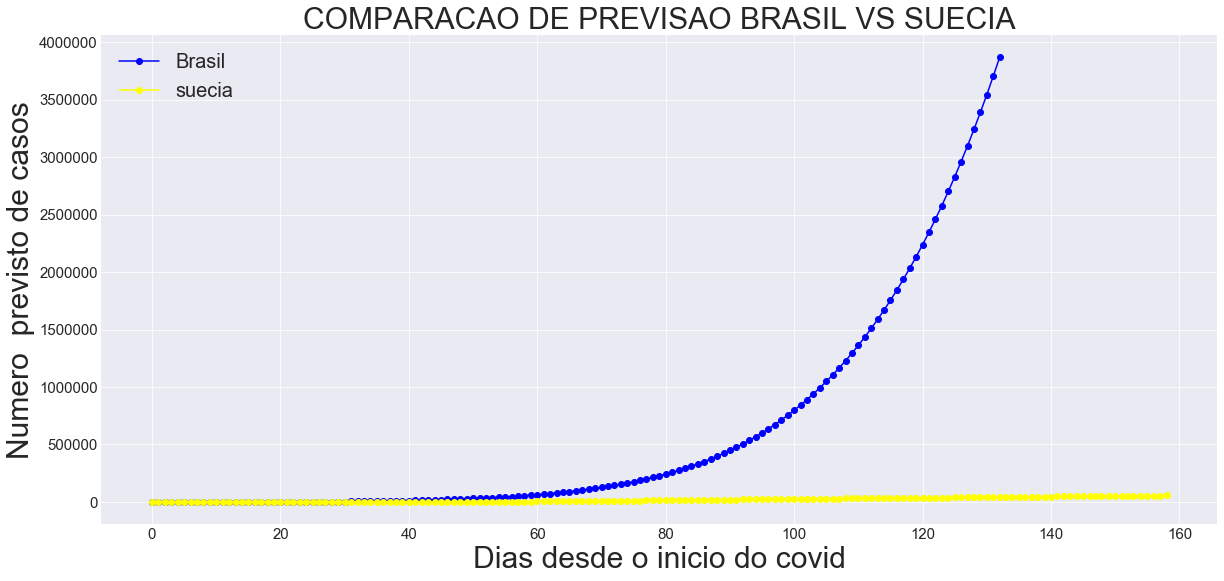

In [150]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_caso_br, marker='o', color='blue')
plt.plot(futuro_suecia, pred_caso_suecia, marker='o',  color='yellow')


plt.title('COMPARACAO DE PREVISAO BRASIL VS SUECIA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Numero  previsto de casos', size = 30)
plt.legend(['Brasil', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


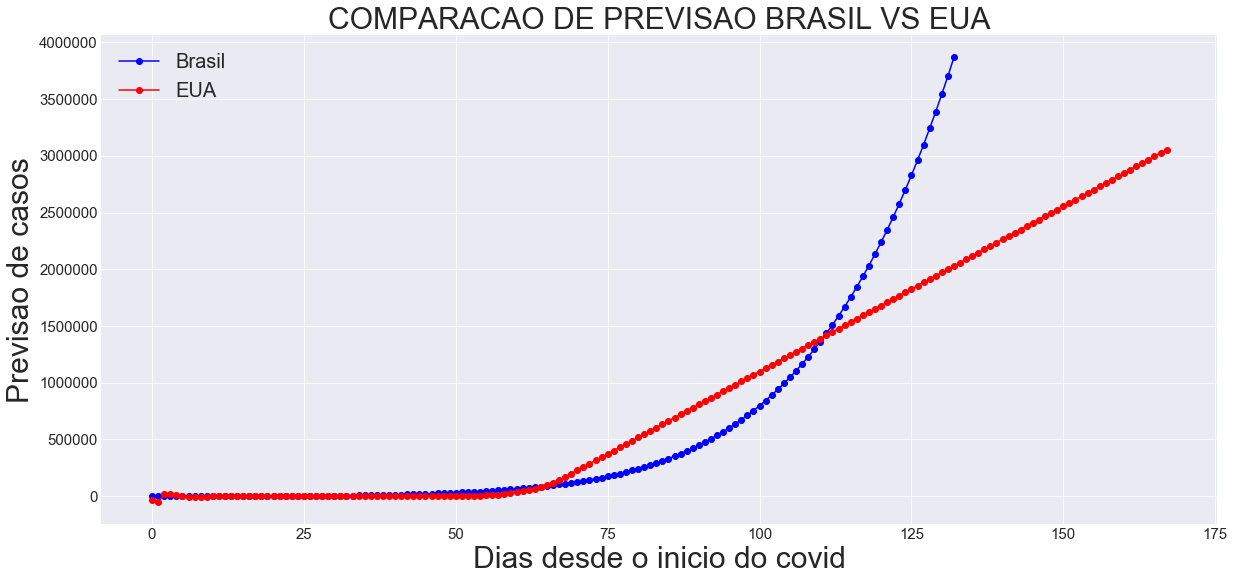

In [151]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_caso_br, marker='o',  color='blue')
plt.plot(futuro_eua, pred_caso_eua, marker='o',  color='red')

plt.title('COMPARACAO DE PREVISAO BRASIL VS EUA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Previsao de casos', size = 30)
plt.legend(['Brasil', 'EUA'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


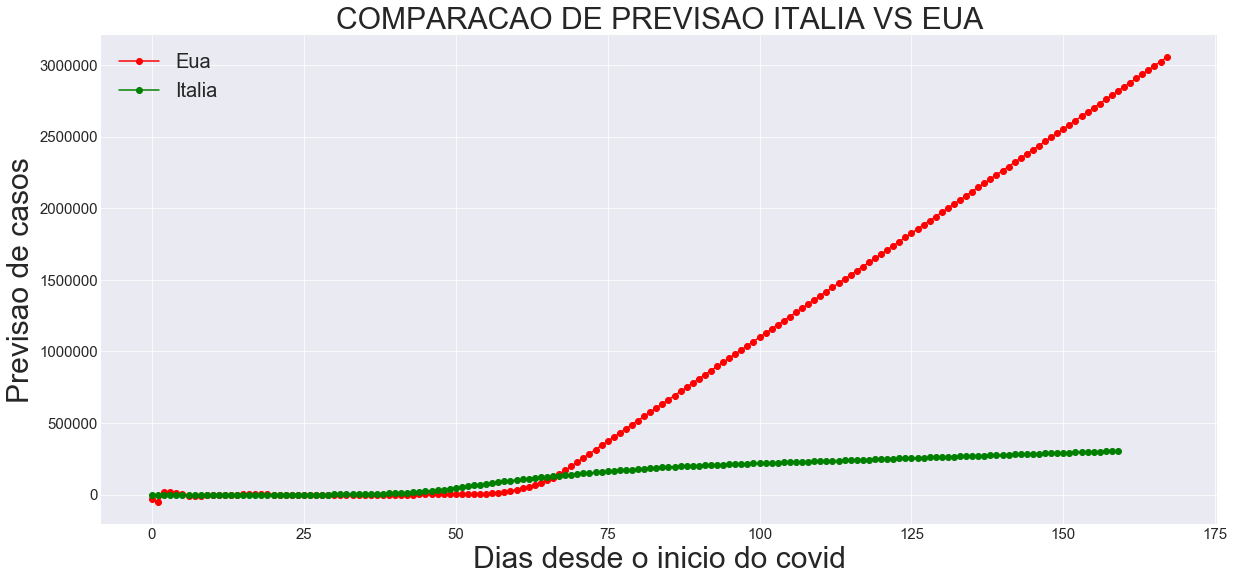

In [152]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_eua, pred_caso_eua, marker='o',  color='red')
plt.plot(futuro_italia, pred_caso_italia, marker='o',  color='green')


plt.title('COMPARACAO DE PREVISAO ITALIA VS EUA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Previsao de casos', size = 30)
plt.legend(['Eua', 'Italia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


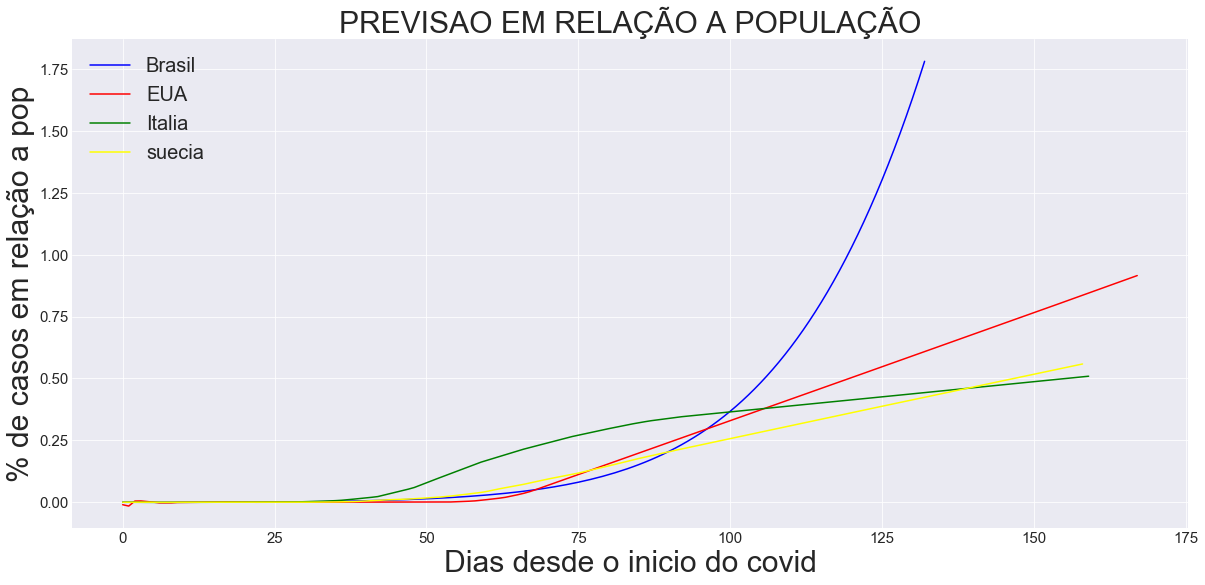

In [153]:
eua_porc = []
br_porc = []
it_porc = []
su_porc = []

for i in pred_caso_eua:
  porc = (i / 333545145)*100
  eua_porc.append(porc)
for i in pred_caso_br:
  porc = (i / 217089238)*100
  br_porc.append(porc)
for i in pred_caso_italia:
  porc = (i / 60017348)*100
  it_porc.append(porc)
for i in pred_caso_suecia:
  porc = (i / 10174790)*100
  su_porc.append(porc)

plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, br_porc, color='blue')
plt.plot(futuro_eua, eua_porc, color='red')
plt.plot(futuro_italia, it_porc, color='green')
plt.plot(futuro_suecia, su_porc, color='yellow')

plt.title('PREVISAO EM RELAÇÃO A POPULAÇÃO', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('% de casos em relação a pop', size = 30)
plt.legend(['Brasil', 'EUA','Italia', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


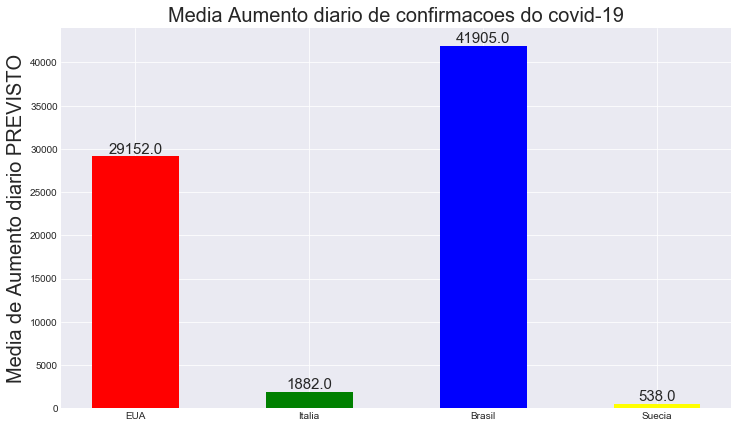

In [154]:
conf_eua1, conf_eua2 = itertools.tee(iter(list(pred_caso_eua[75:])))
next(conf_eua2)
conf_it1, conf_it2 = itertools.tee(iter(list(pred_caso_italia[67:])))
next(conf_it2)
conf_br1, conf_br2 = itertools.tee(iter(list(pred_caso_br[40:])))
next(conf_br2)
conf_su1, conf_su2 = itertools.tee(iter(list(pred_caso_suecia[66:])))
next(conf_su2)
diferenca_eua =[int(r) - int(p) for p,r in zip(conf_eua1, conf_eua2)]
diferenca_italia =[int(r) - int(p) for p,r in zip(conf_it1, conf_it2)]
diferenca_brasil =[int(r) - int(p) for p,r in zip(conf_br1, conf_br2)]
diferenca_suecia =[int(r) - int(p) for p,r in zip(conf_su1, conf_su2)]
diferenca_eua_media = np.array(diferenca_eua).mean()
diferenca_italia_media = np.array(diferenca_italia).mean()
diferenca_brasil_media = np.array(diferenca_brasil).mean()
diferenca_suecia_media = np.array(diferenca_suecia).mean()

paises = ['EUA', 'Italia', 'Brasil', 'Suecia']
numeros = [diferenca_eua_media, diferenca_italia_media, diferenca_brasil_media, diferenca_suecia_media]
numeros = [round(m, 0) for m in numeros]
fig = plt.figure(figsize=(12, 7))
rects = plt.bar(paises, numeros, align='center', color=['red', 'green', 'blue', 'yellow'], width=0.5)
ax = rects.patches

for rect, label in zip(ax, numeros):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom', fontsize=15)
    
plt.ylabel('Media de Aumento diario PREVISTO', size = 20)
plt.title('Media Aumento diario de confirmacoes do covid-19', size=20)
plt.show()

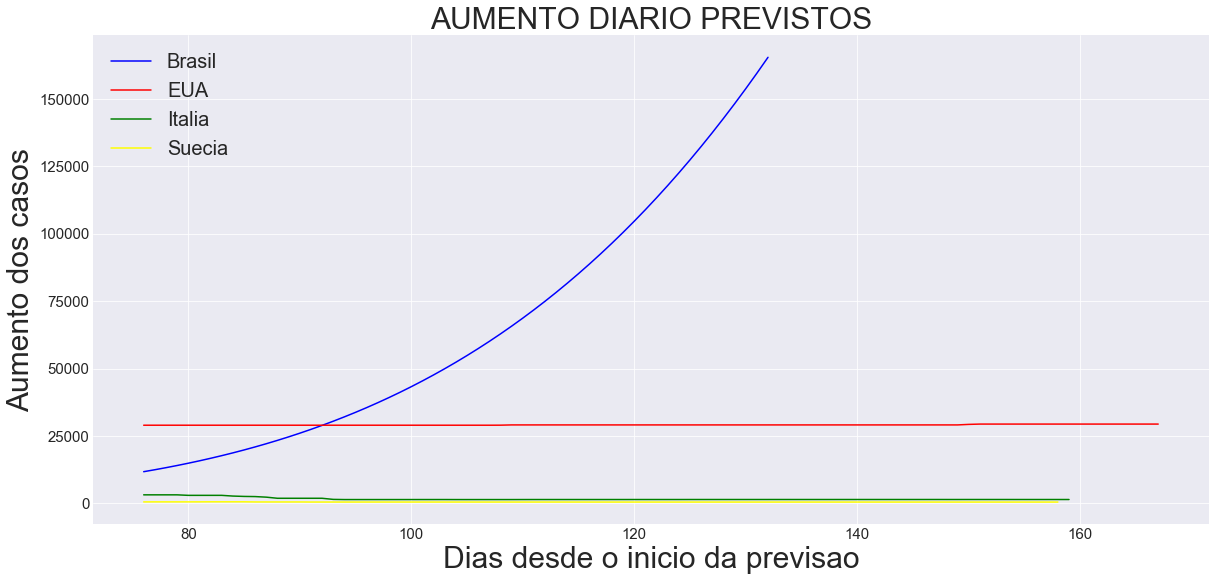

In [155]:
ax = plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil[76:], diferenca_brasil[35:], color='blue')
plt.plot(futuro_eua[76:], diferenca_eua, color='red')
plt.plot(futuro_italia[76:], diferenca_italia[8:], color='green')
plt.plot(futuro_suecia[76:], diferenca_suecia[9:], color='yellow')

plt.title('AUMENTO DIARIO PREVISTOS', size=30)
plt.xlabel('Dias desde o inicio da previsao', size = 30)
plt.ylabel('Aumento dos casos', size = 30)
plt.legend(['Brasil', 'EUA','Italia', 'Suecia'],  prop={'size': 20}, loc="upper left")
plt.xticks(size=15)

plt.yticks(size=15)
plt.show()

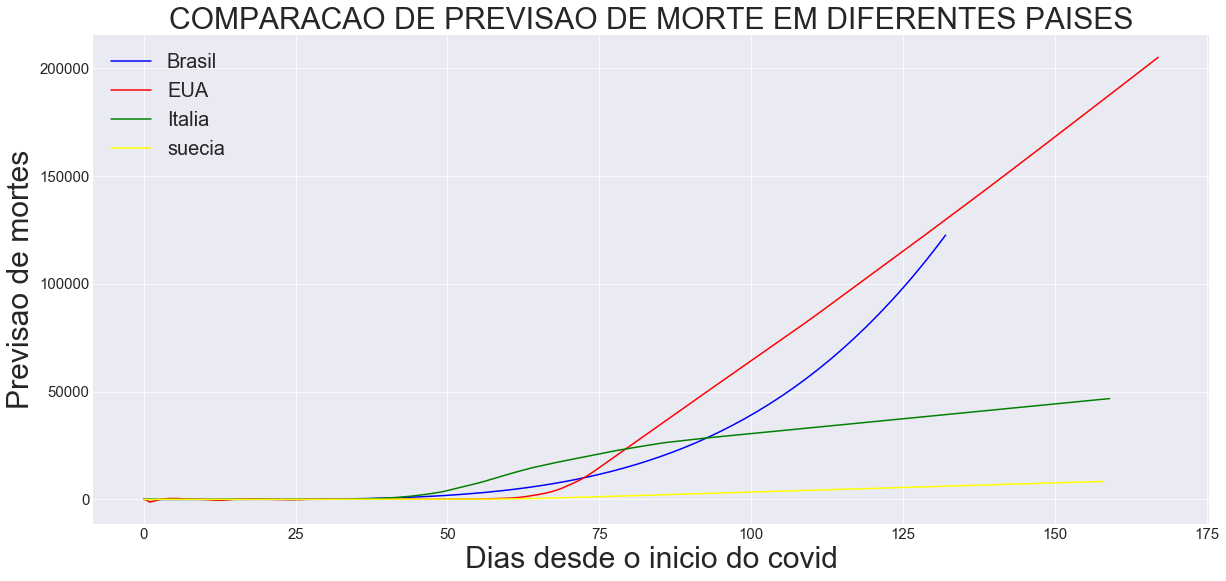

In [156]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_mortes_br, color='blue')
plt.plot(futuro_eua, pred_mortes_eua, color='red')
plt.plot(futuro_italia, pred_mortes_italia, color='green')
plt.plot(futuro_suecia, pred_mortes_suecia , color='yellow')

plt.title('COMPARACAO DE PREVISAO DE MORTE EM DIFERENTES PAISES', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Previsao de mortes', size = 30)
plt.legend(['Brasil', 'EUA','Italia', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


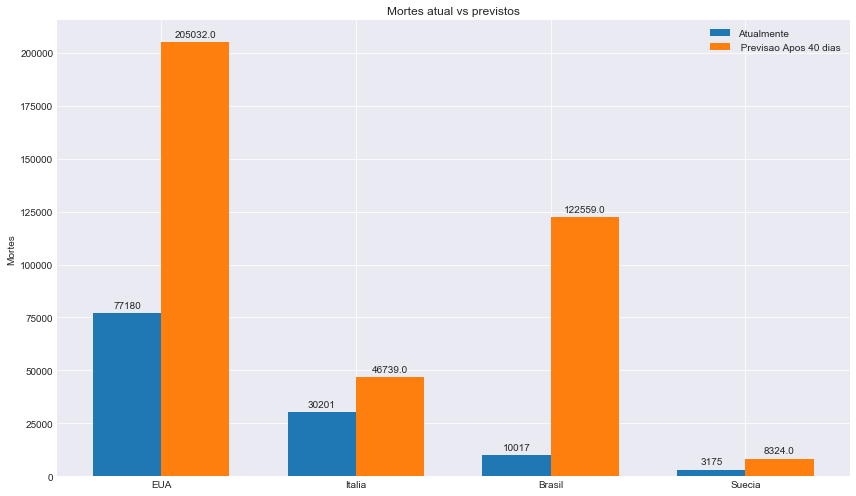

In [157]:
labels = ['EUA', 'Italia', 'Brasil', 'Suecia']
atualmente = [mortos_eua, mortos_italia, mortos_brasil, mortos_suecia]
apos_40 = [pred_mortes_eua[-1], pred_mortes_italia[-1], pred_mortes_br[-1],  pred_mortes_suecia[-1]]
apos_40 = [round(m, 0) for m in apos_40]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width/2, atualmente, width, label='Atualmente')
rects2 = ax.bar(x + width/2, apos_40, width, label=' Previsao Apos 40 dias')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Mortes')
ax.set_title('Mortes atual vs previstos')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

In [158]:
print('comparação previsao de Mortes nos 4 paises')
IPython.display.HTML('<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/2288388" data-url="https://flo.uri.sh/visualisation/2288388/embed"><script src="https://public.flourish.studio/resources/embed.js"></script></div>')

comparação previsao de Mortes nos 4 paises


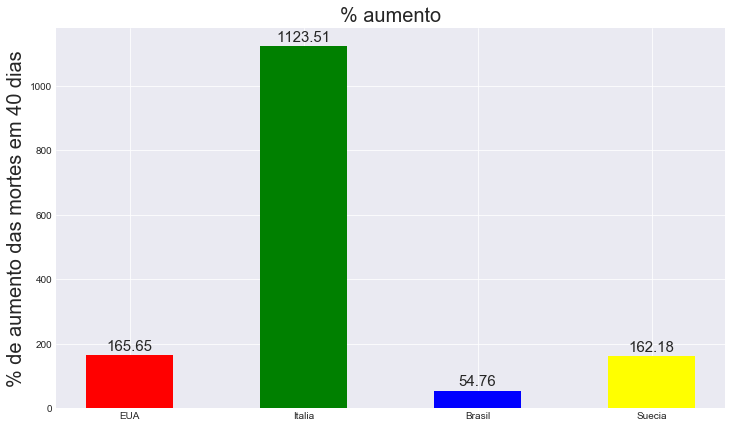

In [159]:
eua_porc = round(((pred_mortes_eua[-1] - mortos_eua)/ mortos_eua)*100 , 2)
br_porc =  round(((pred_mortes_br[-1] - mortos_brasil)/ mortos_brasil)*100, 2)
it_porc =  round(((pred_mortes_italia[-1] - mortos_italia)/ mortos_italia)*100, 2)
su_porc =  round(((pred_mortes_suecia[-1] - mortos_suecia)/ mortos_suecia)*100, 2)


fig = plt.figure(figsize=(12, 7))
paises = ['EUA', 'Italia', 'Brasil', 'Suecia']
numeros = [eua_porc,br_porc,it_porc,su_porc]
rects = plt.bar(paises,numeros, align='center', color=['red', 'green', 'blue', 'yellow'], width=0.5)

ax = rects.patches
for rect, label in zip(ax, numeros):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom', fontsize=15)
    
plt.ylabel('% de aumento das mortes em 40 dias', size = 20)
plt.title('% aumento', size=20)
plt.show()

In [160]:
p1 = figure(plot_width=800, plot_height=550, title="Tragetoria Prevista para mortes de  covid-19 logaritmica",
             y_axis_type="linear", x_range=(75,190))
p1.grid.grid_line_alpha=1
p1.ygrid.band_fill_color = "#4682B4"
p1.ygrid.band_fill_alpha = 0.1
p1.xaxis.axis_label = 'Dias Previstos'
p1.yaxis.axis_label = 'Progressao mortes(escala logaritmica)'
p1.xaxis.minor_tick_line_width = 0


p1.line(np.squeeze(futuro_brasil)[40:], pred_mortes_br[40:], color='#3E4CC3', 
        legend_label='Brasil', line_width=1)
p1.circle(futuro_brasil[-1], pred_mortes_br[-1], fill_color="white", size=5)

p1.line(np.squeeze(futuro_eua)[75:], pred_mortes_eua[75:], color='#F54138', 
        legend_label='Estados Unidos', line_width=1)
p1.circle(futuro_eua[-1], pred_mortes_eua[-1], fill_color="white", size=5)


p1.line(np.squeeze(futuro_suecia)[66:], pred_mortes_suecia[66:], color='#DBAE23', 
        legend_label='Suecia', line_width=1)
p1.circle(futuro_suecia[-1], pred_mortes_suecia[-1], fill_color="white", size=5)


p1.line(np.squeeze(futuro_italia)[67:], pred_mortes_italia[67:], color='#3EC358', 
        legend_label='Italia', line_width=1)
p1.circle(futuro_italia[-1], pred_mortes_italia[-1], fill_color="white", size=5)



p1.legend.location = "bottom_right"
output_notebook()
show(p1)



Loading BokehJS ...

<Figure size 864x504 with 0 Axes>

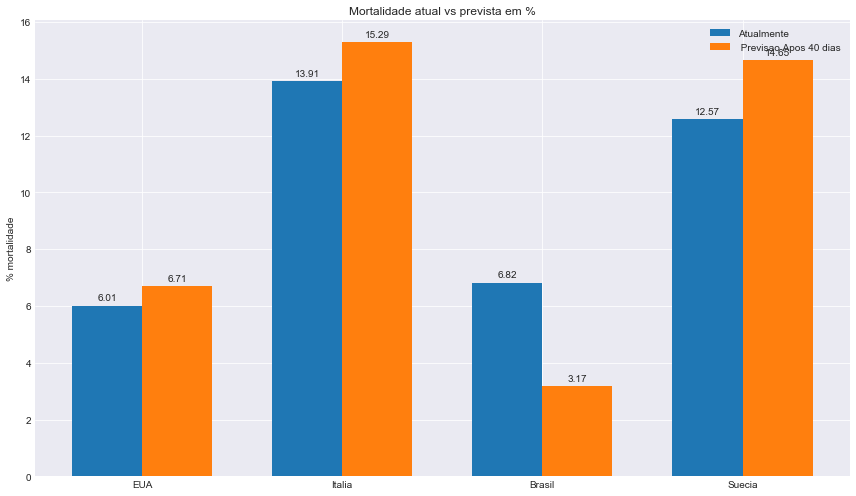

In [161]:
fig = plt.figure(figsize=(12, 7))
labels = ['EUA', 'Italia', 'Brasil', 'Suecia']
atualmente = [(mortos_eua/confirmados_eua)*100, (mortos_italia/confirmados_italia) *100, 
           (mortos_brasil/confirmados_brasil)*100, (mortos_suecia/confirmados_suecia)*100]
atualmente = [round(num, 2) for num in atualmente]
apos_40 = [(pred_mortes_eua[-1]/pred_caso_eua[-1])*100, (pred_mortes_italia[-1]/pred_caso_italia[-1])*100,
           (pred_mortes_br[-1]/ pred_caso_br[-1])*100, (pred_mortes_suecia[-1]/pred_caso_suecia[-1])*100]
apos_40 = [round(m, 2) for m in apos_40]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 7))
rects1 = ax.bar(x - width/2, atualmente, width, label='Atualmente')
rects2 = ax.bar(x + width/2, apos_40, width, label=' Previsao Apos 40 dias')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('% mortalidade')
ax.set_title('Mortalidade atual vs prevista em %')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

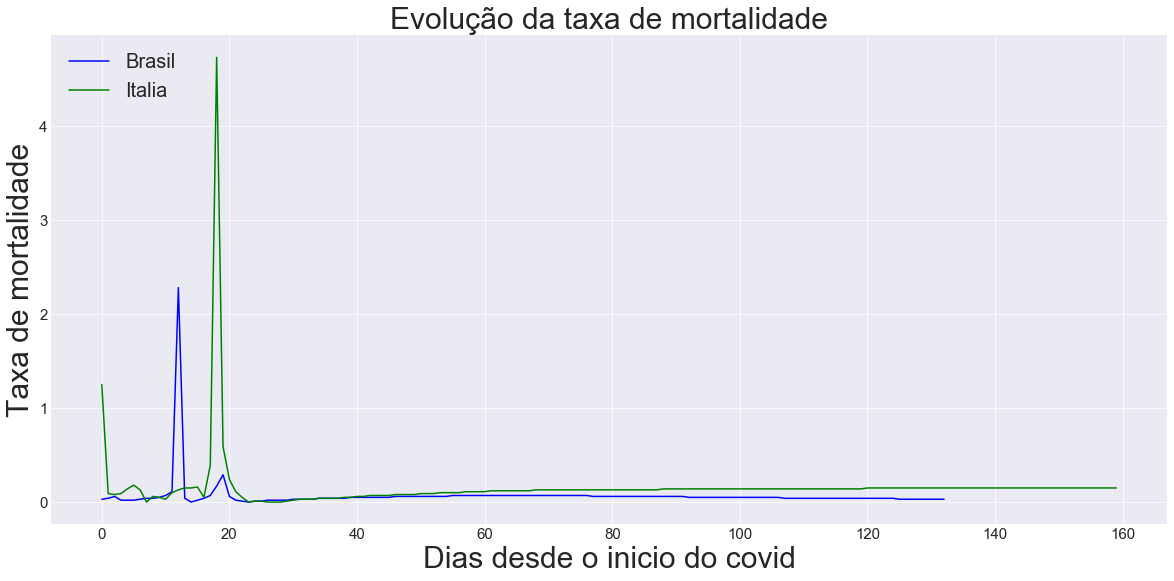

In [162]:
plt.figure(figsize=(20, 9))
mort_br = [round(abs((float(p) / float(r))), 2) if p != 0 and r != 0 else 0 for p,r in zip(pred_mortes_br, pred_caso_br)]
mort_eua = [round(abs((float(p) / float(r))), 2) if p != 0 and r != 0 else 0 for p,r in zip(pred_mortes_eua, pred_caso_eua)]
mort_it = [round(abs((float(p) / float(r))), 2) if p != 0 and r != 0 else 0 for p,r in zip(pred_mortes_italia, pred_caso_italia)]
mort_su = [round(abs((float(p) / float(r))), 2) if p != 0 and r != 0 else 0 for p,r in zip(pred_mortes_suecia, pred_caso_suecia)]


plt.plot(futuro_brasil, mort_br, color='blue')
#plt.plot(futuro_eua, mort_eua, color='red')
plt.plot(futuro_italia, mort_it, color='green')
#plt.plot(futuro_suecia, mort_su, color='yellow')


plt.title('Evolução da taxa de mortalidade', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Taxa de mortalidade', size = 30)
plt.legend(['Brasil','Italia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


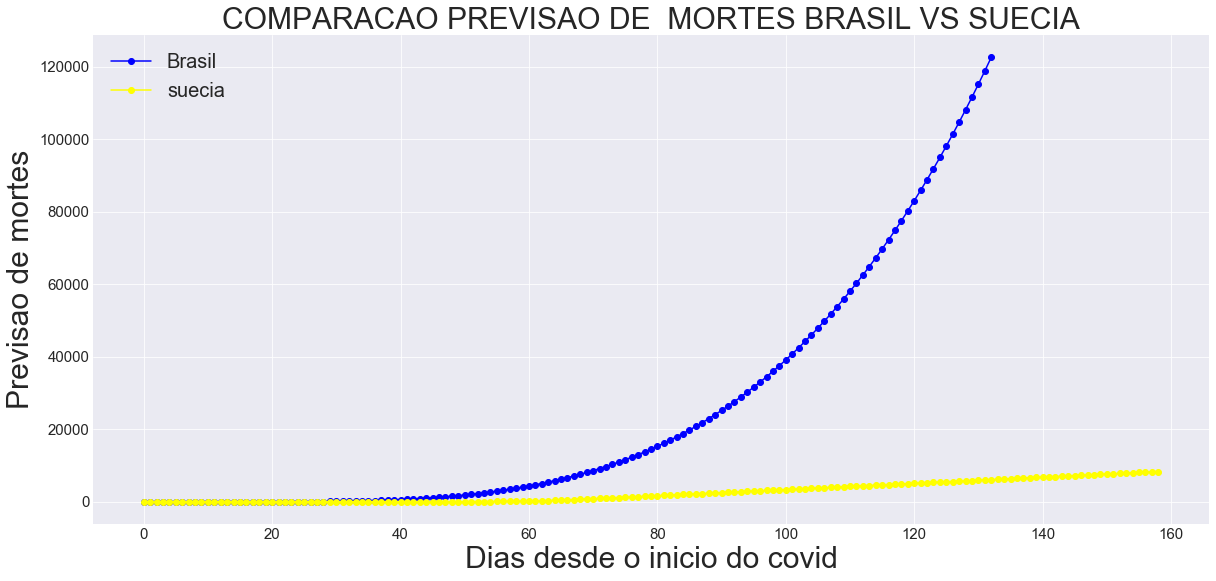

In [163]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_mortes_br, marker='o', color='blue')
plt.plot(futuro_suecia, pred_mortes_suecia, marker='o', color='yellow')

plt.title('COMPARACAO PREVISAO DE  MORTES BRASIL VS SUECIA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Previsao de mortes', size = 30)
plt.legend(['Brasil', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


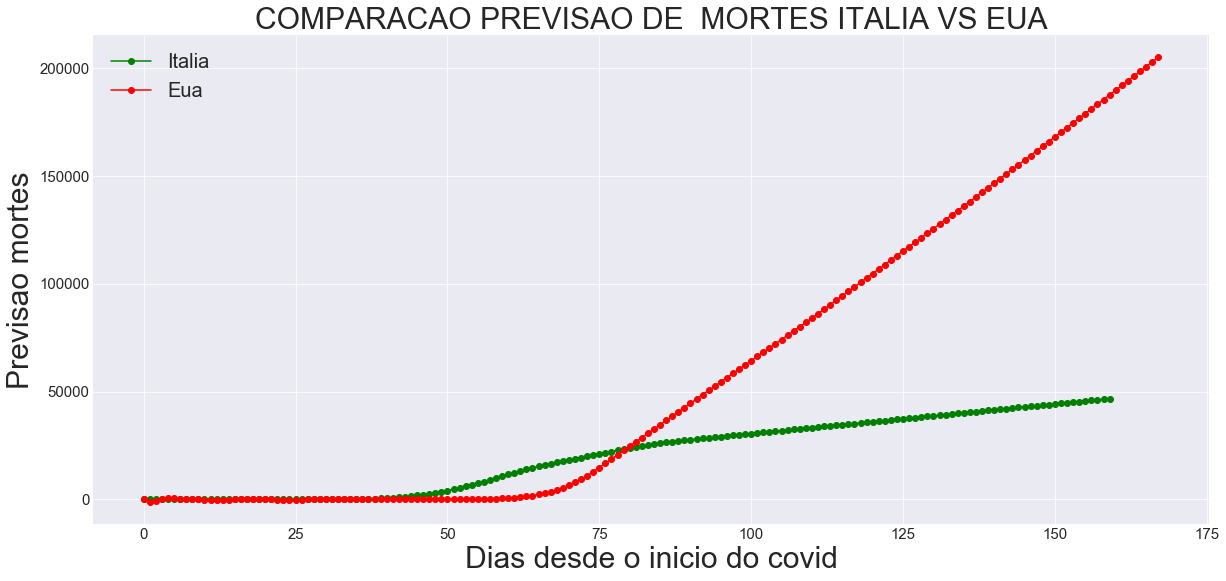

In [164]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_italia, pred_mortes_italia, marker='o',  color='green')
plt.plot(futuro_eua, pred_mortes_eua, marker='o',  color='red')

plt.title('COMPARACAO PREVISAO DE  MORTES ITALIA VS EUA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Previsao mortes', size = 30)
plt.legend(['Italia', 'Eua'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


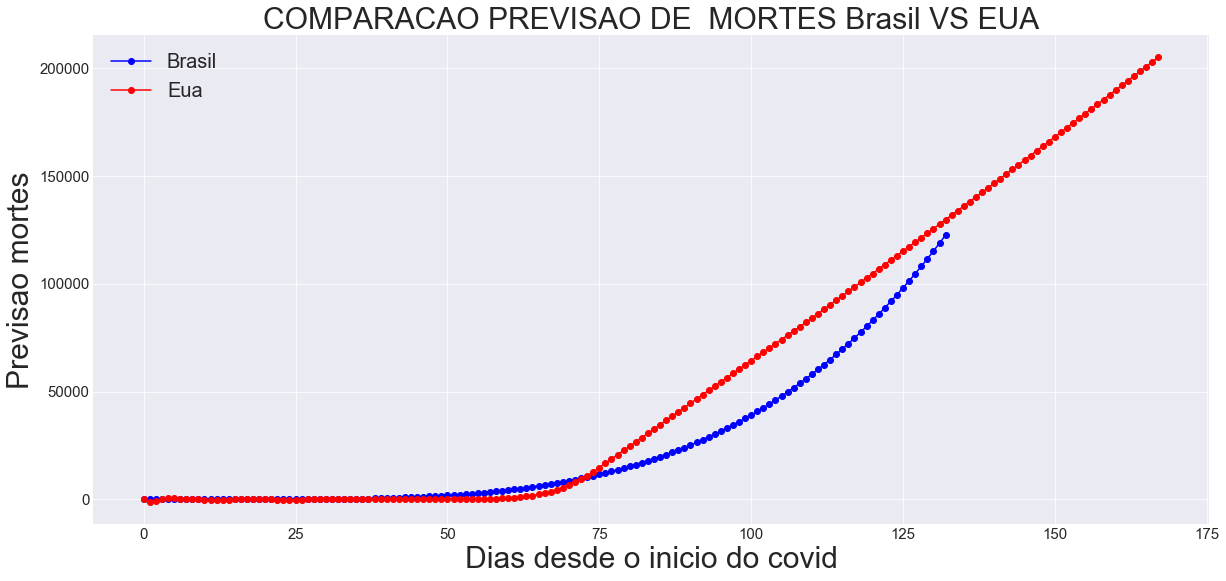

In [165]:
plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, pred_mortes_br, marker='o',  color='blue')
plt.plot(futuro_eua, pred_mortes_eua, marker='o',  color='red')

plt.title('COMPARACAO PREVISAO DE  MORTES Brasil VS EUA', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('Previsao mortes', size = 30)
plt.legend(['Brasil', 'Eua'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


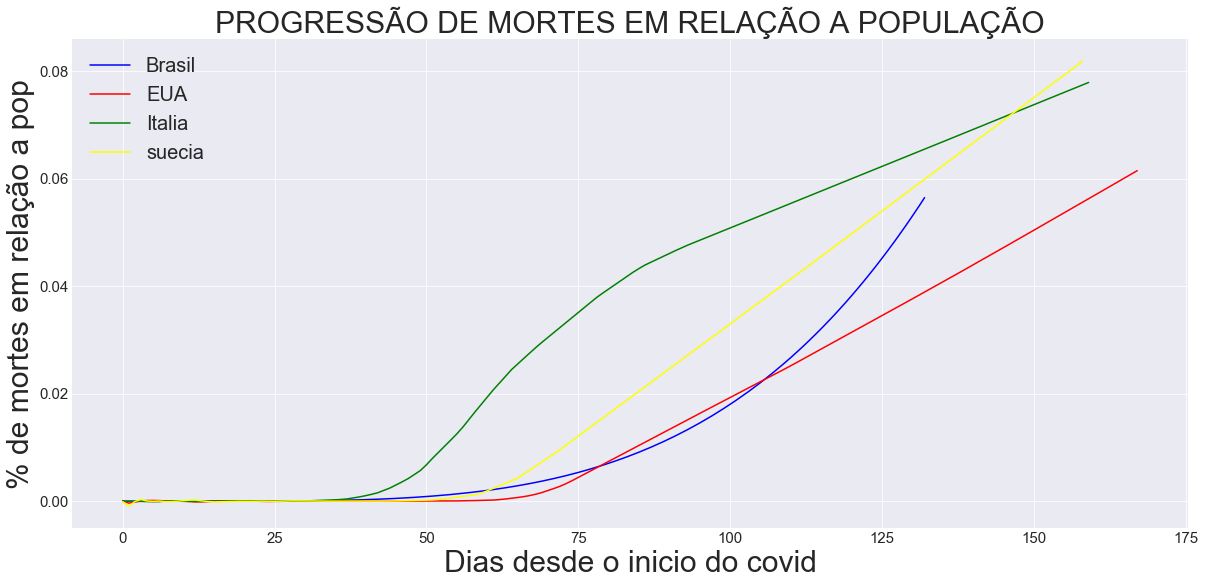

In [166]:
eua_porc = []
br_porc = []
it_porc = []
su_porc = []

for i in pred_mortes_eua:
  porc = (i / 333545145)*100
  eua_porc.append(porc)
for i in pred_mortes_br:
  porc = (i / 217089238)*100
  br_porc.append(porc)
for i in pred_mortes_italia:
  porc = (i / 60017348)*100
  it_porc.append(porc)
for i in pred_mortes_suecia:
  porc = (i / 10174790)*100
  su_porc.append(porc)

plt.figure(figsize=(20, 9))
plt.plot(futuro_brasil, br_porc, color='blue')
plt.plot(futuro_eua, eua_porc, color='red')
plt.plot(futuro_italia, it_porc, color='green')
plt.plot(futuro_suecia, su_porc, color='yellow')

plt.title('PROGRESSÃO DE MORTES EM RELAÇÃO A POPULAÇÃO', size=30)
plt.xlabel('Dias desde o inicio do covid', size = 30)
plt.ylabel('% de mortes em relação a pop', size = 30)
plt.legend(['Brasil', 'EUA','Italia', 'suecia'],  prop={'size': 20}, loc="upper left")


plt.xticks(size=15)
plt.yticks(size=15)
plt.show()


# Sobre Mim

Olá, sou Lucas Marchiori e atualmente(04/2020) estou cursando o 3º semestre de Engenharia de Computação na Universidade Federal de São Carlos (UFSCar), e me encontro no ramo da computação desde o ensino médio, onde fiz tecnico em informatica na Etec de Nova Odessa.

Apesar de estar na area de computação a um bom tempo ja, eu só fui me encontrar na area de ciencia de dados recentemente,tanto que esse é meu primeiro projeto nessa area, onde resolvi usar o tempo livre da quarentena para aprender um pouco dessa area tão vasta que vem me interessando cada vez mais.

Atualmente venho procurando estudar mais  sobre ciencia de dados, machine learning e suas "sub divisões"

Algus links:

Meu github: https://bit.ly/GitLucas    
Meu Linkedin: https://bit.ly/2XJR5Z0

email para duvidas ou sugestões: lucas@estudante.ufscar.br
